In [1]:
import xgboost as xgb
from xgboost import XGBRegressor
from vecstack import stacking
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.decomposition.pca import PCA
from sklearn.cross_validation import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
import pandas as pd
import numpy as np
import sklearn
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import chainer
import chainer.links as L
import chainer.functions as F
from chainer import optimizers
from chainer.datasets import split_dataset_random
from chainer import training
from chainer import report
from chainer import training
from chainer.training import extensions
from chainer import training
from chainer.datasets import split_dataset_random
from sklearn.model_selection import ShuffleSplit
from chainer.datasets import tuple_dataset, split_dataset_random
from chainer.training import extensions
from chainer import serializers
import csv
import mojimoji
import re
from copy import deepcopy
plt.style.use('ggplot')

/Users/hiruma/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/hiruma/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1034: UserWarning: Illegal line #3
	""""
"
	in file "/Users/hiruma/anaconda/lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/mystyle.mplstyle"
  warnings.warn('Illegal %s' % error_details)
/Users/hiruma/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:1034: UserWarning: Illegal line #7
	""""
"
	in file "/Users/hiruma/anaconda/lib/python3.5/site-packages/matplotlib/mpl-data/stylelib/mystyle.mplstyle"
  warnings.warn('Illegal %s' % error_details)

Bad key "Created 

In [2]:
data_all = pd.read_csv('/Users/hiruma/Jリーグ/data_all.csv', index_col=0)
test_data = pd.read_csv('/Users/hiruma/Jリーグ/test.csv')
test_data_add = pd.read_csv('/Users/hiruma/Jリーグ/2014_add.csv')
condition_data_all = pd.read_csv('/Users/hiruma/Jリーグ/condition_all.csv', index_col=0)
stadium_with_prefecture =  pd.read_csv('/Users/hiruma/Jリーグ/stadium_perfect.csv', index_col=0)
player_data = pd.read_csv('/Users/hiruma/Jリーグ/player.csv', index_col=0)

In [3]:
data_all

id      y  year stage    match   gameday   time         home  \
0     13994  18250  2012    Ｊ１   第１節第１日  03/10(土)  14:04       ベガルタ仙台   
1     13995  24316  2012    Ｊ１   第１節第１日  03/10(土)  14:04     名古屋グランパス   
2     13996  17066  2012    Ｊ１   第１節第１日  03/10(土)  14:04        ガンバ大阪   
3     13997  29603  2012    Ｊ１   第１節第１日  03/10(土)  14:06    サンフレッチェ広島   
4     13998  25353  2012    Ｊ１   第１節第１日  03/10(土)  14:04     コンサドーレ札幌   
5     13999  11283  2012    Ｊ１   第１節第１日  03/10(土)  14:05        サガン鳥栖   
6     14000  18920  2012    Ｊ１   第１節第１日  03/10(土)  17:05     川崎フロンターレ   
7     14001  11437  2012    Ｊ１   第１節第１日  03/10(土)  19:04    大宮アルディージャ   
8     14002  13082  2012    Ｊ１   第１節第２日  03/11(日)  14:04        柏レイソル   
9     14003  19010  2012    Ｊ１   第２節第１日  03/17(土)  14:04     鹿島アントラーズ   
10    14004  41069  2012    Ｊ１   第２節第１日  03/17(土)  14:04        浦和レッズ   
11    14005  19488  2012    Ｊ１   第２節第１日  03/17(土)  14:03     横浜Ｆ・マリノス   
12    14006  26294  2012    Ｊ１   第２節第１日  03/17(土)  14:03    アルビレックス新潟   
13    14007  30764  2012    Ｊ１   第２節第１日  03/17(土)  14:04       セレッソ大阪   
14    14008  13231  2012    Ｊ１   第２節第１日  03/17(土)  15:04      清水エスパルス   
15    14009  10653  2012    Ｊ１   第２節第１日  03/17(土)  17:04       ジュビロ磐田   
16    14010  14036  2012    Ｊ１   第２節第１日  03/17(土)  17:06      ヴィッセル神戸   
17    14011  21757  2012    Ｊ１   第２節第１日  03/17(土)  19:04         ＦＣ東京   
18    14012  11831  2012    Ｊ１   第３節第１日  03/24(土)  13:03       ベガルタ仙台   
19    14013  14349  2012    Ｊ１   第３節第１日  03/24(土)  13:04    サンフレッチェ広島   
20    14014  14777  2012    Ｊ１   第３節第１日  03/24(土)  14:04     川崎フロンターレ   
21    14015  11839  2012    Ｊ１   第３節第１日  03/24(土)  14:04      ヴィッセル神戸   
22    14016  10611  2012    Ｊ１   第３節第１日  03/24(土)  15:04        サガン鳥栖   
23    14017  20192  2012    Ｊ１   第３節第１日  03/24(土)  16:03     コンサドーレ札幌   
24    14018  12209  2012    Ｊ１   第３節第１日  03/24(土)  19:04        柏レイソル   
25    14019  10603  2012    Ｊ１   第３節第２日  03/25(日)  16:03     名古屋グランパス   
26    14020  15072  2012    Ｊ１   第３節第２日  03/25(日)  19:03        ガンバ大阪   
27    14021   7936  2012    Ｊ１   第４節第１日  03/31(土)  13:03    大宮アルディージャ   
28    14022  16229  2012    Ｊ１   第４節第１日  03/31(土)  14:04         ＦＣ東京   
29    14023  25743  2012    Ｊ１   第４節第１日  03/31(土)  15:03        浦和レッズ   
...     ...    ...   ...   ...      ...       ...    ...          ...   
1923  16209   6325  2014    Ｊ２  第２２節第１日  07/20(日)  18:03         栃木ＳＣ   
1924  16210   4602  2014    Ｊ２  第２２節第１日  07/20(日)  18:05       カターレ富山   
1925  16211  12465  2014    Ｊ２  第２２節第１日  07/20(日)  18:04         ＦＣ岐阜   
1926  16212   5482  2014    Ｊ２  第２２節第１日  07/20(日)  18:04       アビスパ福岡   
1927  16213   4801  2014    Ｊ２  第２２節第１日  07/20(日)  18:03    Ｖ・ファーレン長崎   
1928  16214   7519  2014    Ｊ２  第２２節第１日  07/20(日)  19:04      湘南ベルマーレ   
1929  16215   9601  2014    Ｊ２  第２２節第１日  07/20(日)  19:04       ジュビロ磐田   
1930  16216   3865  2014    Ｊ２  第２２節第１日  07/20(日)  19:04         愛媛ＦＣ   
1931  16217   5471  2014    Ｊ２  第２３節第１日  07/26(土)  18:04     モンテディオ山形   
1932  16218   6420  2014    Ｊ２  第２３節第１日  07/26(土)  18:03         横浜ＦＣ   
1933  16219  11600  2014    Ｊ２  第２３節第１日  07/26(土)  18:04       松本山雅ＦＣ   
1934  16220   3337  2014    Ｊ２  第２３節第１日  07/26(土)  18:03     カマタマーレ讃岐   
1935  16221   4630  2014    Ｊ２  第２３節第１日  07/26(土)  18:03    ギラヴァンツ北九州   
1936  16222  11458  2014    Ｊ２  第２３節第１日  07/26(土)  19:03  ジェフユナイテッド千葉   
1937  16223   7312  2014    Ｊ２  第２３節第１日  07/26(土)  19:04      湘南ベルマーレ   
1938  16224   5810  2014    Ｊ２  第２３節第１日  07/26(土)  19:05    京都サンガF.C.   
1939  16225   7528  2014    Ｊ２  第２３節第１日  07/26(土)  19:03     ファジアーノ岡山   
1940  16226   5017  2014    Ｊ２  第２３節第１日  07/26(土)  19:04         愛媛ＦＣ   
1941  16227  10232  2014    Ｊ２  第２３節第１日  07/26(土)  19:03       ロアッソ熊本   
1942  16228  13719  2014    Ｊ２  第２４節第１日  07/30(水)  19:03     コンサドーレ札幌   
1943  16229   3711  2014    Ｊ２  第２４節第１日  07/30(水)  19:03    水戸ホーリーホック   
1944  16230   8149  2014    Ｊ２  第２４節第１日  07/30(水)  19:03  ジェフユナイテッド千葉   
1945  16231   3333  2014    Ｊ２  第２４節第１日  07/30(水)  19:03      東京ヴェル

In [4]:
data_all = data_all.drop(labels=1567, axis=0)

In [5]:
player_data

ranking  player_name  player_age player_position  team_name  \
0          1        フォルラン          38              FW     セレッソ大阪   
1          2      マルキーニョス          41              FW    ヴィッセル神戸   
2          2        遠藤　保仁          37              MF      ガンバ大阪   
3          2   田中　マルクス闘莉王          36              DF   名古屋グランパス   
4          5        中村　俊輔          39              MF   横浜F・マリノス   
5          6        中澤　佑二          39              DF   横浜F・マリノス   
6          6   ペドロ　ジュニオール          30              FW    ヴィッセル神戸   
7          8        今野　泰幸          34              DF      ガンバ大阪   
8          9         ケネディ          35              FW   名古屋グランパス   
9          9  マルシオ　リシャルデス          35              MF      浦和レッズ   
10         9        阿部　勇樹          36              MF      浦和レッズ   
11         9        中村　憲剛          37              MF   川崎フロンターレ   
12         9       シンプリシオ          38              MF    ヴィッセル神戸   
13         9         ドゥトラ          44              DF   横浜F・マリノス   
14        15       大久保　嘉人          35              FW   川崎フロンターレ   
15        15        楢﨑　正剛          41              GK   名古屋グランパス   
16        17        西川　周作          31              GK      浦和レッズ   
17        17       小笠原　満男          38              MF   鹿島アントラーズ   
18        17        レアンドロ          32              FW      柏レイソル   
19        17  レアンドロ　ドミンゲス          34              MF      柏レイソル   
20        17      カルリーニョス          34              MF  大宮アルディージャ   
21        17        鈴木　啓太          36              MF      浦和レッズ   
22        17        稲本　潤一          38              DF   川崎フロンターレ   
23        24        栗原　勇蔵          34              DF   横浜F・マリノス   
24        24         エドゥー          35              FW       FC東京   
25        24        興梠　慎三          31              FW      浦和レッズ   
26        24        曽ヶ端　準          38              GK   鹿島アントラーズ   
27        24         ズラタン          33              FW  大宮アルディージャ   
28        24     ノヴァコヴィッチ          38              FW    清水エスパルス   
29        24        ウイルソン          32              FW     ベガルタ仙台   
..       ...          ...         ...             ...        ...   
473      473     キム　ミンヒョク          25              DF      サガン鳥栖   
474      473        小泉　勇人          22              GK   鹿島アントラーズ   
475      473        植田　直通          23              DF   鹿島アントラーズ   
476      473        川田　修平          23              GK  大宮アルディージャ   
477      473        橋爪　勇樹          27              DF  ヴァンフォーレ甲府   
478      473   シュミット　ダニエル          25              GK     ベガルタ仙台   
479      473        宮内　龍汰          23              MF   鹿島アントラーズ   
480      473          カイオ          23              MF   鹿島アントラーズ   
481      473        若杉　好輝          22              MF  ヴァンフォーレ甲府   
482      473         稲垣　祥          25              MF  ヴァンフォーレ甲府   
483      473         平　秀斗          23              FW      サガン鳥栖   
484      473        岡西　宏祐          27              GK  ヴァンフォーレ甲府   
485      473         岡　大生          29              GK  ヴァンフォーレ甲府   
486      473        山本　大貴          26              FW     ベガルタ仙台   
487      473        岡田　武瑠          23              MF     セレッソ大阪   
488      473        秋山　大地          23              MF     セレッソ大阪   
489      473       ク　ソンユン          23              GK     セレッソ大阪   
490      473        二見　宏志          25              DF     ベガルタ仙台   
491      473        加賀美　翔          23              FW    清水エスパルス   
492      473        前田　凌佑          23              MF    ヴィッセル神戸   
493      473        高木和　徹          22              GK    清水エスパルス   
494      473         柏瀬　暁          24              FW    清水エスパルス   
495      473         金　容輔          22              FW    ヴィッセル神戸   
496      473        吉丸　絢梓          21              GK    ヴィッセル神戸   
497      473        豊川　雄太          23              FW   鹿島アントラーズ   
498      473        杉本　太郎          21              MF   鹿島アントラーズ   
499      473        和田　倫季          23              MF    ヴィッセ

In [6]:
stadium_with_prefecture

stadium   capa prefecture  population      area  \
0                 名古屋市瑞穂陸上競技場  20000        愛知県     7444513   5172.40   
1                     豊田スタジアム  40000        愛知県     7444513   5172.40   
2                   フクダ電子アリーナ  18500        千葉県     6197784   5157.64   
3                    日立柏サッカー場  15349        千葉県     6197784   5157.64   
4                  ニンジニアスタジアム  15576        愛媛県     1395609   5676.10   
5                レベルファイブスタジアム  22563        福岡県     5092513   4986.40   
6                北九州市立本城陸上競技場  10202        福岡県     5092513   4986.40   
7           岐阜メモリアルセンター長良川競技場  20000        岐阜県     2041690  10621.29   
8                 正田醤油スタジアム群馬  15135        群馬県     1977013   6362.28   
9                エディオンスタジアム広島  50000        広島県     2833673   8479.38   
10                      札幌ドーム  39232        北海道     5400025  78421.17   
11                  札幌厚別公園競技場  19620        北海道     5400025  78421.17   
12                ノエビアスタジアム神戸  30132        兵庫県     5541205   8400.90   
13             県立カシマサッカースタジアム  40728        茨城県     2921184   6096.93   
14              ケーズデンキスタジアム水戸  12000        茨城県     2921184   6096.93   
15              鹿児島県立鴨池陸上競技場   19934       鹿児島県     1668273   9188.10   
16                   等々力陸上競技場  26530       神奈川県     9098984   2415.81   
17                    日産スタジアム  72327       神奈川県     9098984   2415.81   
18                 ニッパツ三ツ沢球技場  15454       神奈川県     9098984   2415.81   
19          Ｓｈｏｎａｎ　ＢＭＷスタジアム平塚  15100       神奈川県     9098984   2415.81   
20              うまかな・よかなスタジアム  32000        熊本県     1794623   7409.32   
21                  熊本市水前寺競技場  15000        熊本県     1794623   7409.32   
22      京都市西京極総合運動公園陸上競技場兼球技場  20588        京都府     2613594   4612.20   
23               ユアテックスタジアム仙台  19694        宮城県     2327993   7282.14   
24               松本平広域公園総合球技場  20396        長野県     2108441  13561.56   
25             デンカビッグスワンスタジアム  42300        新潟県     2313820  12584.10   
26                    大分銀行ドーム  40000        大分県     1171702   6340.61   
27                シティライトスタジアム  20000        岡山県     1924556   7114.62   
28                    万博記念競技場  21000        大阪府     8850607   1904.99   
29                 キンチョウスタジアム  19628        大阪府     8850607   1904.99   
30                ヤンマースタジアム長居  47816        大阪府     8850607   1904.99   
31              ベストアメニティスタジアム  24490        佐賀県      835016   2440.64   
32              佐賀県総合運動場陸上競技場  17000        佐賀県      835016   2440.64   
33                埼玉スタジアム２００２  63700        埼玉県     7237734   3797.75   
34               ＮＡＣＫ５スタジアム大宮  15600        埼玉県     7237734   3797.75   
35                ＩＡＩスタジアム日本平  20281        静岡県     3697651   7778.70   
36                   エコパスタジアム  50889        静岡県     3697651   7778.70   
37               ヤマハスタジアム（磐田）  15165        静岡県     3697651   7778.70   
38               栃木県グリーンスタジアム  15589        栃木県     1980960   6408.09   
39  鳴門・大塚スポーツパーク　ポカリスエットスタジアム  19637        徳島県      763873   4146.93   
40                   味の素スタジアム  49970        東京都    13378584   2190.90   
41                  町田市立陸上競技場  10328        東京都    13378584   2190.90   
42                      国立競技場  54224        東京都    13378584   2190.90   
43       駒沢オリンピック公園総合運動場陸上競技場  20010        東京都    13378584   2190.90   
44               とりぎんバードスタジアム  16033        鳥取県      574022   3507.05   
45             富山県総合運動公園陸上競技場  25250        富山県     1070070   4247.61   
46               ＮＤソフトスタジアム山形  21292        山形県     1130659   9323.15   
47                  山梨中銀スタジアム  17000        山梨県      840139   4464.99   
48            熊谷スポーツ文化公園陸上競技場  15400        埼玉県     7237734   3797.75   
49          神戸総合運動公園ユニバー記念競技場  45000        兵庫県     5541205   8400.90   
50                    宮城スタジアム  49133        宮城県     2327993   7282.14   
51        岐阜メモリアルセンター長良川球技メドウ   3560        岐阜県     2041690  10621.29   
52                味の素フィールド西が丘   7258        東京都    13378584   2190.90   
53               福島県営あづま陸上競技場  21000        福島県     1936630  13783.75   
54     

In [7]:
#提出用にデータを取り出すとき必要
test_id = test_data['id']

In [8]:
test_data_all = pd.concat([test_data, test_data_add]).sort_values('id')

In [9]:
class DataMaker:
    
    def __init__(self, df=None):
        self.df = deepcopy(df)
        self.df0 = deepcopy(df)
        self.tv_first = True
        
    def reset(self):
        try:
            self.df = deepcopy(self.df0)
        except:
            pass
        try:
            self.cond = deepcopy(self.cond0)
        except:
            pass
        try:
            self.st = deepcopy(self.st0)
        except:
            pass
        
    def data(self, df):
        self.df = deepcopy(df)
        self.df0 = deepcopy(df)
        
    def test_data(self, df):
        self.df = deepcopy(df)
        self.df_test = deepcopy(df)
        
    def switch2Test(self):
        self.df = deepcopy(self.df_test)
        
    def switch2Train(self):
        self.df = deepcopy(self.df0)
    
    def Cook(self):
        
        self.df['match_day'] = self.df['match'].map(self.match2day)
        self.df = self.df.drop('match', axis=1)
        
        self.df['stage'] = self.df['stage'].map(self.J2num)
        
        self.df['month'] = self.df['gameday'].map(self.gameday2data)
        self.df['holiday'] = self.df['gameday'].map(self.gameday2data2)
        self.df['vacation'] = self.df['gameday'].map(self.gameday2data3)
        self.df = self.df.drop('gameday', axis=1)
        
        self.df['night'] = self.df['time'].map(self.time2span)
        #self.df['start_time'] = self.df['time'].map(self.time2span2)
        self.df = self.df.drop('time', axis=1)
        
        self.df['tv_num'] = self.df['tv'].map(self.tv2num)
        
        
        self.df['home'] = self.df['home'].map(self.zen2han)
        self.df['away'] = self.df['away'].map(self.zen2han)
        
    
    def condition(self, cond):
        self.cond = deepcopy(cond)
        self.cond0 = deepcopy(cond)
        
    def stadium(self, st):
        self.st = deepcopy(st)
        self.st0 = deepcopy(st)
        
    def Cook2(self):
        self.cond['home_win'] = self.homewin(self.cond['home_score'], self.cond['away_score'])
        self.cond['weather'] = self.cond['weather'].map(self.weather2num)
        self.cond['humidity'] = self.cond['humidity'].map(self.persent2num)
        self.cond['discomfort_index'] = self.discomfort_index(self.cond['temperature'], self.cond['humidity'])
        self.cond = self.cond.drop(['home_01', 'home_02', 'home_03', 'home_04',
       'home_05', 'home_06', 'referee', 'home_07', 'home_08', 'home_09', 'home_10',
       'home_11', 'away_01', 'away_02', 'away_03', 'away_04',
       'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
       'away_11'], axis=1)
        self.cond['home_team'] = self.cond['home_team'].map(self.zen2han)
        self.cond['away_team'] = self.cond['away_team'].map(self.zen2han)
        self.cond = self.cond.rename(columns={'home_team':'home', 'away_team':'away'})
        self.cond['home_score_weight'] = self.homeScoreWeight(self.cond['home_score'], self.cond['away_score']).fillna(0.5)
        #self.cond = self.cond.drop(['home_score', 'away_score'], axis=1)
    
    def Cook3(self):
        pass
    
    def J2num(self, j):
        if j == 'Ｊ１':
            return 1
        else:
            return 0
    
    def gameday2data(self, d):
        month = 0
        s = re.match(r'[0-9]+/', d)

        if s:
            month = int(s.group()[:-1])
        return month
    
    def gameday2data2(self, d):
        holiday = 2
        s2 = re.search(u'[土日]', d)
        if s2:
            holiday = 1
        else:
            holiday = 0

        return holiday
    
    def gameday2data3(self, d):
        vacation = 2
        s = re.match(r'[0-9]+/', d)

        if s:
            month = int(s.group()[:-1])
        if (month >= 7 and month <= 9) or (month >= 1 and month <= 3):
            vacation = 1
        else:
            vacation = 0
            
        return vacation
    
    def tv2num(self, tv):
        return len(tv.split('／'))
    
    def time2span(self, t):
        T = int(t.split(':')[0])
        if T <= 16:
            return 0
        else:
            return 1
        
    def time2span2(self, t):
        T = t.split(':')
        h = int(T[0])
        m = int(T[1])     
        return h+m/60
        
    def zen2han(self, name):
        pattern = u'[ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ．]+'
        s = re.search(pattern, name)
        if s:
            s.group()
            s2 = re.sub(pattern, mojimoji.zen_to_han(s.group()), name)
            s3 = re.sub(u'．', '.', s2)
            return s3
        else:
            return name

   
    
    def weather2num(self, w):
        pattern = u'雨'
        S = re.search(pattern, w)
        if S == None:
            return 0
        else:
            return 1

    def persent2num(self, h):
        return int(h[:-1])
    
    def discomfort_index(self, T, H):
        return 0.81*T+0.01*H*(0.99*T - 14.3) + 46.3

    def homewin(self, H, A):
        return (H >= A).map(int)
    
    def homeScoreWeight(self, H, A):
        all_score = H + A
        return H/all_score
    
    def match2day(self, m):
        m = mojimoji.zen_to_han(m)
        pattern = u'第[0-9]+節'
        s = re.match(pattern, m)
        if s:
            return int(s.group()[1:-1])
        return None
 

In [10]:
dataMaker = DataMaker()
dataMaker.data(data_all)
dataMaker.condition(condition_data_all)
dataMaker.stadium(stadium_with_prefecture)

In [11]:
dataMaker.Cook()
dataMaker.Cook2()
dataMaker.Cook3()

In [12]:
df = dataMaker.df
cond = dataMaker.cond
st = dataMaker.st

In [13]:
data2 = pd.merge(df, cond, how='left', on=['id', 'home', 'away'])
data3 = pd.merge(data2, st, how='left', on=['stadium'])

In [14]:
dataMaker.test_data(test_data_all)

In [15]:
dataMaker.Cook()

In [16]:
test_df = dataMaker.df
test_data2 = pd.merge(test_df, cond, how='left', on=['id', 'home', 'away'])
test_data3 = pd.merge(test_data2, st, how='left', on=['stadium'])
test_data3 = pd.merge(test_data3, pd.DataFrame(test_id), how='right', on='id')

In [17]:
data3.drop(['id'], axis=1, inplace=True)

In [18]:
test_data3.drop(['id'], axis=1, inplace=True)

In [19]:
def str2num(df, df2):
    columns = df.columns
    for col in columns:
        if df[col].dtypes == 'O' and df2[col].dtypes == 'O' or col == 'month' or col == 'year':
            dum = pd.get_dummies(df[col])
            dum = dum.rename(columns={c:col+'_'+str(c) for c in dum.columns})
            dum2 = pd.get_dummies(df2[col])
            dum2 = dum2.rename(columns={c:col+'_'+str(c) for c in dum2.columns})
            col_all = np.unique(list(dum.columns) + list(dum2.columns))
            dum_all = pd.DataFrame(np.zeros([len(dum), len(col_all)]), columns=col_all) 
            dum_all2 = pd.DataFrame(np.zeros([len(dum2), len(col_all)]), columns=col_all)
            Dum = (dum_all + dum).fillna(0)
            Dum2 = (dum_all2 + dum2).fillna(0)
            #dum = pd.merge(dum_all, dum, how='left')
            #dum2 = pd.merge(dum_all2, dum2, how='left')
            df = pd.concat([df, Dum], axis=1)
            df = df.drop(col, axis=1)
            df2 = pd.concat([df2, Dum2], axis=1)
            df2 = df2.drop(col, axis=1)
    return df, df2
 

In [20]:
def resub(tv):
    tv = re.sub(u'（.+）', '', tv)
    tv = re.sub(u'※１', '', tv)
    tv = re.sub(u'　', '', tv)
    return tv

In [21]:
def tvCoop(df, df2):
    allTV = []
    TV_list = []
    for tv in df['tv'].values:
        tv = resub(tv)
        allTV += tv.split('／')
        TV_list.append(tv.split('／'))
        
    TV_list2 = []
    for tv in df2['tv'].values:
        tv = resub(tv)
        allTV += tv.split('／')
        TV_list2.append(tv.split('／'))
        
    lis = np.unique(allTV)
    lis = np.array(['tv'+'_'+str(c) for c in lis])
    TV_df = pd.DataFrame(np.zeros([len(df), len(lis)]), columns=lis)
    TV_df2 = pd.DataFrame(np.zeros([len(df2), len(lis)]), columns=lis)
    
    for i, l in enumerate(TV_list):
        for tv in l:
            TV_df.ix[i] += TV_df.columns == tv
            
    for i, l in enumerate(TV_list2):
        for tv in l:
            TV_df2.ix[i] += TV_df2.columns == tv

    
    
    df = pd.concat([df, TV_df], axis=1)
    df2 = pd.concat([df2, TV_df2], axis=1)
    
    df = df.drop('tv', axis=1)
    df2 = df2.drop('tv', axis=1)

    return df, df2


In [22]:
data3, test_data3 = tvCoop(data3, test_data3)
data3, test_data3 = str2num(data3, test_data3)

In [23]:

print(len(data3.columns))
for c in data3.columns:
    print(c)

298
y
stage
match_day
holiday
vacation
night
tv_num
home_score
away_score
weather
temperature
humidity
home_all
away_all
home_win
discomfort_index
home_score_weight
capa
population
area
population density
income
outcome
latitude
longitude
tv_あいテレビ
tv_とちぎテレビ
tv_スカパー
tv_スカパー光
tv_スカパー！
tv_スカパー！プレミアムサービス
tv_テレビせとうち
tv_テレビ信州
tv_テレビ大分
tv_テレビ大阪
tv_テレビ山梨
tv_テレビ愛媛
tv_テレビ新潟
tv_テレビ神奈川
tv_テレビ西日本
tv_テレビ静岡
tv_テレ玉
tv_ミヤギテレビ
tv_中京テレビ
tv_中国放送
tv_仙台放送
tv_信越放送
tv_北海道テレビ
tv_名古屋テレビ
tv_富山テレビ
tv_山形テレビ
tv_山梨放送
tv_山陽放送
tv_岐阜放送
tv_岡山放送
tv_新潟テレビ２１
tv_新潟放送
tv_新潟総合テレビ
tv_日本海テレビ
tv_札幌テレビ
tv_東北放送
tv_東日本放送
tv_東海テレビ
tv_毎日放送
tv_熊本放送
tv_熊本県民テレビ
tv_福岡放送
tv_群馬テレビ
tv_西日本放送
tv_長崎国際テレビ
tv_長野放送
tv_長野朝日放送
tv_静岡放送
tv_ＢＳ－ＴＢＳ
tv_ＫＢＳ京都
tv_ＮＨＫ京都
tv_ＮＨＫ仙台
tv_ＮＨＫ佐賀
tv_ＮＨＫ前橋
tv_ＮＨＫ北九州
tv_ＮＨＫ名古屋
tv_ＮＨＫ大分
tv_ＮＨＫ大阪
tv_ＮＨＫ宇都宮
tv_ＮＨＫ富山
tv_ＮＨＫ山形
tv_ＮＨＫ岐阜
tv_ＮＨＫ岡山
tv_ＮＨＫ広島
tv_ＮＨＫ徳島
tv_ＮＨＫ新潟
tv_ＮＨＫ札幌
tv_ＮＨＫ松山
tv_ＮＨＫ水戸
tv_ＮＨＫ熊本
tv_ＮＨＫ甲府
tv_ＮＨＫ神戸
tv_ＮＨＫ福岡
tv_ＮＨＫ総合
tv_ＮＨＫ長崎
tv_ＮＨＫ長野
tv_ＮＨＫ静岡
tv_ＮＨＫ高松
tv_ＮＨＫ鳥取
tv_ＮＨＫＢＳ１
tv_ＴＯＫＹＯＭＸ
tv_ｅ２
year_2012

In [24]:
def deleteSame(df, str1, str2):
    df[str1] = df[str1] + df[str2]
    return df
    

In [25]:
data3 = deleteSame(data3, 'stadium_長崎市総合運動公園かきどまり陸上競技場', 'stadium_長崎県立総合運動公園陸上競技場')
data3 = deleteSame(data3, 'stadium_岐阜メモリアルセンター長良川球技メドウ', 'stadium_岐阜メモリアルセンター長良川競技場')
test_data3 = deleteSame(test_data3, 'stadium_長崎市総合運動公園かきどまり陸上競技場', 'stadium_長崎県立総合運動公園陸上競技場')
test_data3 = deleteSame(test_data3, 'stadium_岐阜メモリアルセンター長良川球技メドウ', 'stadium_岐阜メモリアルセンター長良川競技場')
data3 = deleteSame(data3, 'home_ザスパクサツ群馬', 'home_ザスパ草津')
test_data3 = deleteSame(test_data3, 'home_ザスパクサツ群馬', 'home_ザスパ草津')
data3 = deleteSame(data3, 'away_ザスパクサツ群馬', 'away_ザスパ草津')
test_data3 = deleteSame(test_data3, 'away_ザスパクサツ群馬', 'away_ザスパ草津')

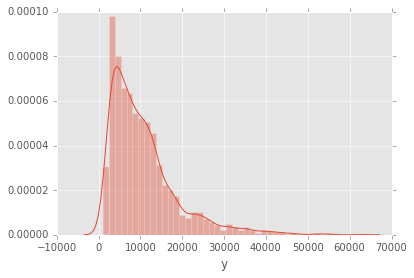

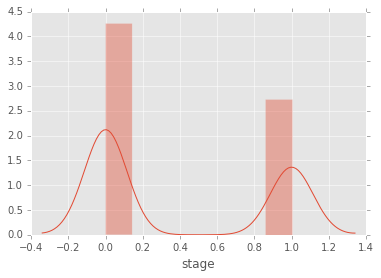

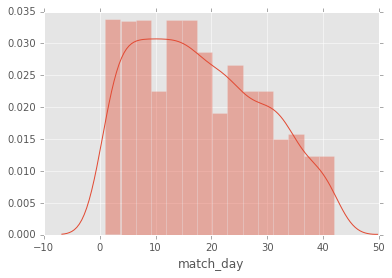

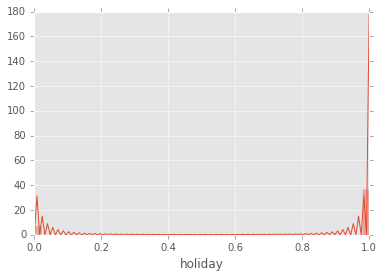

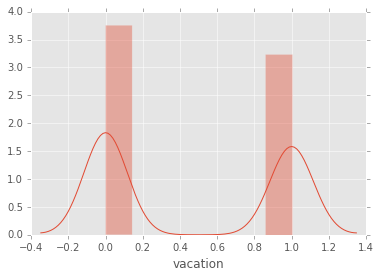

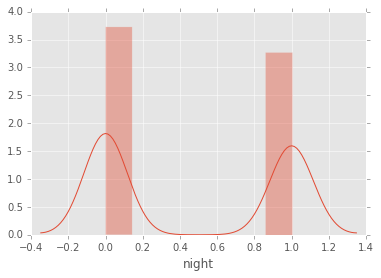

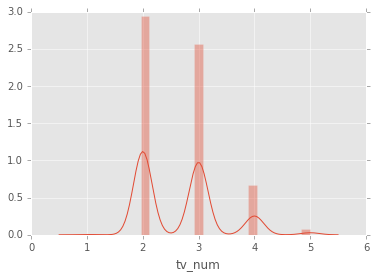

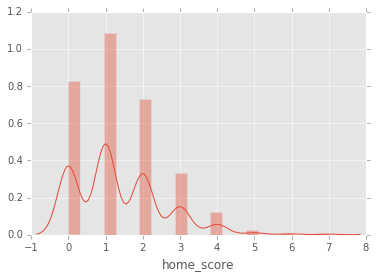

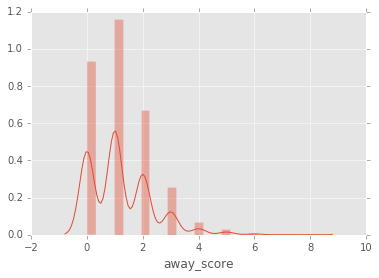

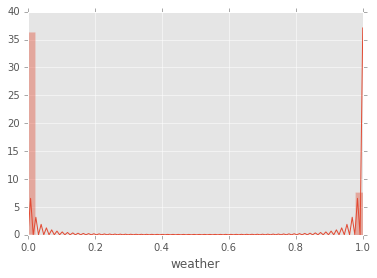

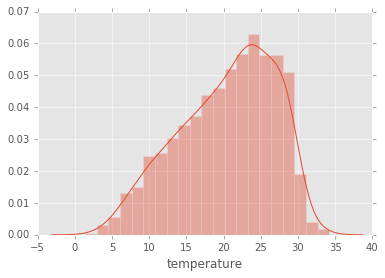

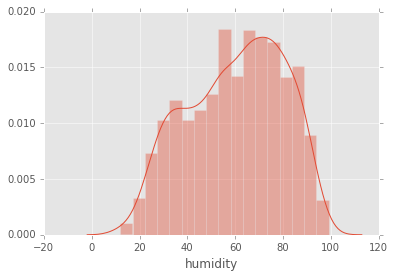

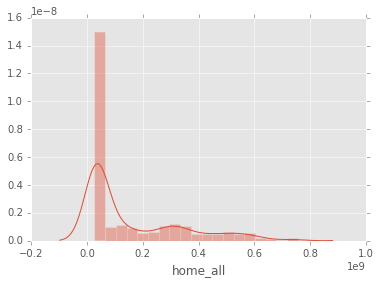

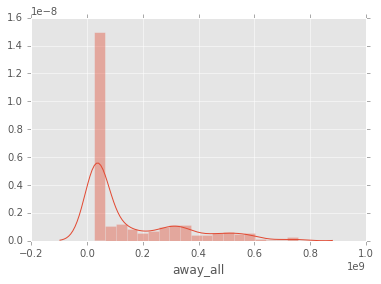

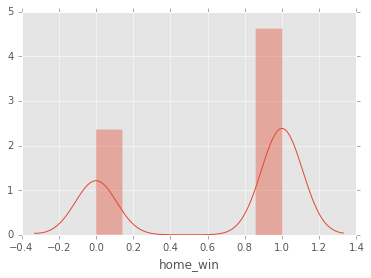

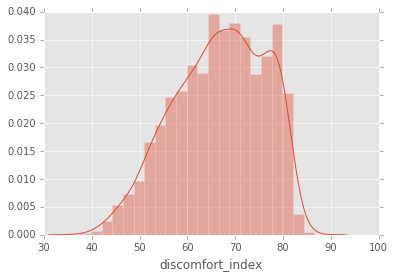

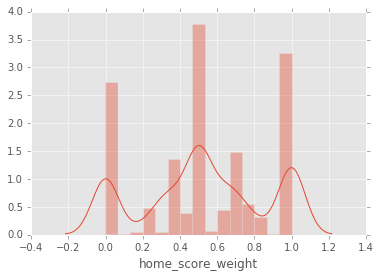

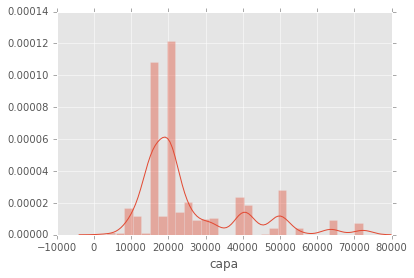

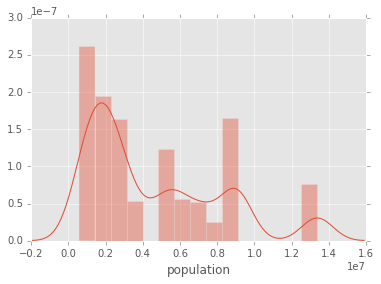

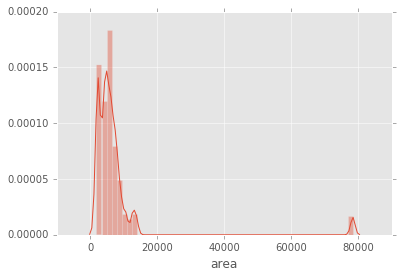

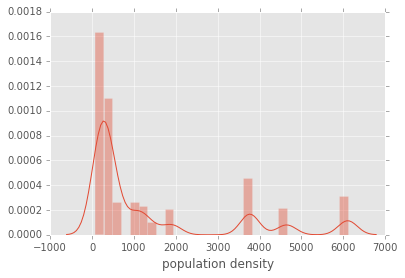

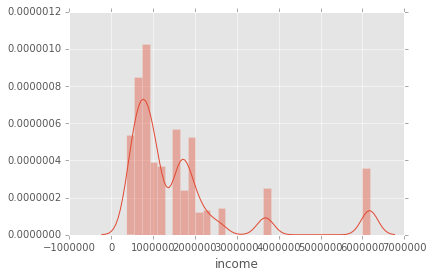

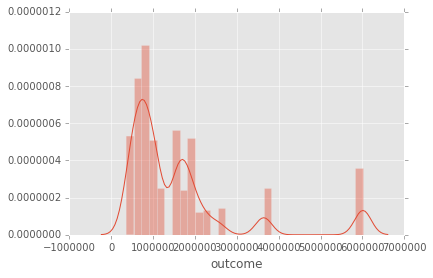

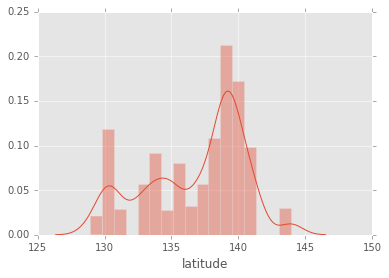

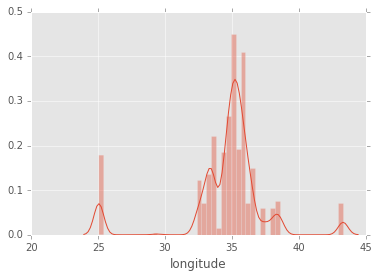

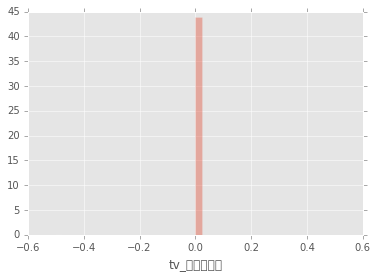

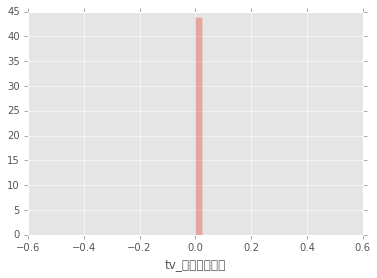

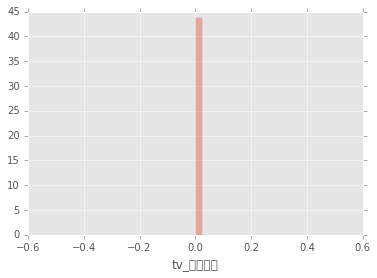

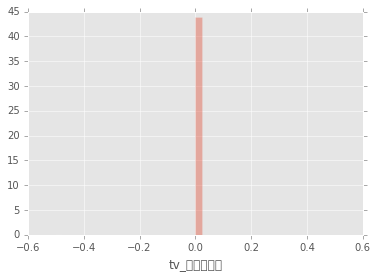

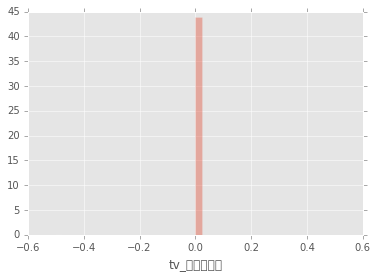

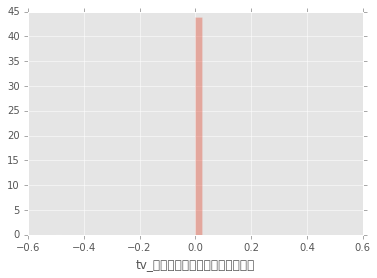

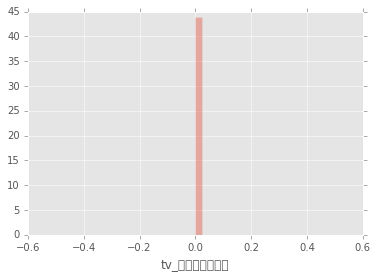

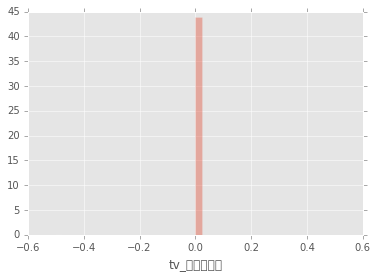

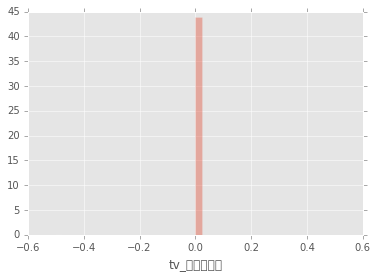

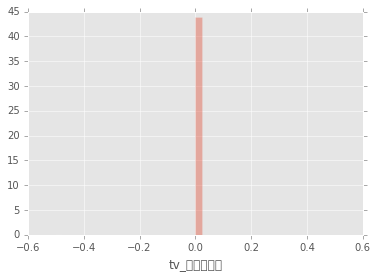

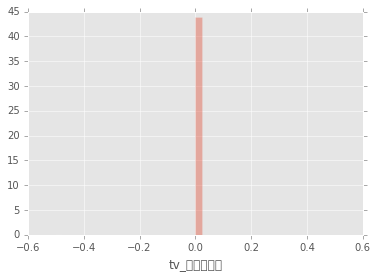

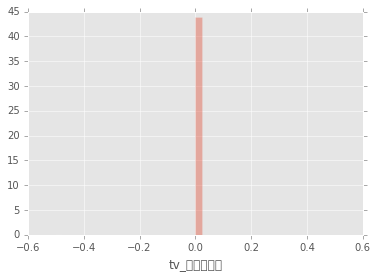

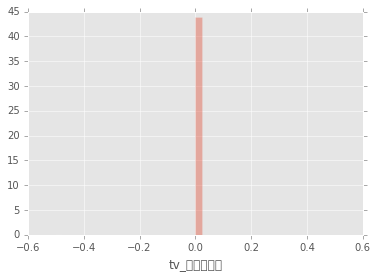

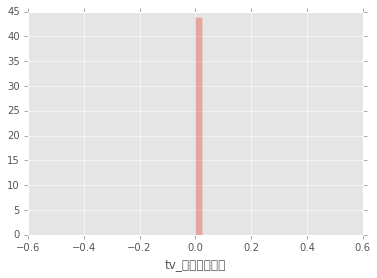

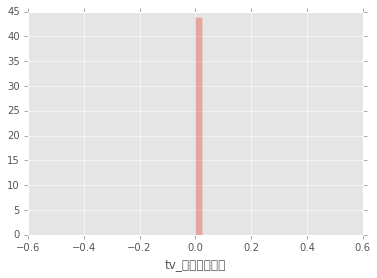

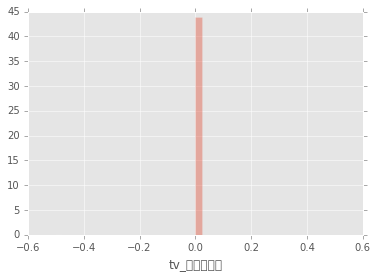

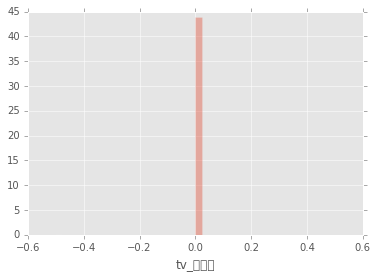

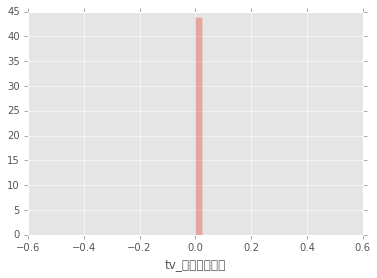

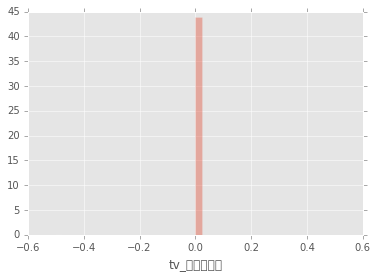

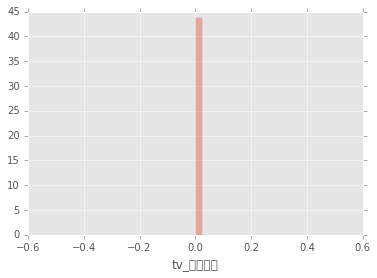

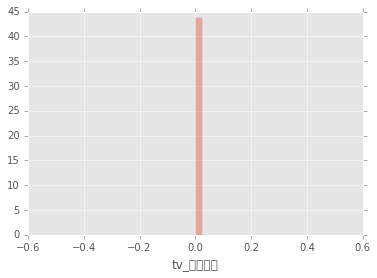

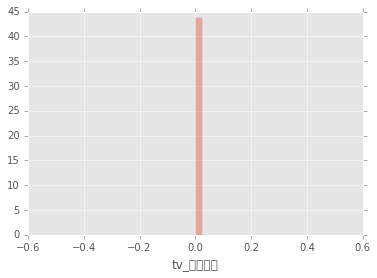

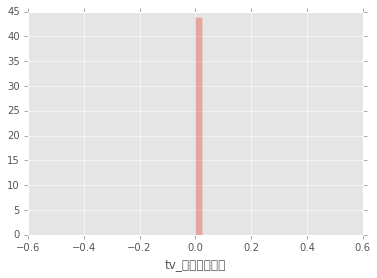

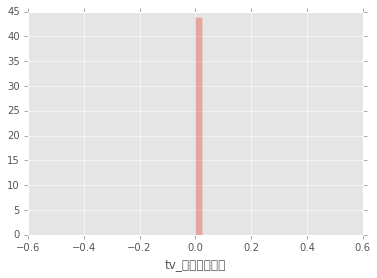

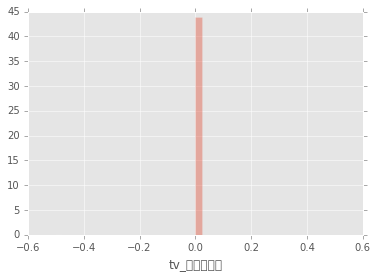

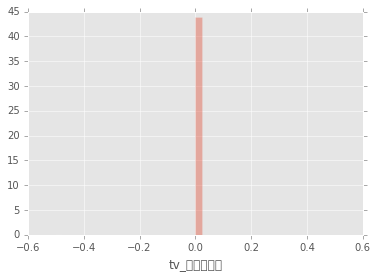

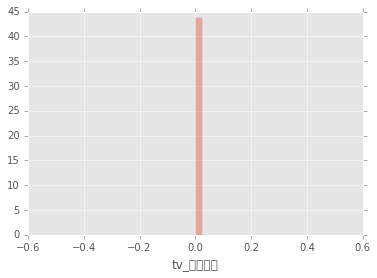

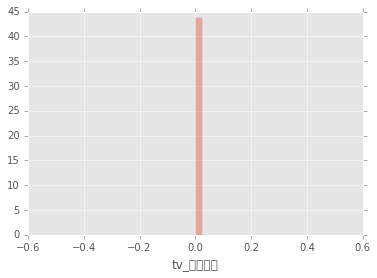

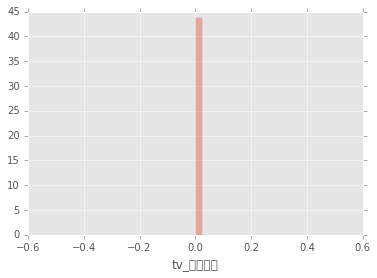

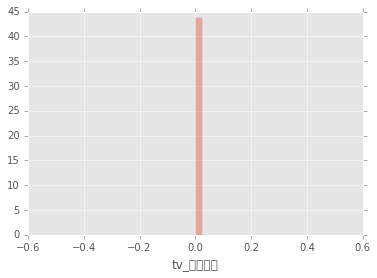

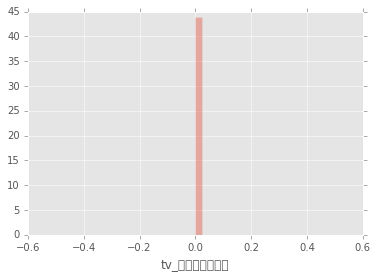

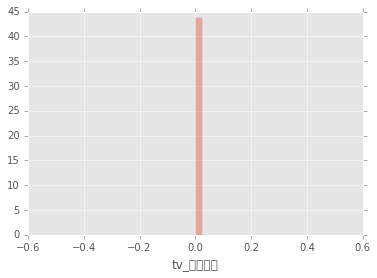

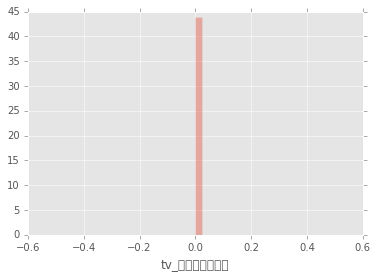

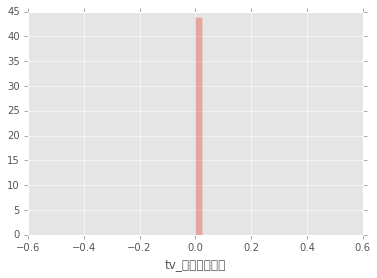

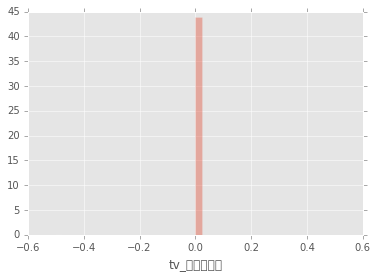

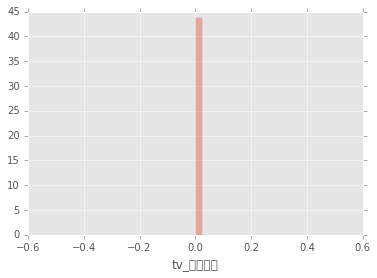

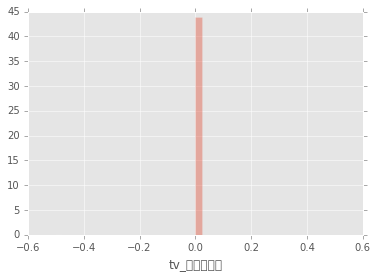

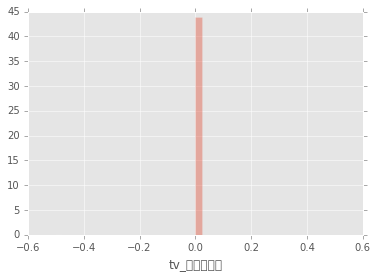

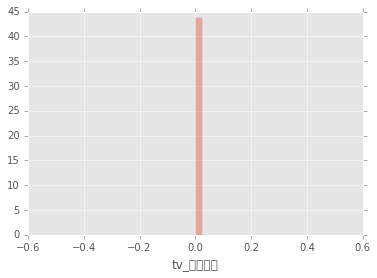

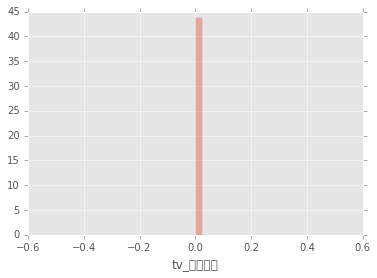

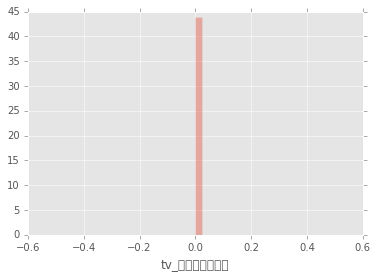

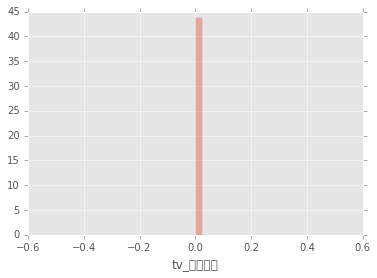

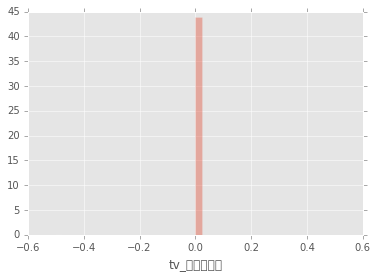

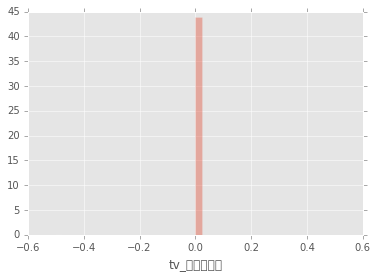

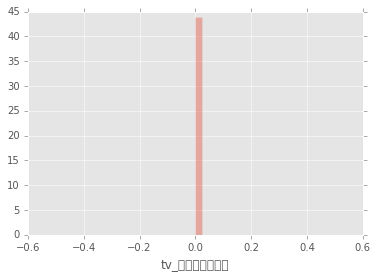

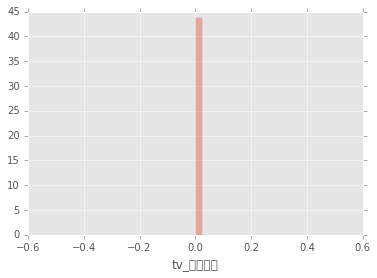

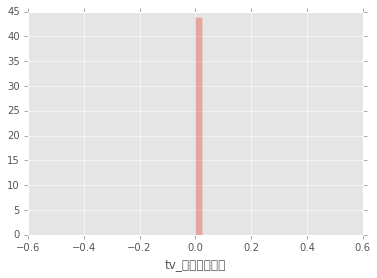

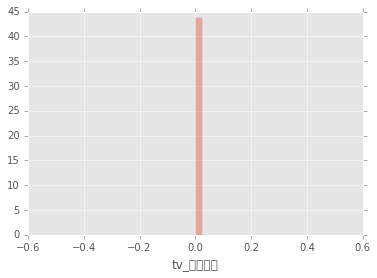

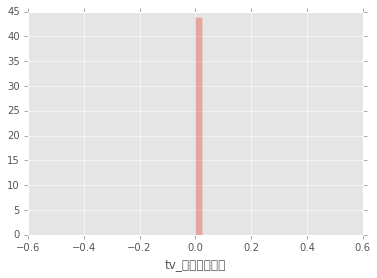

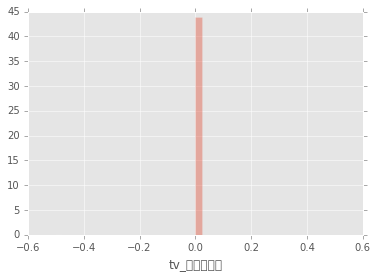

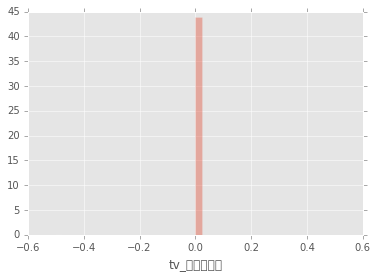

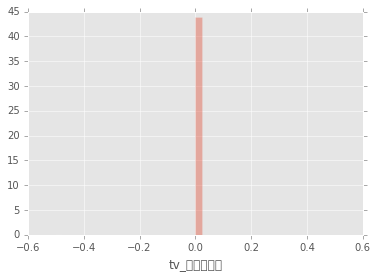

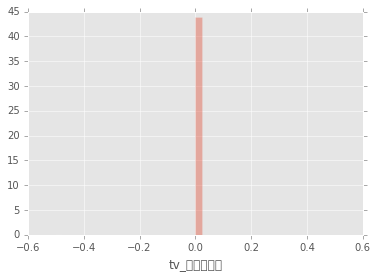

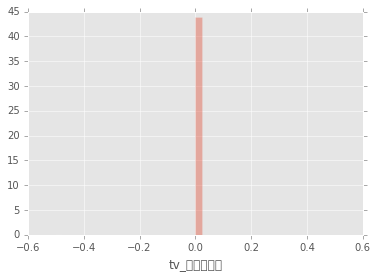

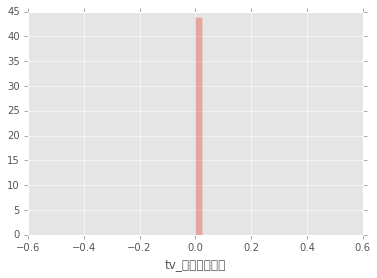

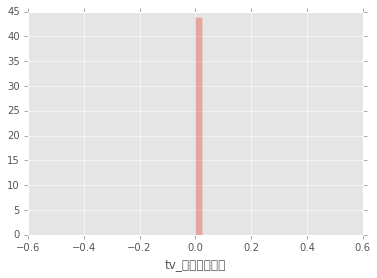

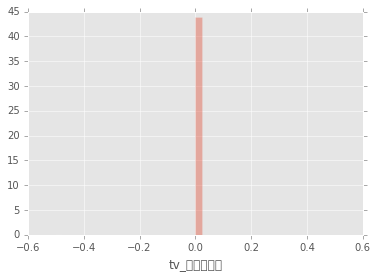

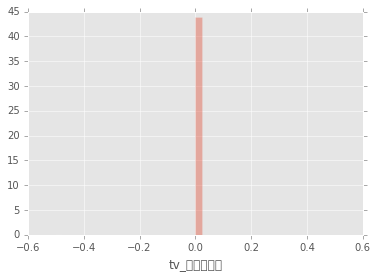

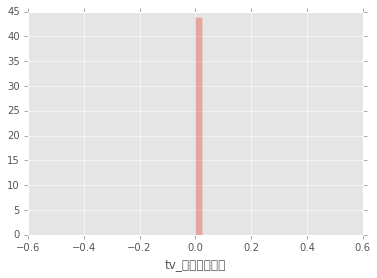

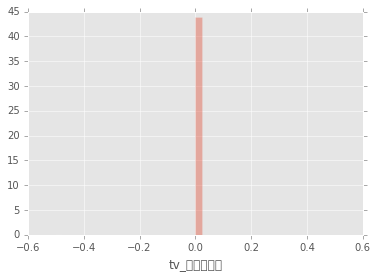

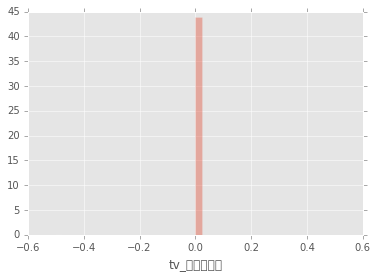

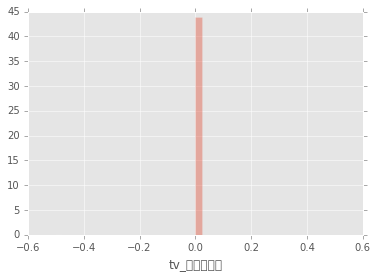

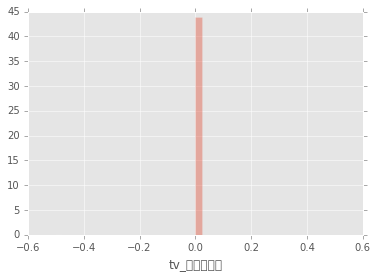

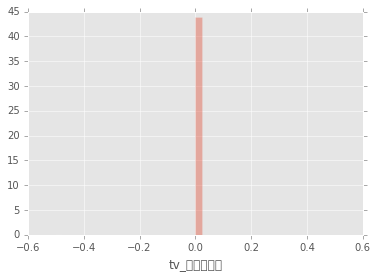

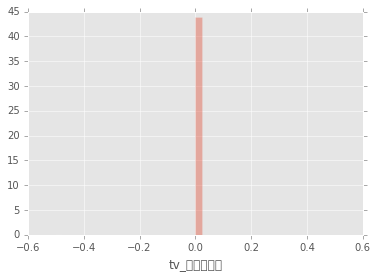

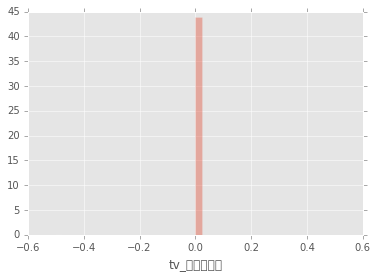

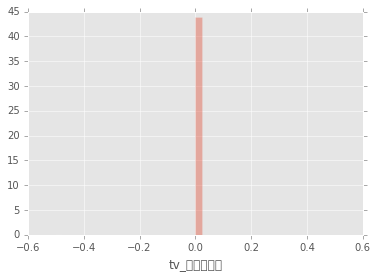

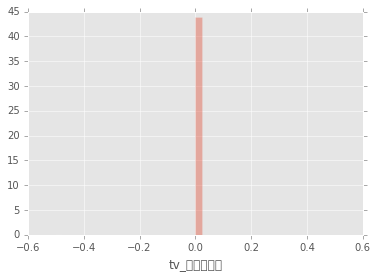

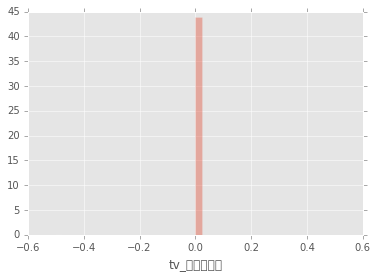

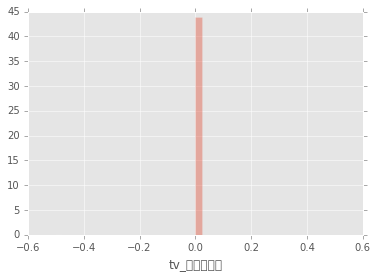

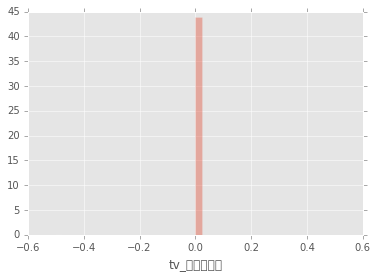

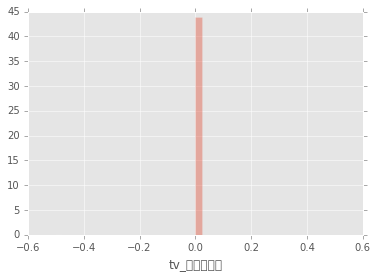

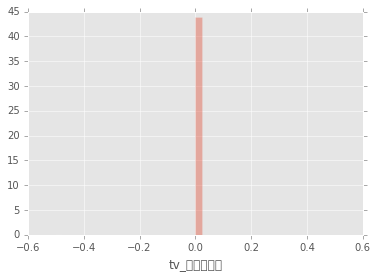

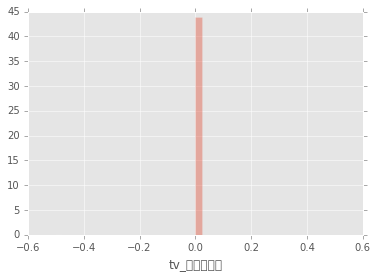

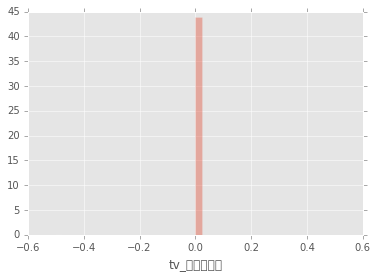

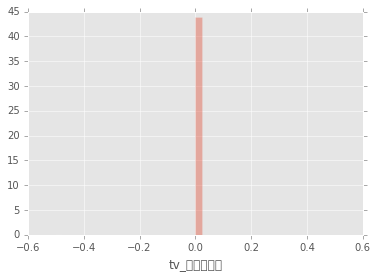

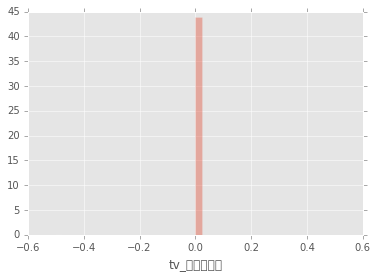

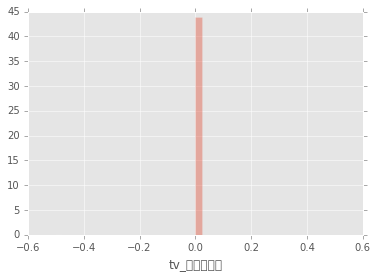

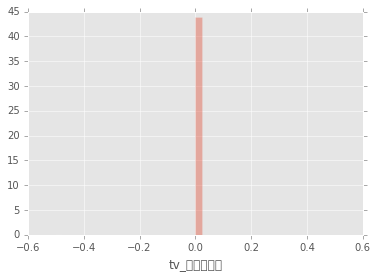

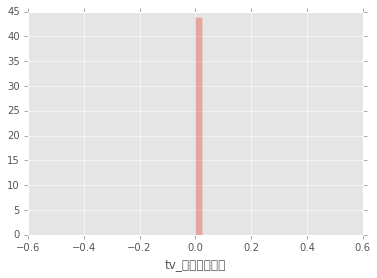

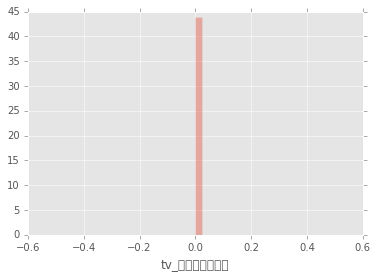

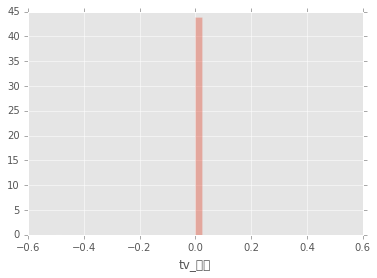

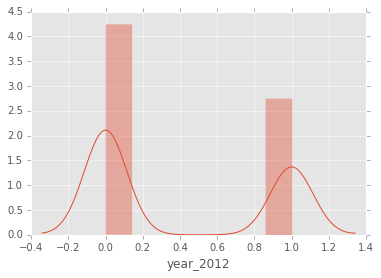

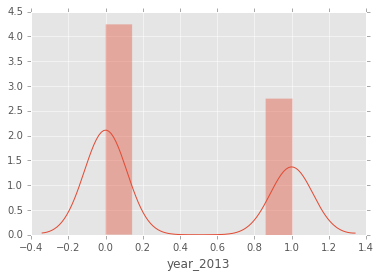

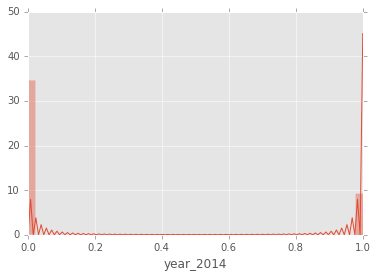

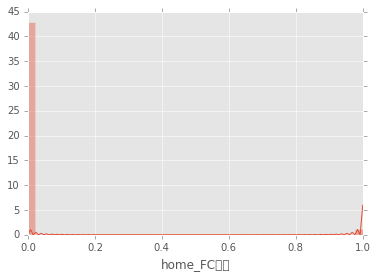

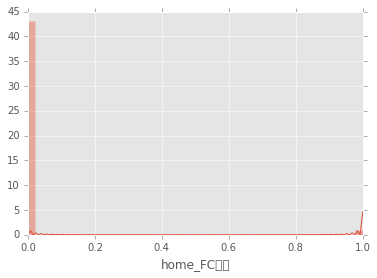

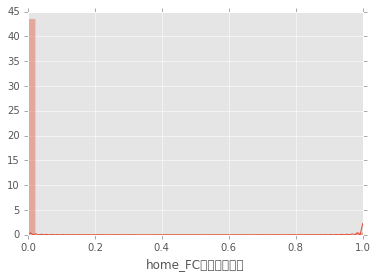

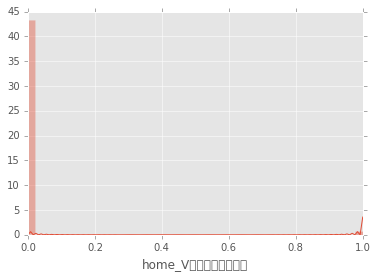

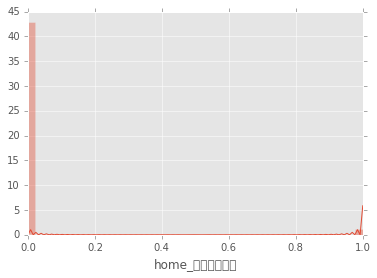

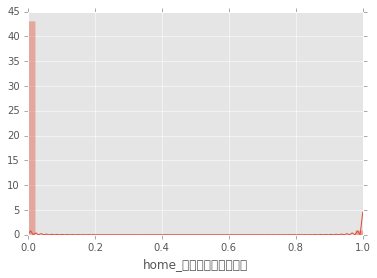

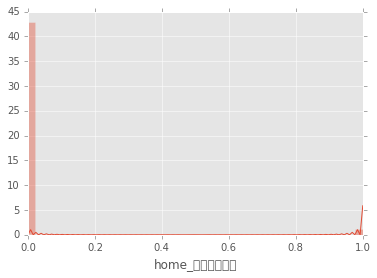

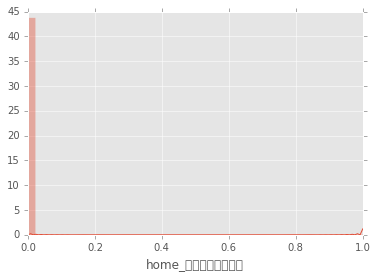

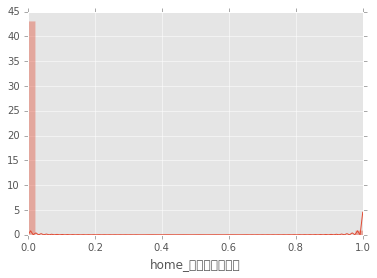

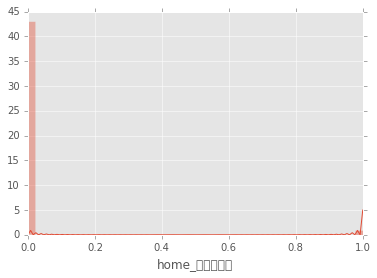

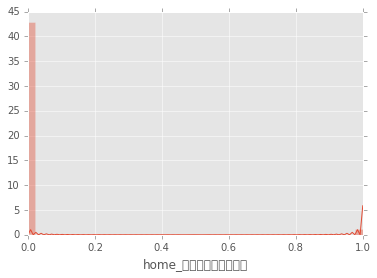

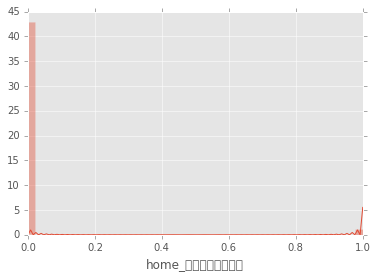

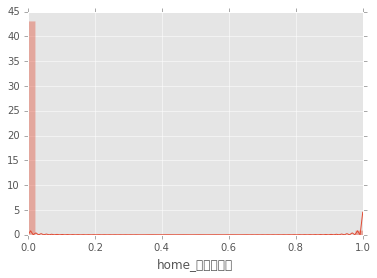

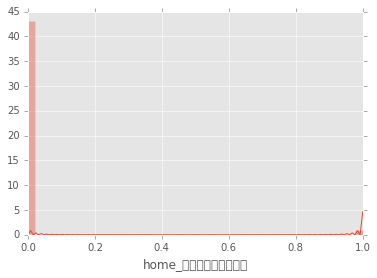

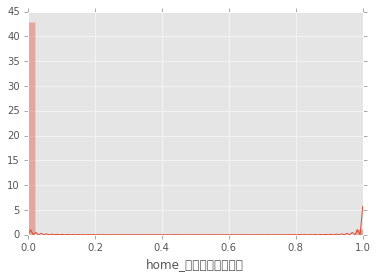

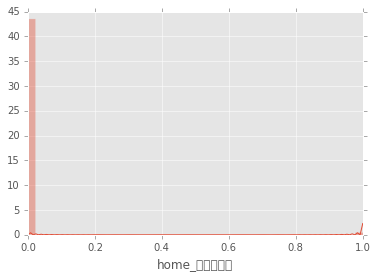

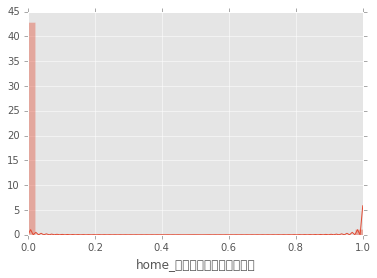

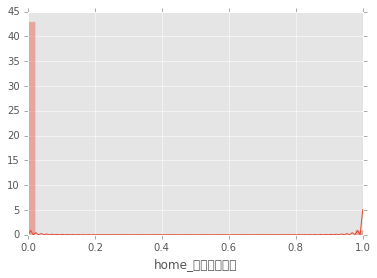

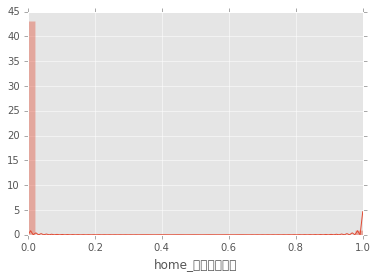

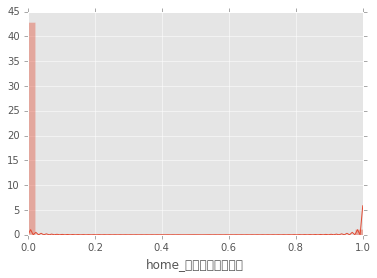

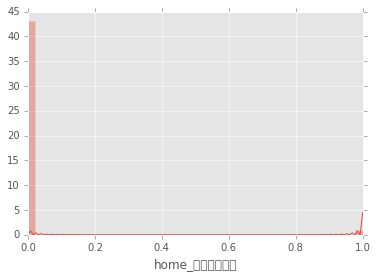

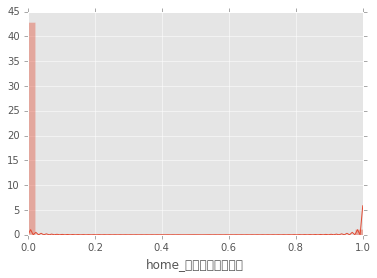

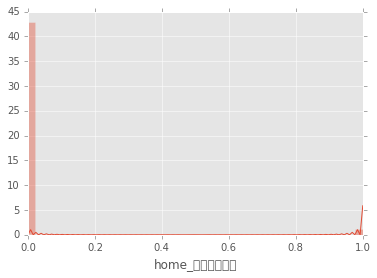

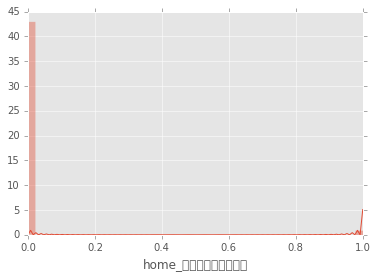

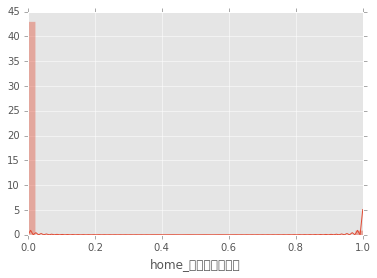

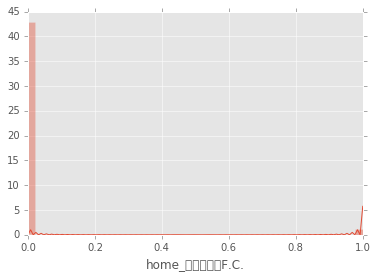

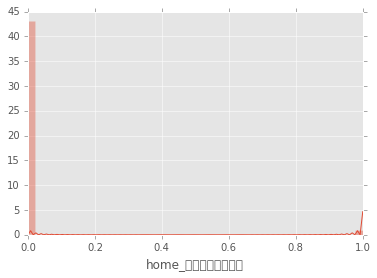

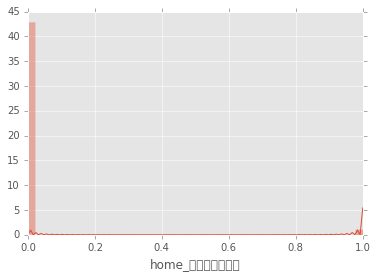

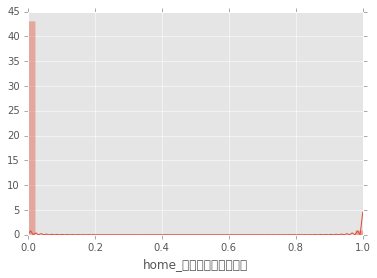

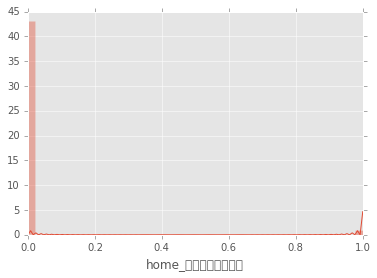

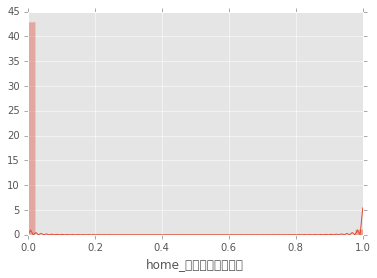

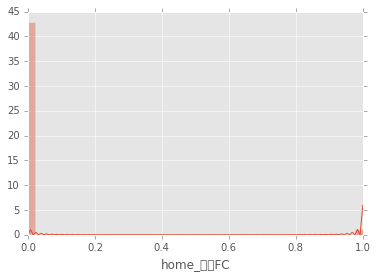

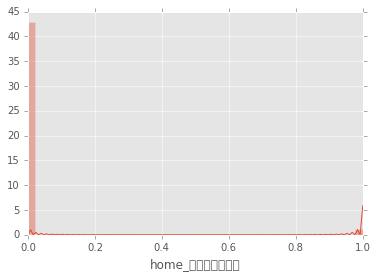

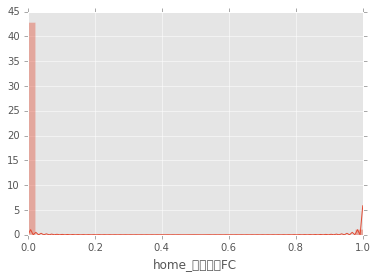

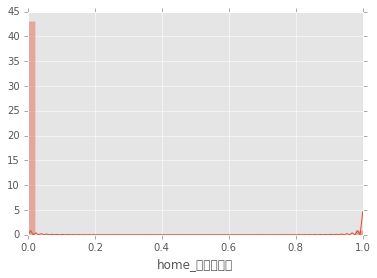

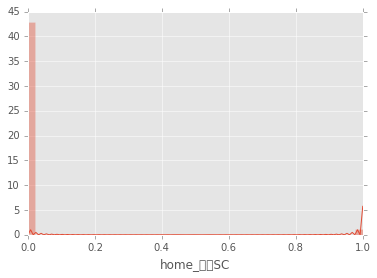

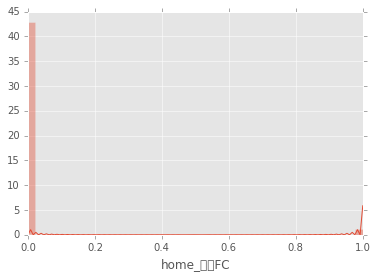

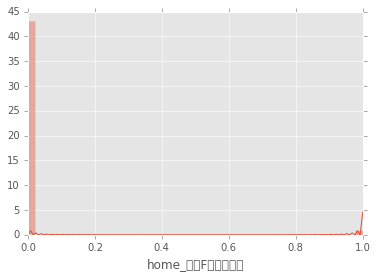

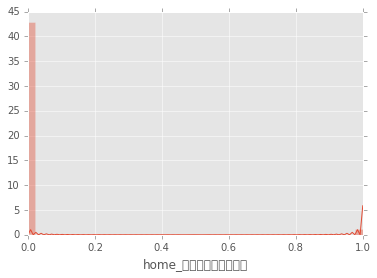

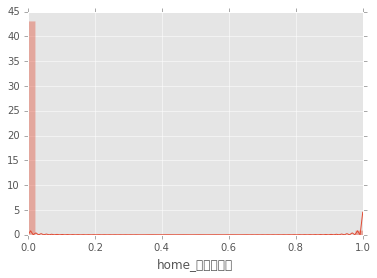

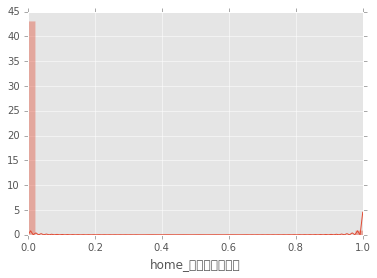

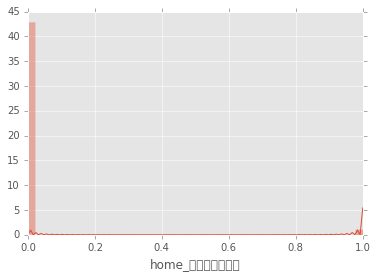

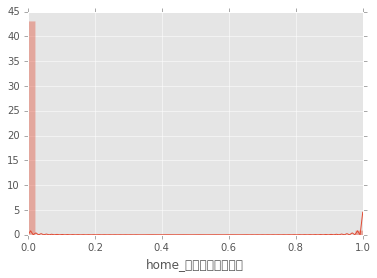

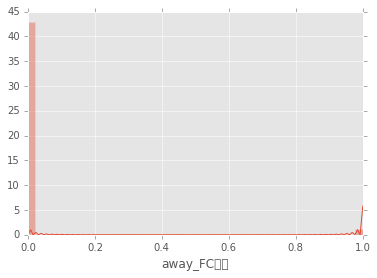

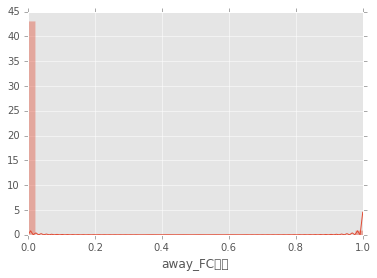

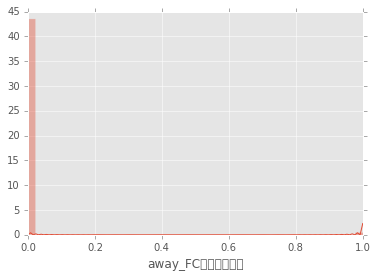

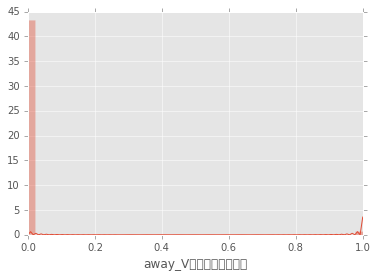

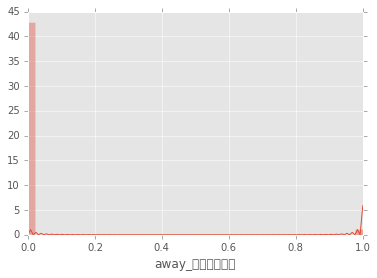

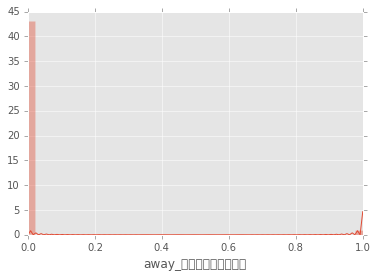

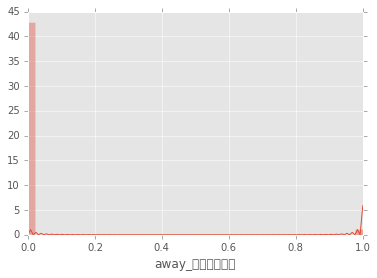

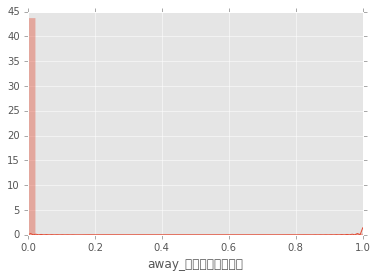

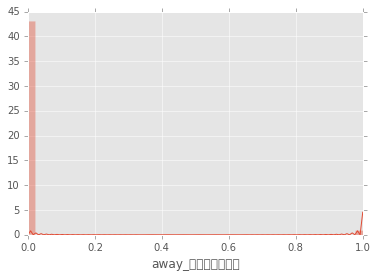

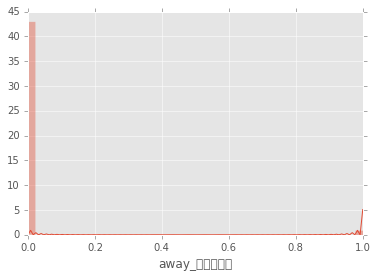

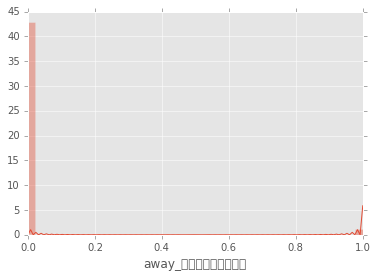

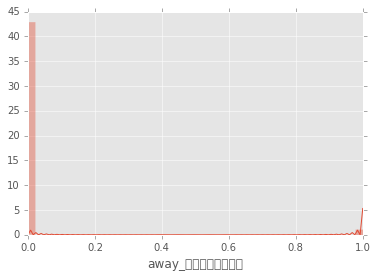

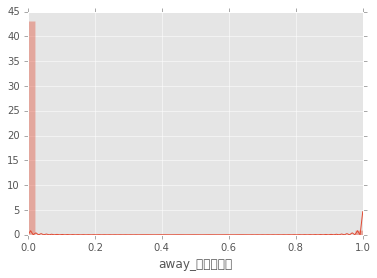

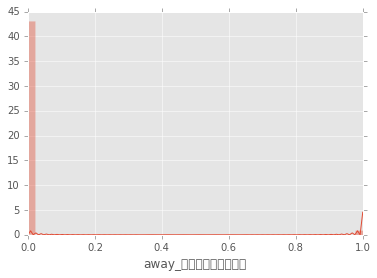

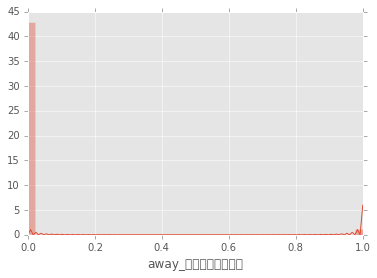

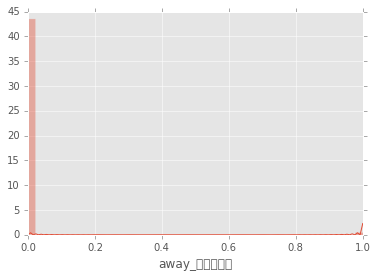

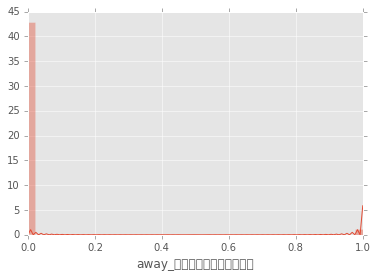

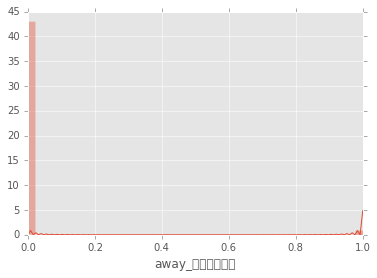

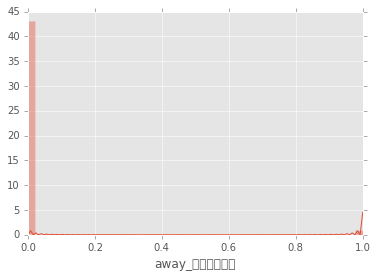

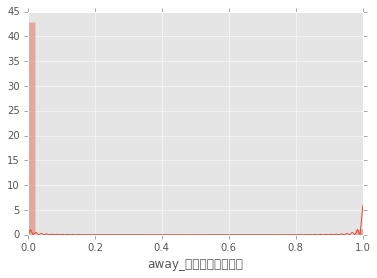

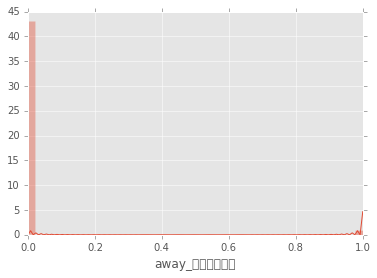

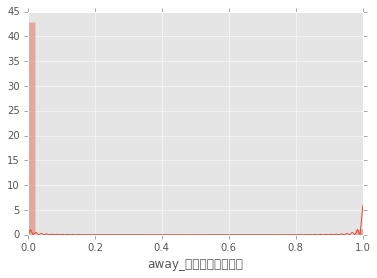

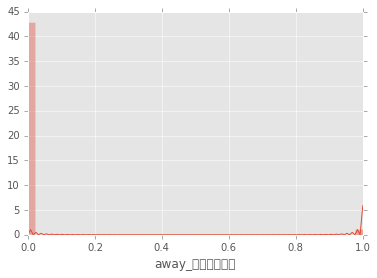

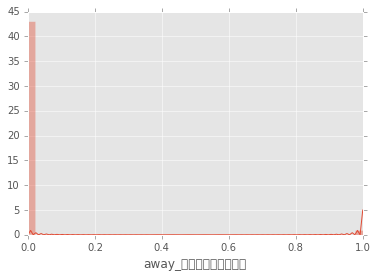

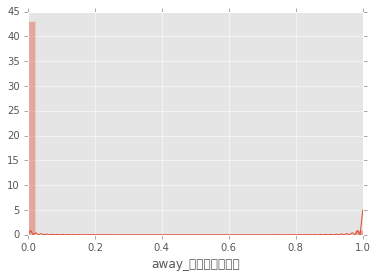

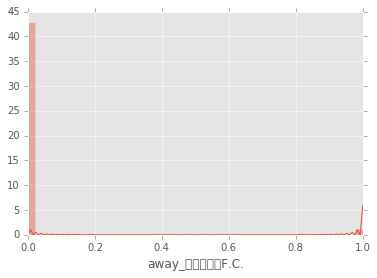

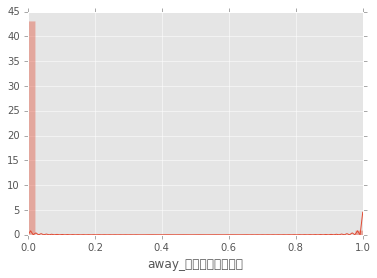

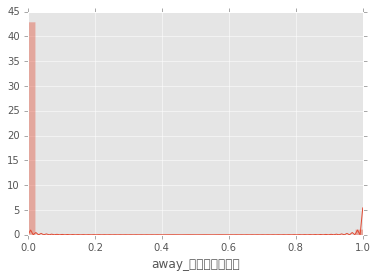

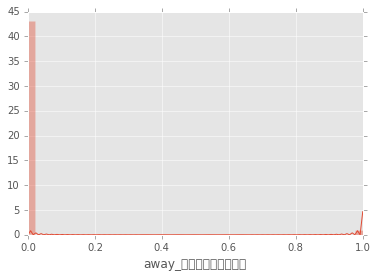

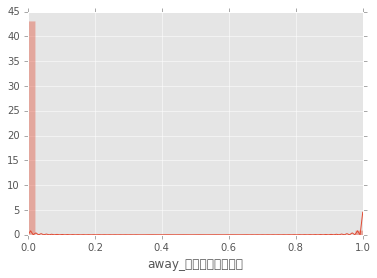

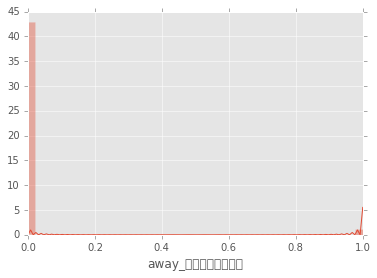

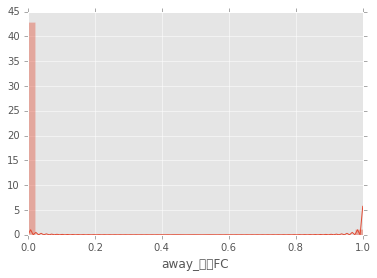

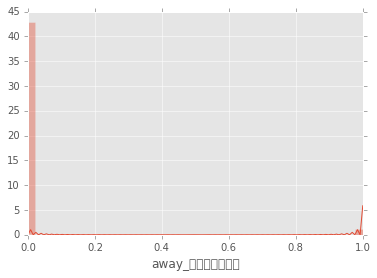

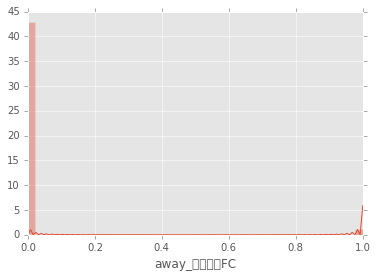

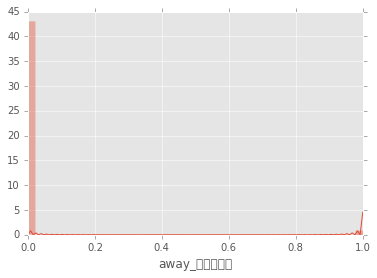

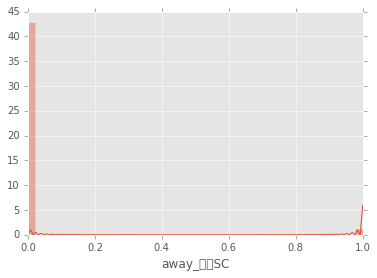

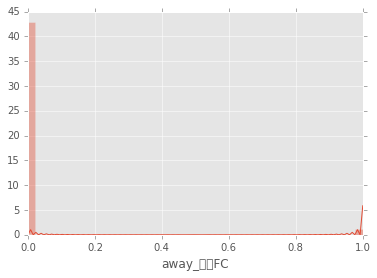

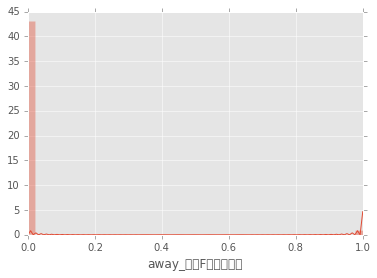

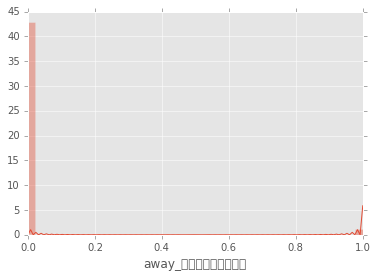

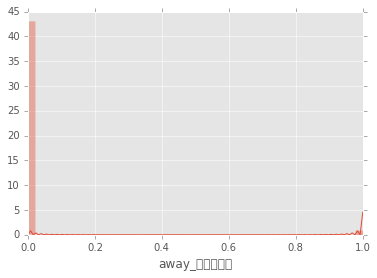

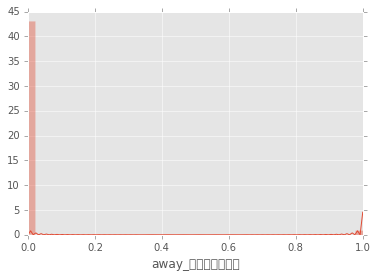

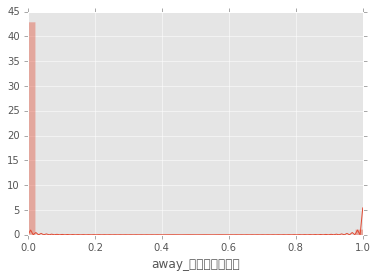

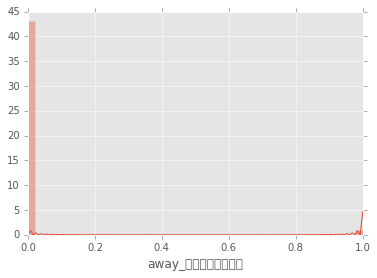

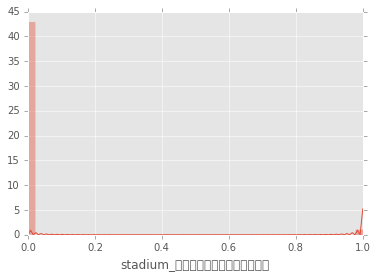

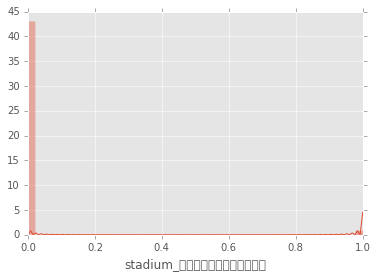

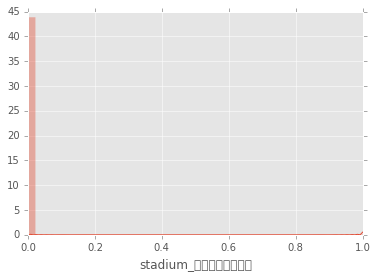

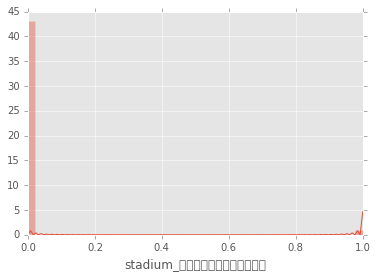

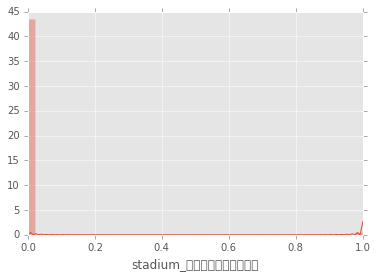

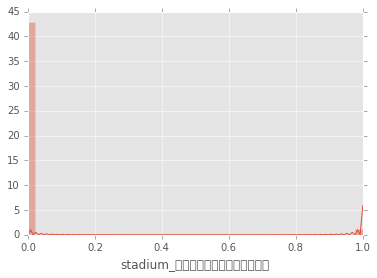

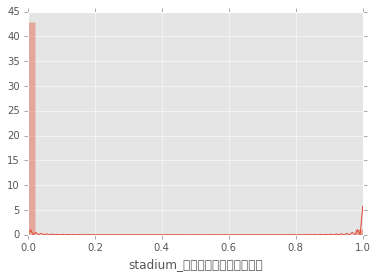

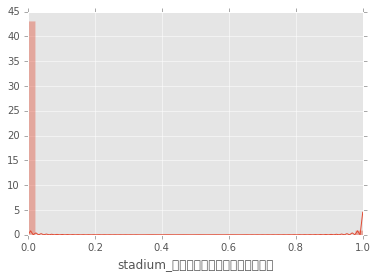

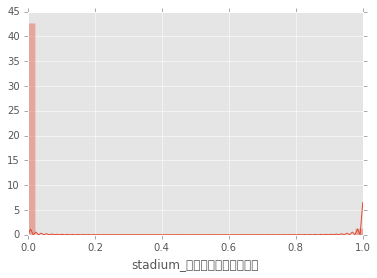

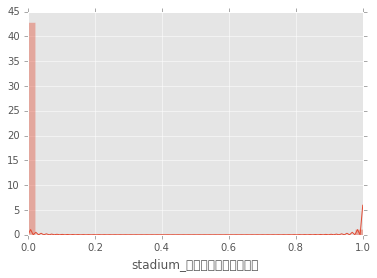

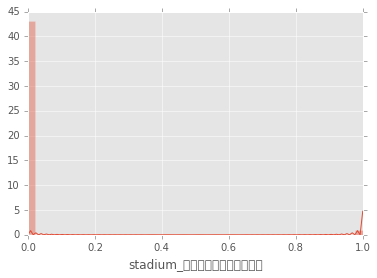

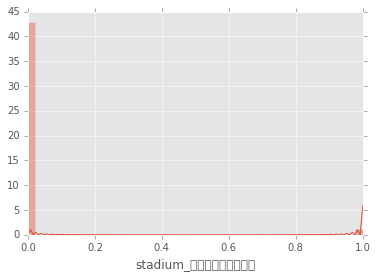

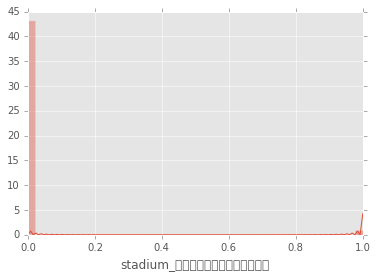

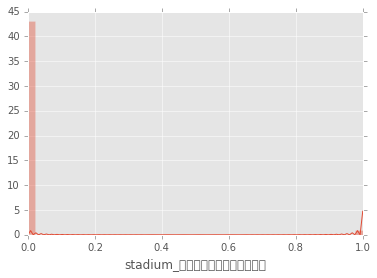

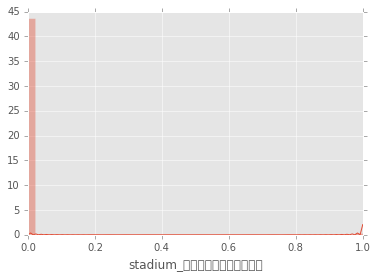

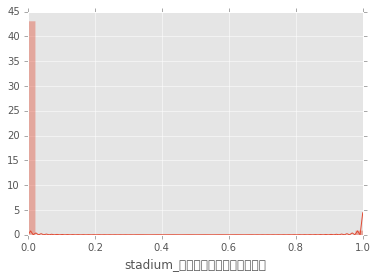

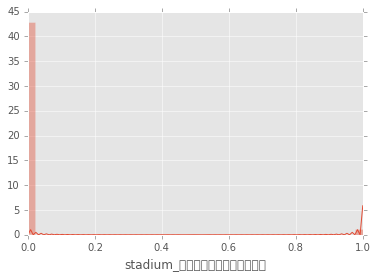

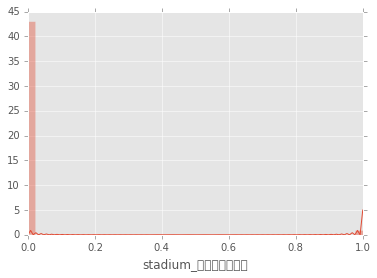

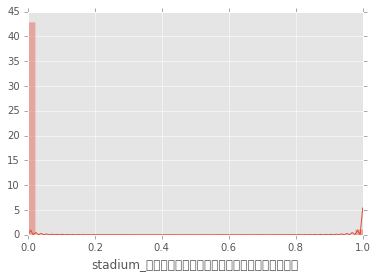

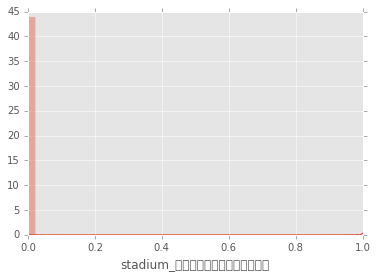

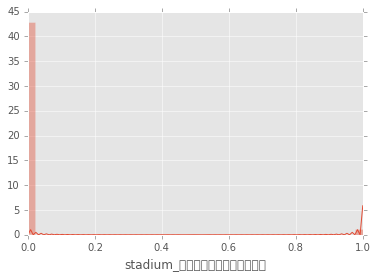

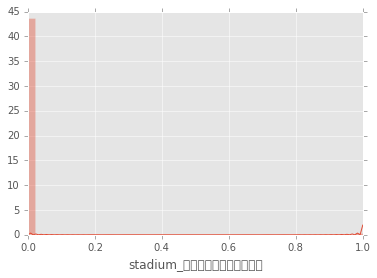

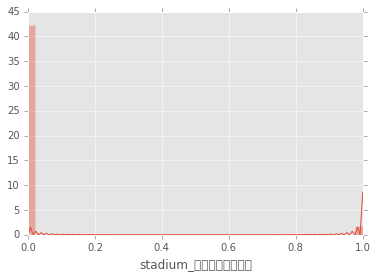

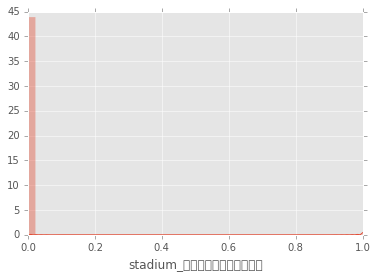

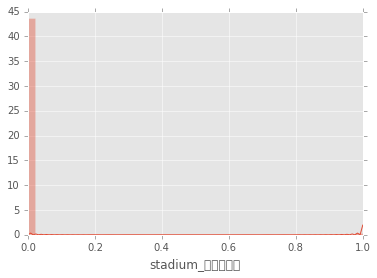

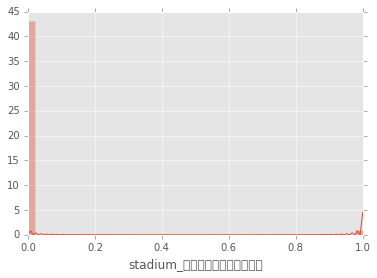

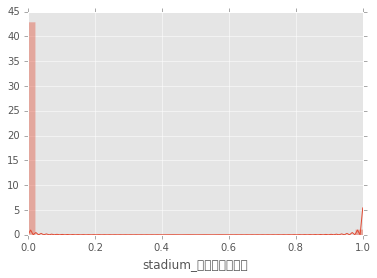

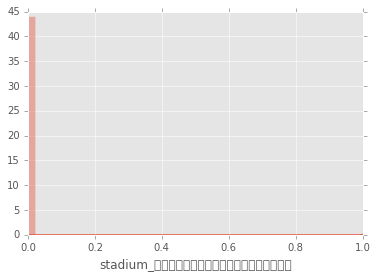

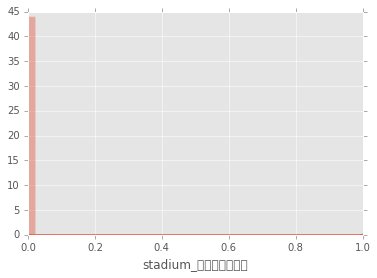

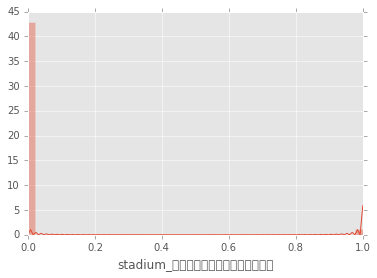

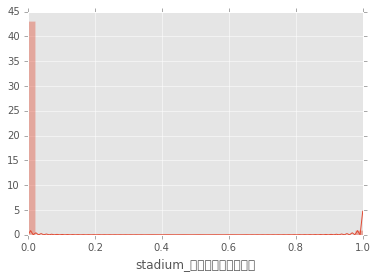

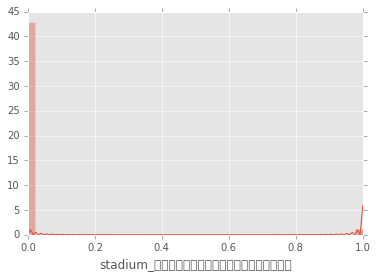

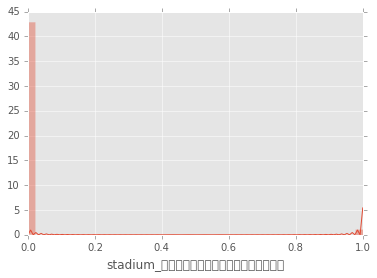

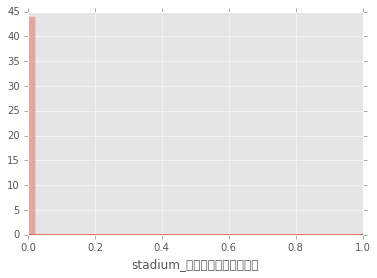

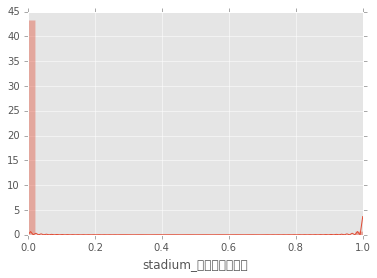

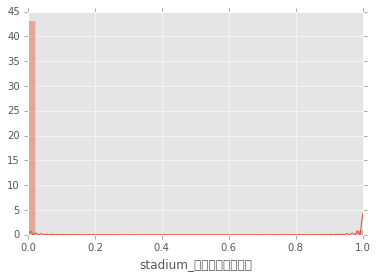

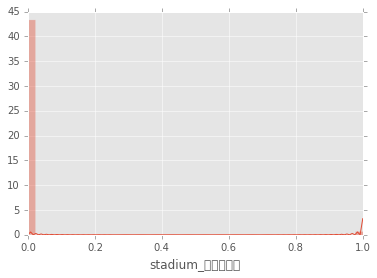

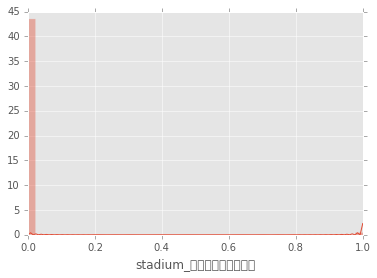

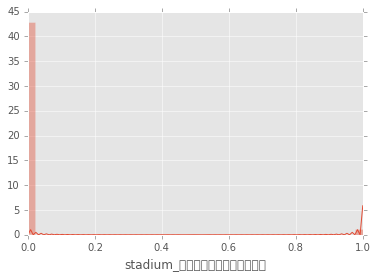

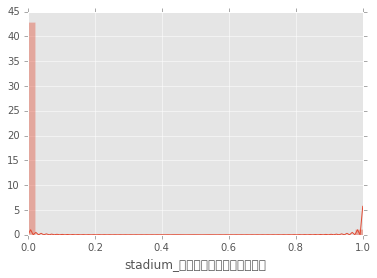

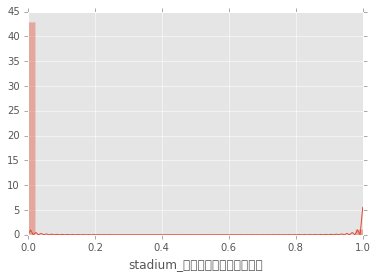

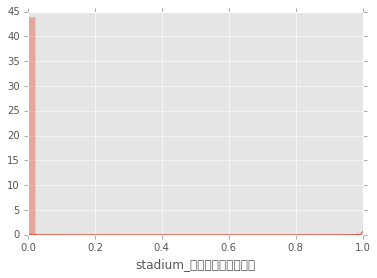

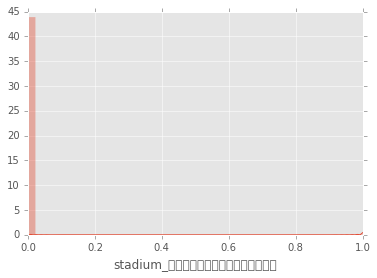

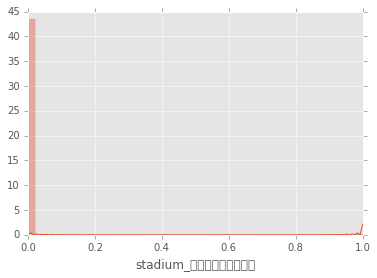

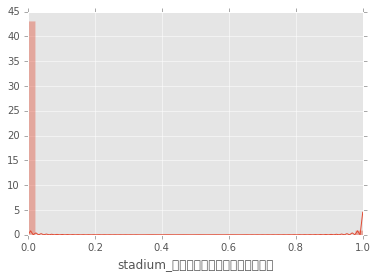

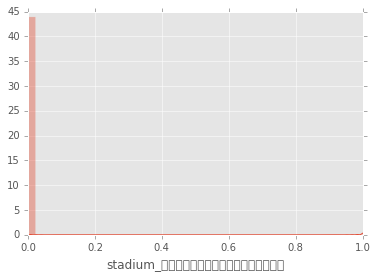

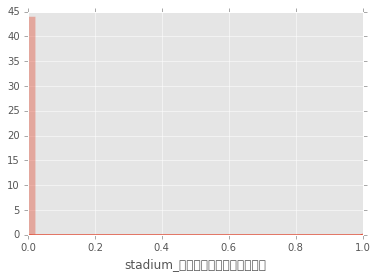

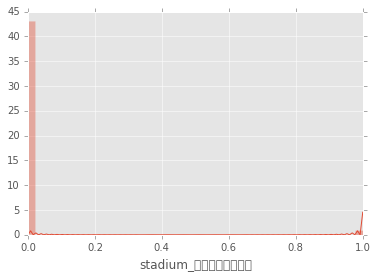

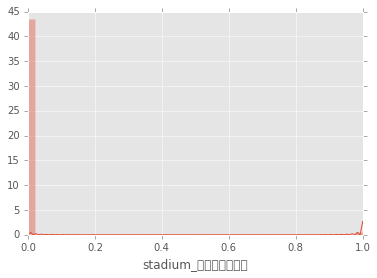

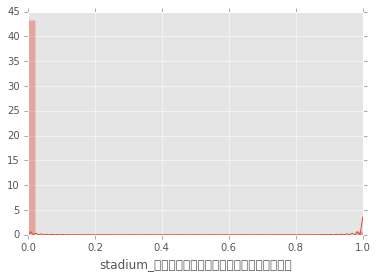

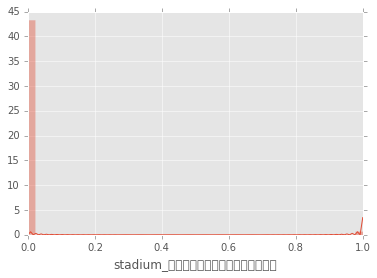

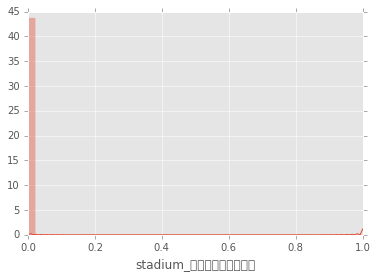

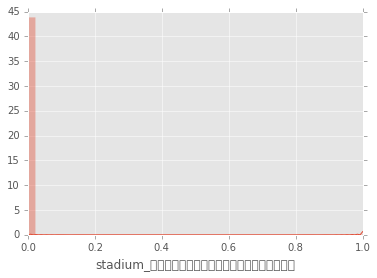

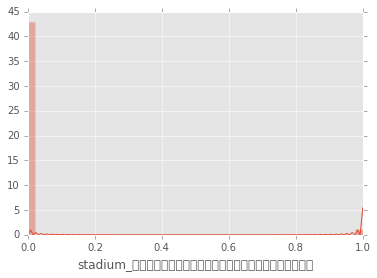

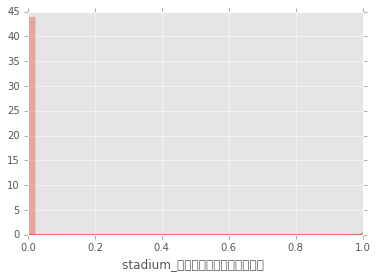

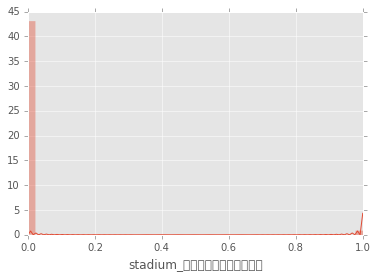

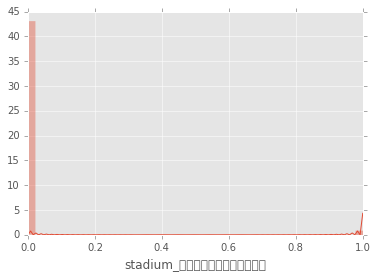

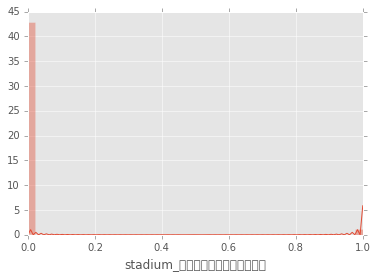

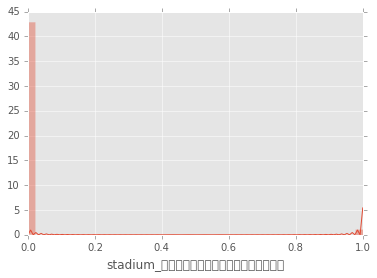

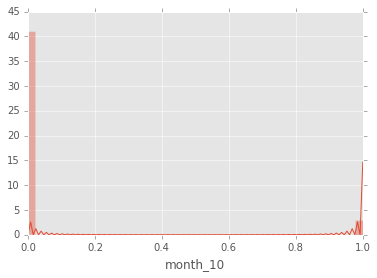

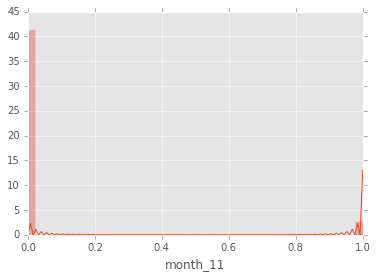

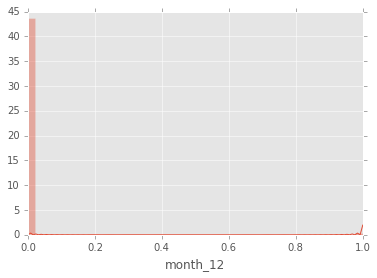

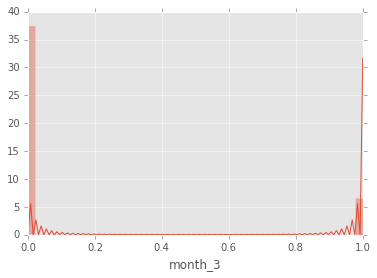

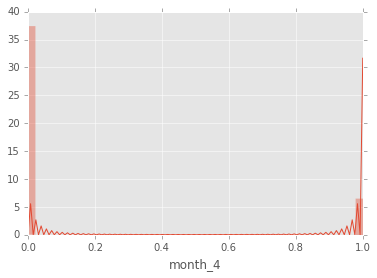

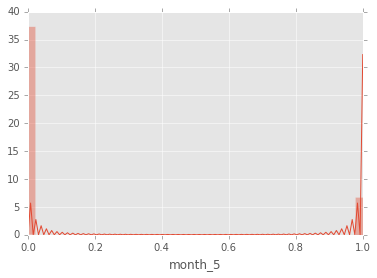

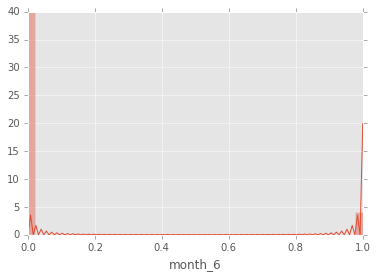

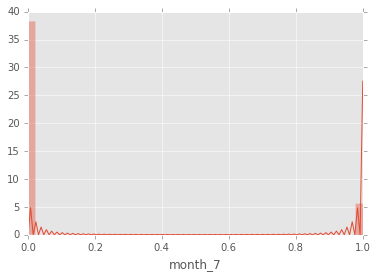

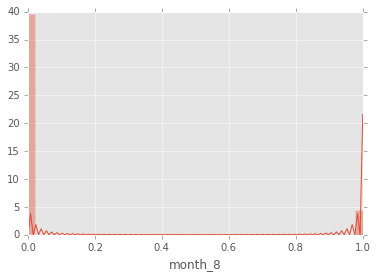

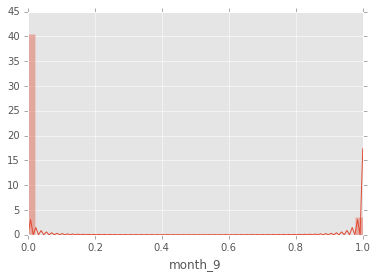

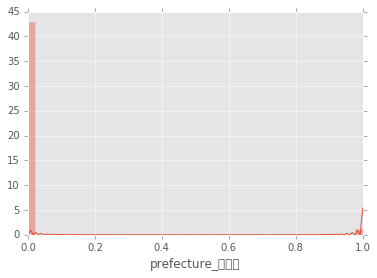

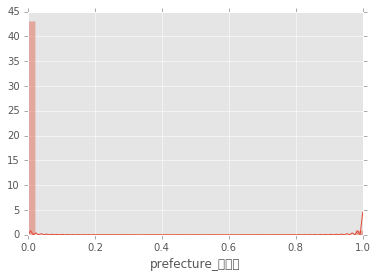

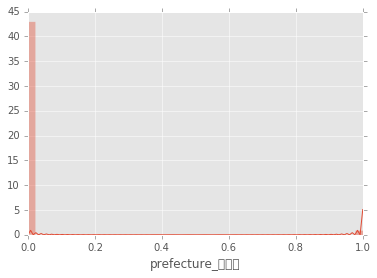

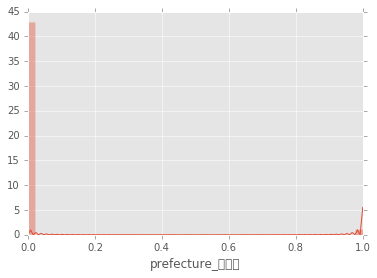

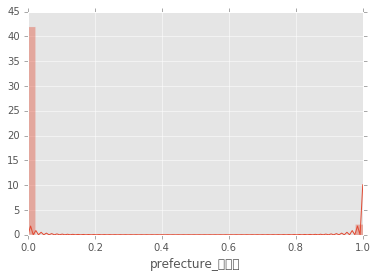

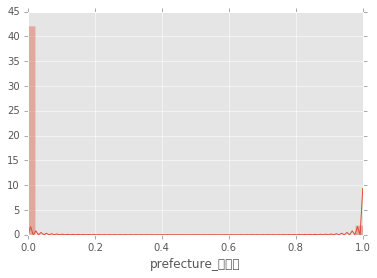

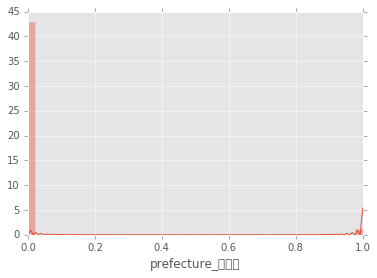

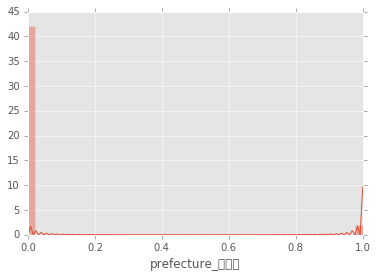

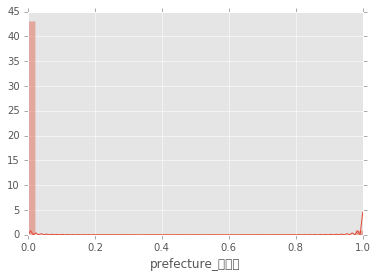

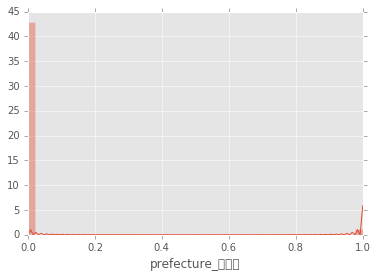

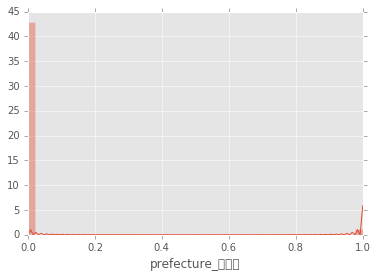

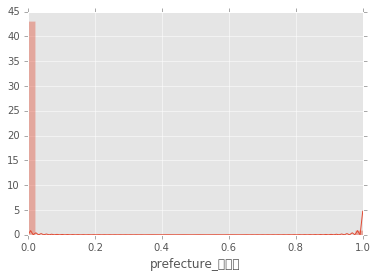

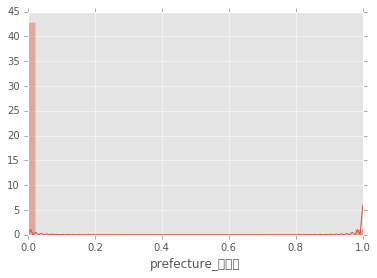

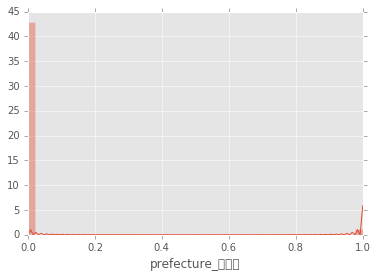

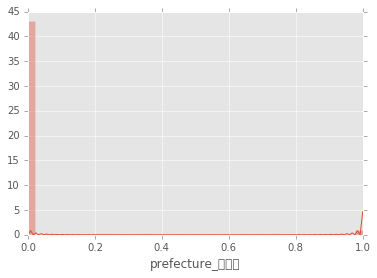

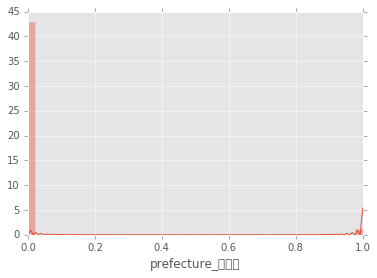

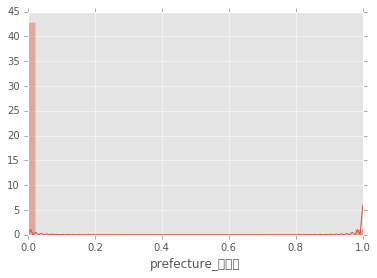

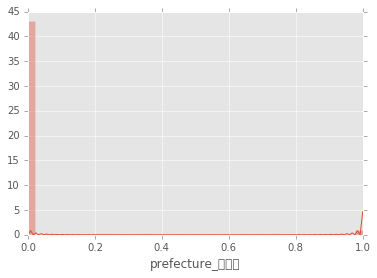

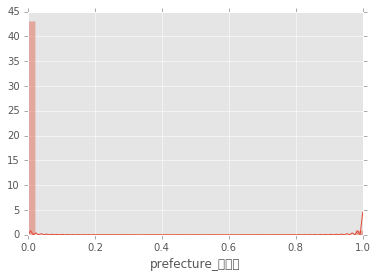

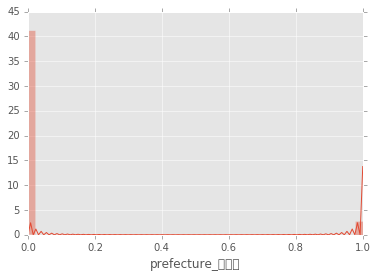

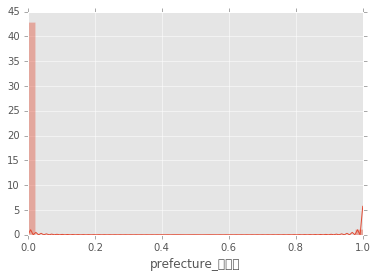

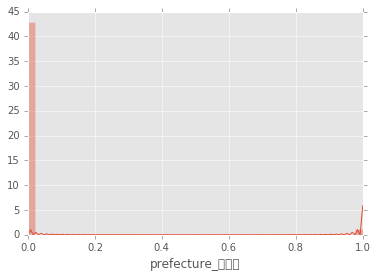

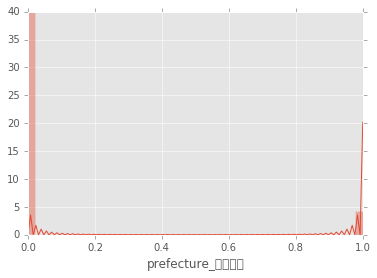

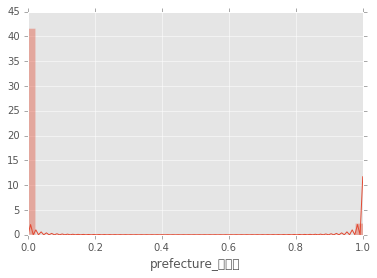

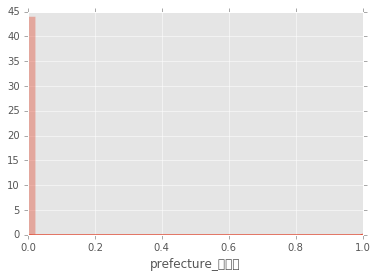

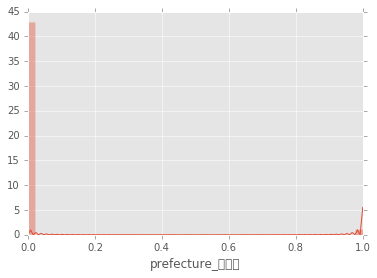

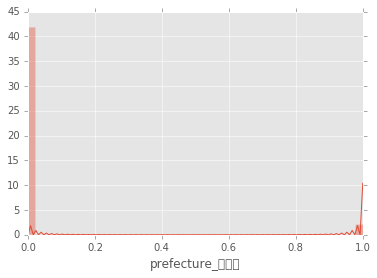

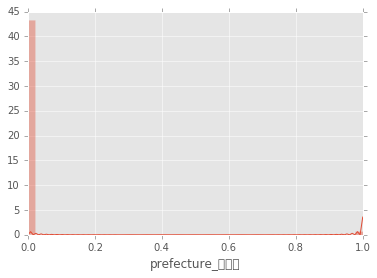

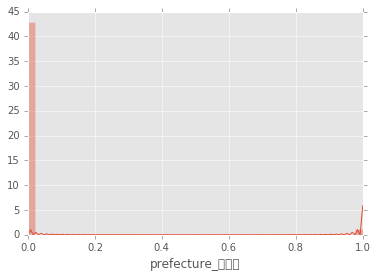

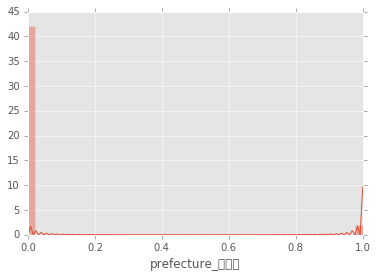

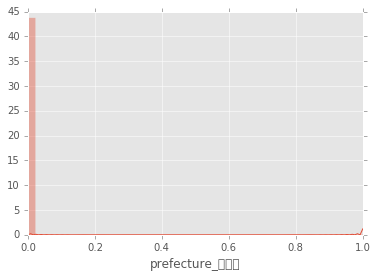

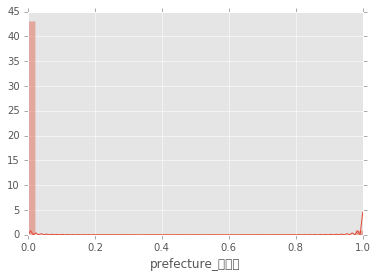

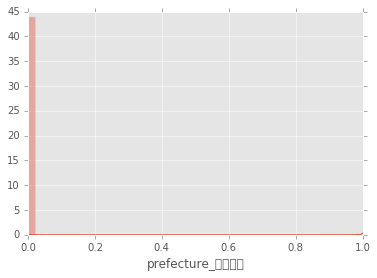

In [26]:
for col in data3.columns:
    sns.distplot(data3[col])
    plt.show()

In [111]:
np.random.seed(6)
trains, tests = train_test_split(data3)
X_train, X_test, y_train, y_test = trains.iloc[:, 1:], tests.iloc[:, 1:], trains.iloc[:, 0], tests.iloc[:, 0]

In [112]:
X_train = X_train.astype('f')
X_test = X_test.astype('f')
test_data = test_data3.astype('f')
y_train = y_train.astype('f')
y_test = y_test.astype('f')

In [113]:
feature_name = X_train.columns

In [114]:
std = sklearn.preprocessing.MinMaxScaler()
std.fit(X_train)
X_train = pd.DataFrame(std.transform(X_train).astype('f'), columns=feature_name)
X_test = pd.DataFrame(std.transform(X_test).astype('f'), columns=feature_name)
test_data = pd.DataFrame(std.transform(test_data).astype('f'), columns=feature_name)

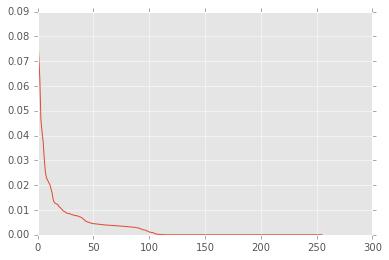

In [2281]:
pca = PCA(whiten=True)
pca.fit(X_train)
X_train = pd.DataFrame(pca.transform(X_train).astype('f'), columns=feature_name)
X_test = pd.DataFrame(pca.transform(X_test).astype('f'), columns=feature_name)
test_data = pd.DataFrame(pca.transform(test_data).astype('f'), columns=feature_name)
plt.plot(pca.explained_variance_ratio_)

In [115]:
clf = sklearn.ensemble.RandomForestRegressor(max_depth=1000, max_leaf_nodes=100, n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [116]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

3278.7404536142581

In [1743]:
y_pred = clf.predict(test_data)
df = pd.DataFrame(y_pred, columns=['y'])
df['id'] = test_id
df = df.reindex(columns=['id', 'y'])
saved = False
i = 0
while not saved:
    name = 'Jリーグ/Jlaegue'
    if not os.path.exists(name+str(i)+'.csv'):
        df.to_csv(name+str(i)+'.csv', index=False, header=False)
        saved = True
    else:
        pass
    i += 1

In [33]:
import hyperopt.pyll
from hyperopt.pyll import scope

In [34]:
from sklearn import datasets, cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
best = None

np.random.seed(25)


def score(params):
    print ("Training with params : ")
    print (params)
    N_boost_round=[]
    Score=[]
    skf = cross_validation.KFold(len(data3.iloc[:, 0]), n_folds=10, shuffle=True, random_state=25)
    
    for train, test in skf:
        X_Train, X_Test, y_Train, y_Test = np.array(data3.iloc[:, 1:])[train], np.array(data3.iloc[:, 1:])[test], np.array(data3.iloc[:, 0])[train], np.array(data3.iloc[:, 0])[test]
        std = sklearn.preprocessing.MinMaxScaler()
        std.fit(X_Train, y_Train)
        X_Train = std.transform(X_Train)
        X_Test = std.transform(X_Test)
        dtrain = xgb.DMatrix(X_Train, label=y_Train)
        dvalid = xgb.DMatrix(X_Test, label=y_Test)
        watchlist = [(dtrain, 'train'),(dvalid, 'eval')]
        model = xgb.train(params, dtrain, num_boost_round=150,evals=watchlist,early_stopping_rounds=10)
        predictions = model.predict(dvalid)
        N = model.best_iteration
        N_boost_round.append(N)
        score = model.best_score
        Score.append(score)
    Average_best_num_boost_round = np.average(N_boost_round)
    Average_best_score = np.average(Score)
    print ("\tAverage of best iteration {0}\n".format(Average_best_num_boost_round))
    print ("\tScore {0}\n\n".format(Average_best_score))
    return {'loss': Average_best_score, 'status': STATUS_OK}




def optimize(trials):
    space = {
        "objective": 'reg:linear',
        "eval_metric": "rmse",
        
        #Control complexity of model
        "eta" : hp.quniform("eta", 0.05, 0.4, 0.05),
        "max_depth" : scope.int(hp.quniform("max_depth", 5, 10, 1)),
        "min_child_weight" : scope.int(hp.quniform('min_child_weight', 3, 8, 1)),
        'gamma' : hp.quniform('gamma', 0.05, 0.2, 0.05),
        
        #Improve noise robustness
        "subsample" : hp.quniform('subsample', 0.7, 1, 0.05),
        "colsample_bytree" : hp.quniform('colsample_bytree', 0.3, 0.7, 0.05),
        'silent' : 1}
    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=50)
    print ("best parameters",best)



#出力
#best parameters {'colsample_bytree': 0.9500000000000001, 'min_child_weight': 1.0, #'subsample':0.9500000000000001, 'eta': 0.6000000000000001, 'max_depth': 3.0, 'gamma': 0.0}


In [2645]:
trials = Trials()

In [2647]:
optimize(trials)

best parameters {'eta': 0.1, 'subsample': 0.8500000000000001, 'max_depth': 8.0, 'min_child_weight': 5.0, 'gamma': 0.1, 'colsample_bytree': 0.35000000000000003}


In [2484]:
best

In [140]:
dm = xgb.DMatrix(X_train, label=y_train.values, feature_names=feature_name)
'''
params={'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'colsample_bytree': 0.9500000000000001, 
        'min_child_weight': 1.0,
        'subsample': 0.9500000000000001,
        'eta': 0.3000000000000001,
        'max_depth': 100,
        'gamma': 0.0,
        
        }
'''
'''

params={'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'eta': 0.30000000000000004, 
     'subsample': 0.9, 
     'max_depth': 4, 
     'min_child_weight': 10.0, 
     'gamma': 0.4, 
     'colsample_bytree': 0.2
    }
    
#3676.7422
'''

'''
params = {'objective': 'reg:linear',
        'eval_metric': 'rmse',
          'eta': 0.25, 
          'subsample': 0.8500000000000001,
          'max_depth': 5,
          'min_child_weight': 14,
          'gamma': 0.4, 
          'colsample_bytree': 0.45}
'''
'''
params = {'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'eta': 0.2,
          'subsample': 0.9,
          'max_depth': 6,
          'min_child_weight': 5,
          'gamma': 0.1,
          'colsample_bytree': 0.5
    }


#3565.0125、データ処理全部盛り（スタジアムなし、homeweightなし）
'''

params = {'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'eta': 0.2,
          'subsample': 0.9,
          'max_depth': 7,
          'min_child_weight': 5,
          'gamma': 0.1,
          'colsample_bytree': 0.5
    }


#3573.292、データ処理全部盛り（homeweightなし）
#3552.4639 データ処理全部盛り
#3502.2495 データ処理全部盛り（vacationに冬休み追加)
#3690.4314 データ処理全部盛り（さらにtime追加）
#3116　さらに外れ値処理
#2967.5396　すたじあm

'''
params = {'objective': 'reg:linear',
        'eval_metric': 'rmse',
         'eta': 0.1,
         'subsample': 0.8500000000000001,
         'max_depth': 8,
         'min_child_weight': 5,
         'gamma': 0.1,
         'colsample_bytree': 0.35000000000000003
          }
'''
#3585.0544 データ処理全部盛り（vacationに冬休み追加)
#3062.99　さらに外れ値処理
#3020.8887　さらに同じスタジアム、チームを統合
#3035　さらに節追加

cv = xgb.cv(params, dm, num_boost_round=300, nfold=10)

In [141]:
min_index = cv[cv['test-rmse-mean'] == min(cv['test-rmse-mean'])].index[0]
min_index

100

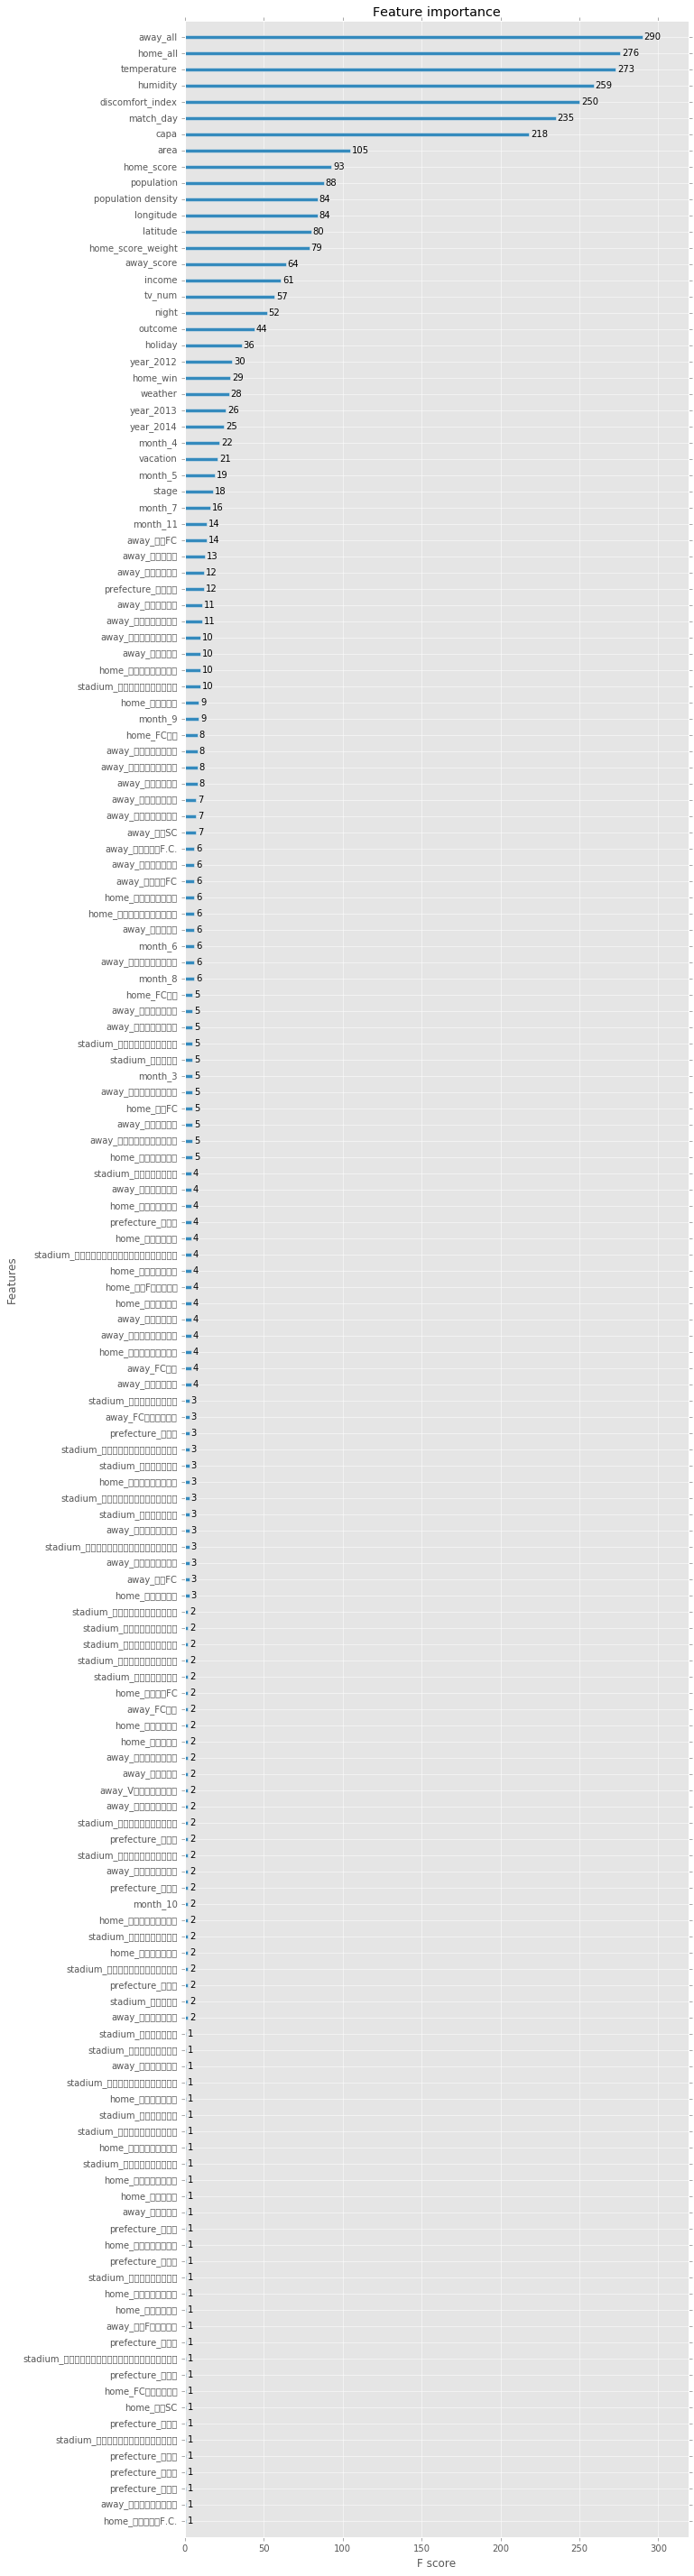

In [142]:
np.random.seed(1)
bst = xgb.train(params, dm, num_boost_round=min_index)
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(10, 50)

In [143]:
dtest = xgb.DMatrix(X_test)
y_pred2 = bst.predict(dtest)

In [144]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred2))

2967.5396

In [125]:
y_sub = y_pred2 - y_test
pd.concat([X_test, y_sub], axis=1, ignore_index=True)

0         1    2    3    4     5         6      7    8         9    \
0     1.0  0.439024  1.0  1.0  1.0  0.25  0.285714  0.375  0.0  0.765244   
1     1.0  0.073171  1.0  1.0  0.0  0.50  0.285714  0.000  0.0  0.481707   
2     0.0  0.390244  0.0  0.0  1.0  0.50  0.142857  0.000  0.0  0.603659   
3     0.0  0.097561  1.0  1.0  0.0  0.25  0.428571  0.000  1.0  0.554878   
4     0.0  0.829268  1.0  1.0  0.0  0.50  0.142857  0.000  1.0  0.490854   
5     1.0  0.195122  0.0  0.0  1.0  0.50  0.285714  0.125  0.0  0.490854   
6     1.0  0.097561  1.0  0.0  1.0  0.25  0.428571  0.375  1.0  0.429878   
7     1.0  0.146341  1.0  0.0  0.0  0.25  0.142857  0.000  1.0  0.240854   
8     0.0  0.804878  1.0  1.0  0.0  0.25  0.285714  0.125  0.0  0.893293   
9     0.0  0.439024  1.0  0.0  1.0  0.25  0.142857  0.125  0.0  0.667683   
10    1.0  0.756098  1.0  0.0  1.0  0.25  0.142857  0.000  1.0  0.317073   
11    1.0  0.048780  1.0  1.0  1.0  0.75  0.285714  0.125  0.0  0.219512   
12    0.0  0.682927  1.0  1.0  1.0  0.25  0.428571  0.000  0.0  0.878049   
13    0.0  0.365854  1.0  0.0  0.0  0.25  0.000000  0.125  0.0  0.646341   
14    0.0  0.146341  1.0  0.0  0.0  0.50  0.000000  0.125  0.0  0.533537   
15    0.0  1.000000  1.0  0.0  0.0  0.50  0.000000  0.125  0.0  0.591463   
16    0.0  0.390244  1.0  0.0  0.0  0.25  0.142857  0.000  0.0  0.759146   
17    1.0  0.146341  1.0  0.0  1.0  0.50  0.285714  0.000  0.0  0.326220   
18    1.0  0.000000  1.0  1.0  0.0  0.75  0.000000  0.000  0.0  0.643293   
19    0.0  0.634146  1.0  1.0  1.0  0.50  0.142857  0.000  0.0  0.823171   
20    0.0  0.317073  1.0  0.0  1.0  0.50  0.000000  0.125  0.0  0.533537   
21    1.0  0.341463  1.0  1.0  1.0  0.50  0.285714  0.000  0.0  0.707317   
22    1.0  0.634146  1.0  1.0  0.0  0.75  0.571429  0.125  0.0  0.643293   
23    1.0  0.658537  1.0  0.0  1.0  0.50  0.000000  0.000  0.0  0.618902   
24    0.0  0.000000  1.0  1.0  0.0  0.50  0.285714  0.000  0.0  0.182927   
25    1.0  0.707317  1.0  0.0  1.0  0.25  0.000000  0.250  0.0  0.530488   
26    1.0  0.073171  1.0  1.0  1.0  0.75  0.428571  0.000  0.0  0.265244   
27    1.0  0.756098  1.0  0.0  1.0  0.25  0.285714  0.375  0.0  0.576219   
28    0.0  0.243902  1.0  0.0  0.0  0.25  0.142857  0.125  0.0  0.463415   
29    0.0  0.878049  1.0  0.0  0.0  0.25  0.285714  0.000  0.0  0.548780   
...   ...       ...  ...  ...  ...   ...       ...    ...  ...       ...   
1837  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1843  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1851  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1854  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1856  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1858  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1860  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1862  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1864  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1867  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1876  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1877  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1879  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1882  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1883  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1886  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1892  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1901  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1902  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1905  NaN       NaN  NaN  NaN  NaN   NaN       NaN    NaN  NaN       NaN   
1912  NaN       NaN  NaN  NaN  NaN   NaN       NaN    

In [137]:
X_test.ix[y_sub[y_sub > 0].index]

stage  match_day  holiday  vacation  night  tv_num  home_score  \
801     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1739    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
683     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
846     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
810     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1442    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1281    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
767     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
593     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1667    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
242     1.0   0.536585      0.0       1.0    1.0    0.25    0.285714   
1013    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
35      0.0   0.585366      1.0       1.0    1.0    0.25    0.285714   
279     0.0   0.292683      1.0       0.0    0.0    0.75    0.000000   
706     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1498    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
799     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
88      0.0   0.560976      1.0       1.0    1.0    0.50    0.285714   
970     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
381     1.0   0.780488      1.0       0.0    1.0    0.50    0.285714   
994     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
657     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1460    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
522     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
894     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1368    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
797     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1297    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
373     0.0   0.926829      1.0       0.0    0.0    0.25    0.142857   
733     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
...     ...        ...      ...       ...    ...     ...         ...   
341     0.0   0.536585      1.0       1.0    1.0    0.25    0.142857   
400     1.0   0.682927      1.0       0.0    0.0    0.25    0.285714   
1735    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1162    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
691     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
363     1.0   0.292683      0.0       0.0    1.0    0.50    0.285714   
742     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1348    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
526     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
137     0.0   0.975610      1.0       0.0    0.0    0.75    0.142857   
1120    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1114    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1112    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1194    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1892    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
865     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1645    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1180    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
758     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1931    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
1815    NaN        NaN      NaN       NaN    NaN     NaN         NaN   
529     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
613     NaN        NaN      NaN       NaN    NaN     NaN         NaN   
979     NaN        NaN      NaN       NaN    N

In [145]:
dtest = xgb.DMatrix(test_data)
y_pred3 = bst.predict(dtest)

In [146]:
df = pd.DataFrame(y_pred3, columns=['y'])
df['id'] = test_id
df = df.reindex(columns=['id', 'y'])
saved = False
i = 0
while not saved:
    name = 'Jリーグ/Jlaegue'
    if not os.path.exists(name+str(i)+'.csv'):
        df.to_csv(name+str(i)+'.csv', index=False, header=False)
        saved = True
    else:
        pass
    i += 1

In [1793]:
len(y_train)

1464

In [2056]:
models = [
    ExtraTreesRegressor(random_state = 0, 
        n_estimators = 100, max_depth = 100),
        
    RandomForestRegressor(random_state = 0, max_leaf_nodes=10,
        n_estimators = 100, max_depth = 100),
        
    XGBRegressor(seed = 0, learning_rate = 0.1, 
        n_estimators = 100, max_depth = 7),

    sklearn.linear_model.LinearRegression()
]

# Compute stacking features
S_train, S_test = stacking(models, np.array(X_train), np.array(y_train), np.array(X_test), 
        regression = True, metric = mean_absolute_error, n_folds = 5, 
    shuffle = True, random_state = 0, verbose = 2)
'''
# Initialize 2-nd level model
model = XGBRegressor(seed = 0, learning_rate = 0.1, 
    n_estimators = 100, max_depth = 7)

# Fit 2-nd level model
model = model.fit(S_train, np.array(y_train))

# Predict
y_pred = model.predict(S_test)
'''

dm = xgb.DMatrix(S_train, label=y_train.values)
cv = xgb.cv(params, dm, num_boost_round=100, nfold=10)
min_index = cv[cv['test-rmse-mean'] == min(cv['test-rmse-mean'])].index[0]
np.random.seed(1)
bst = xgb.train(params, dm, num_boost_round=min_index)

dtest = xgb.DMatrix(S_test)
y_pred = bst.predict(dtest)

task:   [regression]
metric: [mean_absolute_error]

model 0: [ExtraTreesRegressor]
    fold 0: [2280.01034130]
    fold 1: [2275.82361775]
    fold 2: [2107.28040956]
    fold 3: [2251.99542662]
    fold 4: [2330.47993151]
    ----
    MEAN:   [2249.06237022]

model 1: [RandomForestRegressor]
    fold 0: [2902.24240137]
    fold 1: [2531.64140189]
    fold 2: [2768.01596745]
    fold 3: [2561.14599602]
    fold 4: [2799.39013234]
    ----
    MEAN:   [2712.42781987]

model 2: [XGBRegressor]
    fold 0: [2387.38948929]
    fold 1: [2002.45619384]
    fold 2: [2192.28627988]
    fold 3: [2138.50169399]
    fold 4: [2139.16303243]
    ----
    MEAN:   [2171.98173973]



In [2057]:
np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))

4080.3594

In [1906]:
allTV = []
TV_list = []
for tv in data_all.tv.values:
    tv = re.sub(u'（.+）', '', tv)
    tv = re.sub(u'※１', '', tv)
    tv = re.sub(u'　', '', tv)
    allTV += tv.split('／')
    TV_list.append(tv.split('／'))

TV_df = pd.DataFrame(np.zeros([len(data_all), len(np.unique(allTV))]), columns=np.unique(allTV))
for i, l in enumerate(TV_list):
    for tv in l:
        TV_df.ix[i] += TV_df.columns == tv

pd.concat([data_all, TV_df], axis=1)

id      y  year stage    match   gameday   time         home  \
0     13994  18250  2012    Ｊ１   第１節第１日  03/10(土)  14:04       ベガルタ仙台   
1     13995  24316  2012    Ｊ１   第１節第１日  03/10(土)  14:04     名古屋グランパス   
2     13996  17066  2012    Ｊ１   第１節第１日  03/10(土)  14:04        ガンバ大阪   
3     13997  29603  2012    Ｊ１   第１節第１日  03/10(土)  14:06    サンフレッチェ広島   
4     13998  25353  2012    Ｊ１   第１節第１日  03/10(土)  14:04     コンサドーレ札幌   
5     13999  11283  2012    Ｊ１   第１節第１日  03/10(土)  14:05        サガン鳥栖   
6     14000  18920  2012    Ｊ１   第１節第１日  03/10(土)  17:05     川崎フロンターレ   
7     14001  11437  2012    Ｊ１   第１節第１日  03/10(土)  19:04    大宮アルディージャ   
8     14002  13082  2012    Ｊ１   第１節第２日  03/11(日)  14:04        柏レイソル   
9     14003  19010  2012    Ｊ１   第２節第１日  03/17(土)  14:04     鹿島アントラーズ   
10    14004  41069  2012    Ｊ１   第２節第１日  03/17(土)  14:04        浦和レッズ   
11    14005  19488  2012    Ｊ１   第２節第１日  03/17(土)  14:03     横浜Ｆ・マリノス   
12    14006  26294  2012    Ｊ１   第２節第１日  03/17(土)  14:03    アルビレックス新潟   
13    14007  30764  2012    Ｊ１   第２節第１日  03/17(土)  14:04       セレッソ大阪   
14    14008  13231  2012    Ｊ１   第２節第１日  03/17(土)  15:04      清水エスパルス   
15    14009  10653  2012    Ｊ１   第２節第１日  03/17(土)  17:04       ジュビロ磐田   
16    14010  14036  2012    Ｊ１   第２節第１日  03/17(土)  17:06      ヴィッセル神戸   
17    14011  21757  2012    Ｊ１   第２節第１日  03/17(土)  19:04         ＦＣ東京   
18    14012  11831  2012    Ｊ１   第３節第１日  03/24(土)  13:03       ベガルタ仙台   
19    14013  14349  2012    Ｊ１   第３節第１日  03/24(土)  13:04    サンフレッチェ広島   
20    14014  14777  2012    Ｊ１   第３節第１日  03/24(土)  14:04     川崎フロンターレ   
21    14015  11839  2012    Ｊ１   第３節第１日  03/24(土)  14:04      ヴィッセル神戸   
22    14016  10611  2012    Ｊ１   第３節第１日  03/24(土)  15:04        サガン鳥栖   
23    14017  20192  2012    Ｊ１   第３節第１日  03/24(土)  16:03     コンサドーレ札幌   
24    14018  12209  2012    Ｊ１   第３節第１日  03/24(土)  19:04        柏レイソル   
25    14019  10603  2012    Ｊ１   第３節第２日  03/25(日)  16:03     名古屋グランパス   
26    14020  15072  2012    Ｊ１   第３節第２日  03/25(日)  19:03        ガンバ大阪   
27    14021   7936  2012    Ｊ１   第４節第１日  03/31(土)  13:03    大宮アルディージャ   
28    14022  16229  2012    Ｊ１   第４節第１日  03/31(土)  14:04         ＦＣ東京   
29    14023  25743  2012    Ｊ１   第４節第１日  03/31(土)  15:03        浦和レッズ   
...     ...    ...   ...   ...      ...       ...    ...          ...   
1923  16209   6325  2014    Ｊ２  第２２節第１日  07/20(日)  18:03         栃木ＳＣ   
1924  16210   4602  2014    Ｊ２  第２２節第１日  07/20(日)  18:05       カターレ富山   
1925  16211  12465  2014    Ｊ２  第２２節第１日  07/20(日)  18:04         ＦＣ岐阜   
1926  16212   5482  2014    Ｊ２  第２２節第１日  07/20(日)  18:04       アビスパ福岡   
1927  16213   4801  2014    Ｊ２  第２２節第１日  07/20(日)  18:03    Ｖ・ファーレン長崎   
1928  16214   7519  2014    Ｊ２  第２２節第１日  07/20(日)  19:04      湘南ベルマーレ   
1929  16215   9601  2014    Ｊ２  第２２節第１日  07/20(日)  19:04       ジュビロ磐田   
1930  16216   3865  2014    Ｊ２  第２２節第１日  07/20(日)  19:04         愛媛ＦＣ   
1931  16217   5471  2014    Ｊ２  第２３節第１日  07/26(土)  18:04     モンテディオ山形   
1932  16218   6420  2014    Ｊ２  第２３節第１日  07/26(土)  18:03         横浜ＦＣ   
1933  16219  11600  2014    Ｊ２  第２３節第１日  07/26(土)  18:04       松本山雅ＦＣ   
1934  16220   3337  2014    Ｊ２  第２３節第１日  07/26(土)  18:03     カマタマーレ讃岐   
1935  16221   4630  2014    Ｊ２  第２３節第１日  07/26(土)  18:03    ギラヴァンツ北九州   
1936  16222  11458  2014    Ｊ２  第２３節第１日  07/26(土)  19:03  ジェフユナイテッド千葉   
1937  16223   7312  2014    Ｊ２  第２３節第１日  07/26(土)  19:04      湘南ベルマーレ   
1938  16224   5810  2014    Ｊ２  第２３節第１日  07/26(土)  19:05    京都サンガF.C.   
1939  16225   7528  2014    Ｊ２  第２３節第１日  07/26(土)  19:03     ファジアーノ岡山   
1940  16226   5017  2014    Ｊ２  第２３節第１日  07/26(土)  19:04         愛媛ＦＣ   
1941  16227  10232  2014    Ｊ２  第２３節第１日  07/26(土)  19:03       ロアッソ熊本   
1942  16228  13719  2014    Ｊ２  第２４節第１日  07/30(水)  19:03     コンサドーレ札幌   
1943  16229   3711  2014    Ｊ２  第２４節第１日  07/30(水)  19:03    水戸ホーリーホック   
1944  16230   8149  2014    Ｊ２  第２４節第１日  07/30(水)  19:03  ジェフユナイテッド千葉   
1945  16231   3333  2014    Ｊ２  第２４節第１日  07/30(水)  19:03      東京ヴェル

In [1902]:
TV_df = pd.DataFrame(np.zeros([len(data_all), len(np.unique(allTV))]), columns=np.unique(allTV))

In [1904]:
for i, l in enumerate(TV_list):
    for tv in l:
        TV_df.ix[i] += TV_df.columns == tv

In [1905]:
TV_df

あいテレビ  とちぎテレビ  スカパー  スカパー光  スカパー！  スカパー！プレミアムサービス  テレビ信州  テレビ大分  テレビ大阪  \
0       0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
1       0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
2       0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
3       0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
4       0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
5       0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
6       0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
7       0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
8       0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
9       0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
10      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
11      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
12      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
13      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
14      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
15      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
16      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
17      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
18      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
19      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
20      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
21      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
22      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
23      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
24      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
25      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
26      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
27      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
28      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
29      0.0     0.0   1.0    1.0    0.0             0.0    0.0    0.0    0.0   
...     ...     ...   ...    ...    ...             ...    ...    ...    ...   
1923    0.0     1.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1924    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1925    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1926    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1927    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1928    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1929    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1930    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1931    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1932    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1933    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1934    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1935    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1936    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1937    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1938    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1939    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1940    0.0     0.0   0.0    0.0    1.0             1.0    0.0    0.0    0.0   
1941  

In [1900]:
TV_list

[['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫ総合'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫ名古屋'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫ大阪'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫ広島'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫ札幌'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫ佐賀'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫＢＳ１'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫ水戸'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫ総合'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光', '新潟総合テレビ'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫ大阪'],
 ['スカパー', 'ｅ２', 'スカパー光', 'テレビ静岡'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫＢＳ１', 'ＴＯＫＹＯＭＸ'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫＢＳ１'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光', 'ＮＨＫＢＳ１'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光'],
 ['スカパー', 'ｅ２', 'スカパー光', 'テレ玉'],
 ['スカパー', 'ｅ２', 'スカパー光', '静岡放送'],
 ['スカパー', 'ｅ２', 'スカパー光'],


In [294]:
player_df = condition_data_all[['home_01', 'home_02', 'home_03', 'home_04',
       'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10',
       'home_11', 'away_01', 'away_02', 'away_03', 'away_04',
       'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
       'away_11']]

In [295]:
player_df

home_01 home_02     home_03        home_04 home_05      home_06  \
0         林　卓人   菅井　直樹       鎌田　次郎          上本　大海   田村　直也        富田　晋伍   
1        楢﨑　正剛   田中　隼磨  田中　マルクス闘莉王          増川　隆洋   阿部　翔平        中村　直志   
2       藤ヶ谷　陽介    加地　亮       中澤　聡太          今野　泰幸   藤春　廣輝        明神　智和   
3        西川　周作   森脇　良太       千葉　和彦          水本　裕貴    ミキッチ        青山　敏弘   
4         李　昊乗   高木　純平    ジェイド　ノース          奈良　竜樹   岩沼　俊介        河合　竜二   
5         赤星　拓   丹羽　竜平      キム　クナン           呂　成海   磯崎　敬太        高橋　義希   
6        西部　洋平   實藤　友紀         ジェシ           森下　俊  小宮山　尊信        中村　憲剛   
7        北野　貴之   村上　和弘       菊地　光将           金　英權    下平　匠        渡邉　大剛   
8        菅野　孝憲   酒井　宏樹       増嶋　竜也          近藤　直也    橋本　和  レアンドロ　ドミンゲス   
0        曽ヶ端　準   新井場　徹       岩政　大樹          中田　浩二   アレックス         柴崎　岳   
9        加藤　順大   坪井　慶介        永田　充          槙野　智章   平川　忠亮        鈴木　啓太   
10       飯倉　大樹   小林　祐三       栗原　勇蔵          中澤　佑二   金井　貢史        中村　俊輔   
11       小澤　英明   村上　佑介       鈴木　大輔         大井　健太郎    金　珍洙        三門　雄大   
12    キム　ジンヒョン   酒本　憲幸       茂庭　照幸          藤本　康太   丸橋　祐介        扇原　貴宏   
13        林　彰洋    吉田　豊       岩下　敬輔  カルフィン　ヨン　ア　ピン    李　記帝        村松　大輔   
14       川口　能活   駒野　友一    チョ　ビョングク          藤田　義明    金沢　浄        山本　康裕   
15       徳重　健太   近藤　岳登      北本　久仁衛         伊野波　雅彦   相馬　崇人        三原　雅俊   
16       権田　修一   徳永　悠平       森重　真人          加賀　健一   太田　宏介        高橋　秀人   
17        林　卓人   菅井　直樹       渡辺　広大          上本　大海   田村　直也        富田　晋伍   
18       西川　周作   森脇　良太       千葉　和彦          水本　裕貴    ミキッチ        青山　敏弘   
19       西部　洋平   實藤　友紀         ジェシ           森下　俊  小宮山　尊信        中村　憲剛   
20       徳重　健太   近藤　岳登      北本　久仁衛          高木　和道   相馬　崇人       伊野波　雅彦   
21        赤星　拓   丹羽　竜平       小林　久晃           呂　成海   磯崎　敬太        高橋　義希   
22        李　昊乗   高木　純平    ジェイド　ノース          奈良　竜樹   岩沼　俊介        河合　竜二   
23       菅野　孝憲   酒井　宏樹       増嶋　竜也          那須　大亮    橋本　和  レアンドロ　ドミンゲス   
24       楢﨑　正剛   田中　隼磨  田中　マルクス闘莉王          増川　隆洋   阿部　翔平        玉田　圭司   
1       藤ヶ谷　陽介    加地　亮       中澤　聡太          今野　泰幸   藤春　廣輝        武井　択也   
25       北野　貴之   渡部　大輔       菊地　光将           金　英權    下平　匠        青木　拓矢   
26       権田　修一   徳永　悠平       森重　真人          加賀　健一   太田　宏介        高橋　秀人   
2        加藤　順大   坪井　慶介        永田　充          槙野　智章   平川　忠亮        鈴木　啓太   
...        ...     ...         ...            ...     ...          ...   
2006     富居　大樹   久富　良輔       有薗　真吾          青木　良太   小柳　達司        小林　竜樹   
2007      南　雄太   西嶋　弘之       野上　結貴          ドウグラス   永田　拓也        寺田　紳一   
2008     村山　智彦   犬飼　智也       飯田　真輝         大久保　裕樹   岩沼　俊介        岩間　雄大   
2009    オ　スンフン   石櫃　洋祐       酒井　隆介         バヤリッツァ   福村　貴幸        駒井　善成   
2010     大谷　幸輝   星原　健太       渡邉　将基          前田　和哉   冨士　祐樹        下村　東美   
2011     植草　裕樹   岡本　拓也       山口　貴弘          古部　健太   神崎　大輔        前田　悠佑   
2012     金井　大樹   藏川　洋平       園田　拓也          橋本　拳人   片山　奨典        中山　雄登   
2013     武田　洋平  土岐田　洸平       高木　和道          若狭　大志    松本　怜         ダニエル   
2014     本間　幸司    新里　亮        金　聖基          細川　淳矢   中里　崇宏        船谷　圭祐   
2015      高木　駿    山口　慶     キム　ヒョヌン           山口　智   中村　太亮        兵働　昭弘   
2016     佐藤　優也  畠中　槙之輔        井林　章          福井　諒司   中後　雅喜          ニウド   
2017     秋元　陽太    遠藤　航       丸山　祐市          三竿　雄斗   藤田　征也        石川　俊輝   
2018     八田　直樹   小川　大貴      伊野波　雅彦           森下　俊   駒野　友一      フェルジナンド   
2019     川口　能活   木谷　公亮       深谷　友基          関田　寛士     ヘニキ        水野　泰輔   
2020     中林　洋次  久木田　紳吾       後藤　圭太          近藤　徹志   澤口　雅彦        千明　聖典   
2021     瀬口　拓弥   武田　有祐        エブソン          藤井　航大   小澤　雄希        沼田　圭悟   
2022      児玉　剛   村上　佑介        林堂　眞          西岡　大輝   三原　向平        渡邊　一仁   
2023     神山　竜一  武田　英二郎       パク　ゴン        イ　グァンソン    堤　俊輔        中原　秀人   
2024     植草　裕樹   山口　貴弘       髙杉　亮太           武内　大   古部　健太        井上　裕大   
2025     金山　隼樹    パウロン       奈良　竜樹          櫛引　一紀   日高　拓磨        宮澤　裕樹   
2026     山岸　範宏   山田　拓巳       當間　建文          石井　秀典   石川　竜也        松岡　亮輔   
268      榎本　達也   山形　辰徳       岡根　直哉       チャ　ヨンファン   中野　洋司        廣瀬　浩二   
2027     富居

In [292]:
player_list = np.unique(condition_data_all[['home_01', 'home_02', 'home_03', 'home_04',
       'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10',
       'home_11', 'away_01', 'away_02', 'away_03', 'away_04',
       'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
       'away_11']])

In [293]:
for p in player_data.player_name.values:
    print((player_list == p).any(), p)

SyntaxError: invalid syntax (<ipython-input-293-2ac73e45ac05>, line 2)

遠藤　保仁


In [258]:
player_data = pd.read_clipboard()

In [261]:
player_data.rename(columns={'順位':'ranking', '選手名':'player_name', '年齢':'player_age', 'ポジション':'player_position', 'チーム':'team_name', '2014年の年俸': 'annual_salary'}, inplace=True) 

In [263]:
def rank2num(r):
    return int(r[:-1])

In [267]:
def age2num(a):
    return int(a[:-1])

In [283]:
def salary2num(s):
    salary = 0
    pattern = u'[0-9]+億'
    match = re.match(pattern, s)
    if match:
        s = s[len(match.group()):]
        salary += int(match.group()[:-1])*10**8
        
    pattern2 = u'[0-9]+万'
    match = re.match(pattern2, s)
    if match:
        salary += int(match.group()[:-1])*10**4
    return salary

In [1479]:
player_data

ranking  player_name  player_age player_position  team_name  \
0          1        フォルラン          38              FW     セレッソ大阪   
1          2      マルキーニョス          41              FW    ヴィッセル神戸   
2          2        遠藤　保仁          37              MF      ガンバ大阪   
3          2   田中　マルクス闘莉王          36              DF   名古屋グランパス   
4          5        中村　俊輔          39              MF   横浜F・マリノス   
5          6        中澤　佑二          39              DF   横浜F・マリノス   
6          6   ペドロ　ジュニオール          30              FW    ヴィッセル神戸   
7          8        今野　泰幸          34              DF      ガンバ大阪   
8          9         ケネディ          35              FW   名古屋グランパス   
9          9  マルシオ　リシャルデス          35              MF      浦和レッズ   
10         9        阿部　勇樹          36              MF      浦和レッズ   
11         9        中村　憲剛          37              MF   川崎フロンターレ   
12         9       シンプリシオ          38              MF    ヴィッセル神戸   
13         9         ドゥトラ          44              DF   横浜F・マリノス   
14        15       大久保　嘉人          35              FW   川崎フロンターレ   
15        15        楢﨑　正剛          41              GK   名古屋グランパス   
16        17        西川　周作          31              GK      浦和レッズ   
17        17       小笠原　満男          38              MF   鹿島アントラーズ   
18        17        レアンドロ          32              FW      柏レイソル   
19        17  レアンドロ　ドミンゲス          34              MF      柏レイソル   
20        17      カルリーニョス          34              MF  大宮アルディージャ   
21        17        鈴木　啓太          36              MF      浦和レッズ   
22        17        稲本　潤一          38              DF   川崎フロンターレ   
23        24        栗原　勇蔵          34              DF   横浜F・マリノス   
24        24         エドゥー          35              FW       FC東京   
25        24        興梠　慎三          31              FW      浦和レッズ   
26        24        曽ヶ端　準          38              GK   鹿島アントラーズ   
27        24         ズラタン          33              FW  大宮アルディージャ   
28        24     ノヴァコヴィッチ          38              FW    清水エスパルス   
29        24        ウイルソン          32              FW     ベガルタ仙台   
..       ...          ...         ...             ...        ...   
473      473     キム　ミンヒョク          25              DF      サガン鳥栖   
474      473        小泉　勇人          22              GK   鹿島アントラーズ   
475      473        植田　直通          23              DF   鹿島アントラーズ   
476      473        川田　修平          23              GK  大宮アルディージャ   
477      473        橋爪　勇樹          27              DF  ヴァンフォーレ甲府   
478      473   シュミット　ダニエル          25              GK     ベガルタ仙台   
479      473        宮内　龍汰          23              MF   鹿島アントラーズ   
480      473          カイオ          23              MF   鹿島アントラーズ   
481      473        若杉　好輝          22              MF  ヴァンフォーレ甲府   
482      473         稲垣　祥          25              MF  ヴァンフォーレ甲府   
483      473         平　秀斗          23              FW      サガン鳥栖   
484      473        岡西　宏祐          27              GK  ヴァンフォーレ甲府   
485      473         岡　大生          29              GK  ヴァンフォーレ甲府   
486      473        山本　大貴          26              FW     ベガルタ仙台   
487      473        岡田　武瑠          23              MF     セレッソ大阪   
488      473        秋山　大地          23              MF     セレッソ大阪   
489      473       ク　ソンユン          23              GK     セレッソ大阪   
490      473        二見　宏志          25              DF     ベガルタ仙台   
491      473        加賀美　翔          23              FW    清水エスパルス   
492      473        前田　凌佑          23              MF    ヴィッセル神戸   
493      473        高木和　徹          22              GK    清水エスパルス   
494      473         柏瀬　暁          24              FW    清水エスパルス   
495      473         金　容輔          22              FW    ヴィッセル神戸   
496      473        吉丸　絢梓          21              GK    ヴィッセル神戸   
497      473        豊川　雄太          23              FW   鹿島アントラーズ   
498      473        杉本　太郎          21              MF   鹿島アントラーズ   
499      473        和田　倫季          23              MF    ヴィッセ

In [276]:
player_data['ranking'] = player_data['ranking'].map(rank2num)

TypeError: 'int' object is not subscriptable

In [277]:
player_data['player_age'] = player_data['player_age'].map(age2num)

TypeError: 'int' object is not subscriptable

In [284]:
player_data['annual_salary'] = player_data['annual_salary'].map(salary2num)

TypeError: expected string or bytes-like object

In [319]:
player_data[player_data.player_name == 'fds']['annual_salary'].values

array([], dtype=int64)

In [1482]:
#home_01から一列ずつmapで入力
def player2data(pd):
    d = player_data[player_data.player_name == pd]
    try:
        s = d['annual_salary'].values[0]
    except:
        return 2500000
    else:
        return int(s)
    

In [1483]:
condition_data_all

id  home_score  away_score  weather  temperature humidity referee  \
0     13994           1           0        雨          3.8      66%   木村　博之   
1     13995           1           0       屋内         12.4      43%   西村　雄一   
2     13996           2           3     晴一時雨         11.3      41%   高山　啓義   
3     13997           1           0  曇一時雨のち晴         11.4      52%    松尾　一   
4     13998           0           0       屋内         22.5      32%    廣瀬　格   
5     13999           0           0        晴         14.5      33%   井上　知大   
6     14000           1           0        曇          7.1      65%   山本　雄大   
7     14001           0           1        曇          9.2      57%   飯田　淳平   
8     14002           3           3     晴時々曇         12.1      46%   村上　伸次   
0     14003           0           1        雨         13.3      86%   西村　雄一   
9     14004           1           0     雨のち曇          7.2      79%    東城　穣   
10    14005           0           2        雨          6.4      80%   今村　義朗   
11    14006           1           2        雨         11.0      68%   松村　和彦   
12    14007           2           1        曇         17.1      70%   吉田　寿光   
13    14008           2           1        雨         11.5      95%   木村　博之   
14    14009           2           1        雨         15.1      95%   高山　啓義   
15    14010           2           1       屋内         17.2      70%   飯田　淳平   
16    14011           3           2     雨のち曇          7.6      83%   村上　伸次   
17    14012           4           1     曇時々雨          8.9      57%    東城　穣   
18    14013           2           0     曇時々晴         10.6      60%   井上　知大   
19    14014           0           1     雨のち曇         10.3      77%    松尾　一   
20    14015           0           2        晴         12.4      51%   山本　雄大   
21    14016           1           0        晴         12.7      30%   前田　拓哉   
22    14017           1           2       屋内         20.6      35%   村上　伸次   
23    14018           2           1        晴          8.6      52%   吉田　寿光   
24    14019           2           1     晴時々曇          6.4      58%    廣瀬　格   
1     14020           1           2        曇          4.6      56%   家本　政明   
25    14021           1           1     曇のち雨         18.0      73%    松尾　一   
26    14022           0           1        雨         16.3      82%   佐藤　隆治   
2     14023           1           1        雨         10.0      65%   家本　政明   
...     ...         ...         ...      ...          ...      ...     ...   
2006  16407           1           1        雨         13.8      84%   飯田　淳平   
2007  16408           0           2     晴のち曇         17.4      57%    東城　穣   
2008  16409           2           1        曇         12.6      77%   扇谷　健司   
2009  16410           1           1     曇のち雨         17.8      76%   河合　英治   
2010  16411           0           4        曇         17.5      75%   池内　明彦   
2011  16412           0           0        曇         19.8      73%  三上　正一郎   
2012  16413           3           1        曇         20.6      71%  福島　孝一郎   
2013  16414           2           3        曇         18.5      67%   野田　祐樹   
2014  16415           1           2        晴         15.7      34%   塚田　健太   
2015  16416           2           1        晴         15.4      28%   小屋　幸栄   
2016  16417           1           1        晴         16.1      19%   吉田　哲朗   
2017  16418           4           1        晴         12.6      47%   河合　英治   
2018  16419           0           2        晴         14.6      35%   吉田　寿光   
2019  16420           3           1        晴         13.0      40%    東城　穣   
2020  16421           1           1        晴         15.8      28%   西村　雄一   
2021  16422           0           1        晴         16.3      52%   上田　益也   
2022  16423           2           1        晴          8.8      65%   今村　義朗   
2023  16424           2           2        晴         14.5      35%   榎本　一慶   
2024  16425           0           1        晴         15.0      51%   岡部　拓人   
2025  16426           1        

In [1484]:
for col in ['home_01', 'home_02', 'home_03', 'home_04',
       'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10',
       'home_11', 'away_01', 'away_02', 'away_03', 'away_04',
       'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
       'away_11']:
    
    condition_data_all[col] = condition_data_all[col].map(player2data)

In [1485]:
condition_data_all['home_all'] = condition_data_all[['home_01', 'home_02', 'home_03', 'home_04',
       'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10',
       'home_11']].sum(axis=1)

In [1486]:
condition_data_all['away_all'] = condition_data_all[['away_01', 'away_02', 'away_03', 'away_04',
       'away_05', 'away_06', 'away_07', 'away_08', 'away_09', 'away_10',
       'away_11']].sum(axis=1)

In [1487]:
condition_data_all

id  home_score  away_score  weather  temperature humidity referee  \
0     13994           1           0        雨          3.8      66%   木村　博之   
1     13995           1           0       屋内         12.4      43%   西村　雄一   
2     13996           2           3     晴一時雨         11.3      41%   高山　啓義   
3     13997           1           0  曇一時雨のち晴         11.4      52%    松尾　一   
4     13998           0           0       屋内         22.5      32%    廣瀬　格   
5     13999           0           0        晴         14.5      33%   井上　知大   
6     14000           1           0        曇          7.1      65%   山本　雄大   
7     14001           0           1        曇          9.2      57%   飯田　淳平   
8     14002           3           3     晴時々曇         12.1      46%   村上　伸次   
0     14003           0           1        雨         13.3      86%   西村　雄一   
9     14004           1           0     雨のち曇          7.2      79%    東城　穣   
10    14005           0           2        雨          6.4      80%   今村　義朗   
11    14006           1           2        雨         11.0      68%   松村　和彦   
12    14007           2           1        曇         17.1      70%   吉田　寿光   
13    14008           2           1        雨         11.5      95%   木村　博之   
14    14009           2           1        雨         15.1      95%   高山　啓義   
15    14010           2           1       屋内         17.2      70%   飯田　淳平   
16    14011           3           2     雨のち曇          7.6      83%   村上　伸次   
17    14012           4           1     曇時々雨          8.9      57%    東城　穣   
18    14013           2           0     曇時々晴         10.6      60%   井上　知大   
19    14014           0           1     雨のち曇         10.3      77%    松尾　一   
20    14015           0           2        晴         12.4      51%   山本　雄大   
21    14016           1           0        晴         12.7      30%   前田　拓哉   
22    14017           1           2       屋内         20.6      35%   村上　伸次   
23    14018           2           1        晴          8.6      52%   吉田　寿光   
24    14019           2           1     晴時々曇          6.4      58%    廣瀬　格   
1     14020           1           2        曇          4.6      56%   家本　政明   
25    14021           1           1     曇のち雨         18.0      73%    松尾　一   
26    14022           0           1        雨         16.3      82%   佐藤　隆治   
2     14023           1           1        雨         10.0      65%   家本　政明   
...     ...         ...         ...      ...          ...      ...     ...   
2006  16407           1           1        雨         13.8      84%   飯田　淳平   
2007  16408           0           2     晴のち曇         17.4      57%    東城　穣   
2008  16409           2           1        曇         12.6      77%   扇谷　健司   
2009  16410           1           1     曇のち雨         17.8      76%   河合　英治   
2010  16411           0           4        曇         17.5      75%   池内　明彦   
2011  16412           0           0        曇         19.8      73%  三上　正一郎   
2012  16413           3           1        曇         20.6      71%  福島　孝一郎   
2013  16414           2           3        曇         18.5      67%   野田　祐樹   
2014  16415           1           2        晴         15.7      34%   塚田　健太   
2015  16416           2           1        晴         15.4      28%   小屋　幸栄   
2016  16417           1           1        晴         16.1      19%   吉田　哲朗   
2017  16418           4           1        晴         12.6      47%   河合　英治   
2018  16419           0           2        晴         14.6      35%   吉田　寿光   
2019  16420           3           1        晴         13.0      40%    東城　穣   
2020  16421           1           1        晴         15.8      28%   西村　雄一   
2021  16422           0           1        晴         16.3      52%   上田　益也   
2022  16423           2           1        晴          8.8      65%   今村　義朗   
2023  16424           2           2        晴         14.5      35%   榎本　一慶   
2024  16425           0           1        晴         15.0      51%   岡部　拓人   
2025  16426           1        

In [1488]:
condition_data_all.to_csv('Jリーグ/condition_all.csv')

In [341]:
j1_team = pd.read_clipboard(header=None)[1]

In [342]:
j2_team = pd.read_clipboard(header=None)[1]

In [355]:
j2_team = pd.DataFrame(j2_team).rename(columns={1: 'team_name'})

In [356]:
j2_team['league'] = 0

In [357]:
j2_team

team_name  league
0       湘南ベルマーレ       0
1        松本山雅FC       0
2   ジェフユナイテッド千葉       0
3        ジュビロ磐田       0
4     ギラヴァンツ北九州       0
5      モンテディオ山形       0
6       大分トリニータ       0
7      ファジアーノ岡山       0
8     京都サンガF.C.       0
9      コンサドーレ札幌       0
10         横浜FC       0
11         栃木SC       0
12       ロアッソ熊本       0
13    V・ファーレン長崎       0
14    水戸ホーリーホック       0
15       アビスパ福岡       0
16         FC岐阜       0
17     ザスパクサツ群馬       0
18         愛媛FC       0
19      東京ヴェルディ       0
20     カマタマーレ讃岐       0
21       カターレ富山       0

In [358]:
j1_team = pd.DataFrame(j1_team).rename(columns={1: 'team_name'})
j1_team['league'] = 1

In [359]:
j1_team

team_name  league
0       ガンバ大阪       1
1       浦和レッズ       1
2    鹿島アントラーズ       1
3       柏レイソル       1
4       サガン鳥栖       1
5    川崎フロンターレ       1
6    横浜F・マリノス       1
7   サンフレッチェ広島       1
8        FC東京       1
9    名古屋グランパス       1
10    ヴィッセル神戸       1
11  アルビレックス新潟       1
12  ヴァンフォーレ甲府       1
13     ベガルタ仙台       1
14    清水エスパルス       1
15  大宮アルディージャ       1
16     セレッソ大阪       1
17   徳島ヴォルティス       1

In [362]:
J_team = pd.concat([j1_team, j2_team], ignore_index=True)

In [363]:
J_team

team_name  league
0         ガンバ大阪       1
1         浦和レッズ       1
2      鹿島アントラーズ       1
3         柏レイソル       1
4         サガン鳥栖       1
5      川崎フロンターレ       1
6      横浜F・マリノス       1
7     サンフレッチェ広島       1
8          FC東京       1
9      名古屋グランパス       1
10      ヴィッセル神戸       1
11    アルビレックス新潟       1
12    ヴァンフォーレ甲府       1
13       ベガルタ仙台       1
14      清水エスパルス       1
15    大宮アルディージャ       1
16       セレッソ大阪       1
17     徳島ヴォルティス       1
18      湘南ベルマーレ       0
19       松本山雅FC       0
20  ジェフユナイテッド千葉       0
21       ジュビロ磐田       0
22    ギラヴァンツ北九州       0
23     モンテディオ山形       0
24      大分トリニータ       0
25     ファジアーノ岡山       0
26    京都サンガF.C.       0
27     コンサドーレ札幌       0
28         横浜FC       0
29         栃木SC       0
30       ロアッソ熊本       0
31    V・ファーレン長崎       0
32    水戸ホーリーホック       0
33       アビスパ福岡       0
34         FC岐阜       0
35     ザスパクサツ群馬       0
36         愛媛FC       0
37      東京ヴェルディ       0
38     カマタマーレ讃岐       0
39       カターレ富山       0

In [441]:
pd.merge(condition_data_all, J_team.rename(columns={'team_name': 'home_team'}), how='left')

id  home_score  away_score  weather  temperature  humidity referee  \
0     13994           1           0        1          3.8        66   木村　博之   
1     13995           1           0        0         12.4        43   西村　雄一   
2     13996           2           3        1         11.3        41   高山　啓義   
3     13997           1           0        1         11.4        52    松尾　一   
4     13998           0           0        0         22.5        32    廣瀬　格   
5     13999           0           0        0         14.5        33   井上　知大   
6     14000           1           0        0          7.1        65   山本　雄大   
7     14001           0           1        0          9.2        57   飯田　淳平   
8     14002           3           3        0         12.1        46   村上　伸次   
9     14003           0           1        1         13.3        86   西村　雄一   
10    14004           1           0        1          7.2        79    東城　穣   
11    14005           0           2        1          6.4        80   今村　義朗   
12    14006           1           2        1         11.0        68   松村　和彦   
13    14007           2           1        0         17.1        70   吉田　寿光   
14    14008           2           1        1         11.5        95   木村　博之   
15    14009           2           1        1         15.1        95   高山　啓義   
16    14010           2           1        0         17.2        70   飯田　淳平   
17    14011           3           2        1          7.6        83   村上　伸次   
18    14012           4           1        1          8.9        57    東城　穣   
19    14013           2           0        0         10.6        60   井上　知大   
20    14014           0           1        1         10.3        77    松尾　一   
21    14015           0           2        0         12.4        51   山本　雄大   
22    14016           1           0        0         12.7        30   前田　拓哉   
23    14017           1           2        0         20.6        35   村上　伸次   
24    14018           2           1        0          8.6        52   吉田　寿光   
25    14019           2           1        0          6.4        58    廣瀬　格   
26    14020           1           2        0          4.6        56   家本　政明   
27    14021           1           1        1         18.0        73    松尾　一   
28    14022           0           1        1         16.3        82   佐藤　隆治   
29    14023           1           1        1         10.0        65   家本　政明   
...     ...         ...         ...      ...          ...       ...     ...   
2274  16407           1           1        1         13.8        84   飯田　淳平   
2275  16408           0           2        0         17.4        57    東城　穣   
2276  16409           2           1        0         12.6        77   扇谷　健司   
2277  16410           1           1        1         17.8        76   河合　英治   
2278  16411           0           4        0         17.5        75   池内　明彦   
2279  16412           0           0        0         19.8        73  三上　正一郎   
2280  16413           3           1        0         20.6        71  福島　孝一郎   
2281  16414           2           3        0         18.5        67   野田　祐樹   
2282  16415           1           2        0         15.7        34   塚田　健太   
2283  16416           2           1        0         15.4        28   小屋　幸栄   
2284  16417           1           1        0         16.1        19   吉田　哲朗   
2285  16418           4           1        0         12.6        47   河合　英治   
2286  16419           0           2        0         14.6        35   吉田　寿光   
2287  16420           3           1        0         13.0        40    東城　穣   
2288  16421           1           1        0         15.8        28   西村　雄一   
2289  16422           0           1        0         16.3        52   上田　益也   
2290  16423           2           1        0          8.8        65   今村　義朗   
2291  16424           2           2        0         14.5        35   榎本　一慶   
2292  16425           0           1        0         15.0  

In [57]:
def address2prefecture(ad):
    pattern = u"[一-龥]{2,3}[都道府県]"
    text = ad
    matchOB = re.match(pattern , text)
    if matchOB:
        return matchOB.group()

In [62]:
stadium['prefecture'] = stadium['address'].map(address2prefecture)

In [63]:
stadium

name                   address   capa prefecture
0                 名古屋市瑞穂陸上競技場          愛知県名古屋市瑞穂区山下通5-1  20000        愛知県
1                     豊田スタジアム              愛知県豊田市千石町7-2  40000        愛知県
2                   フクダ電子アリーナ          千葉県千葉市中央区川崎町1-20  18500        千葉県
3                    日立柏サッカー場            千葉県柏市日立台1-2-50  15349        千葉県
4                  ニンジニアスタジアム              愛媛県松山市上野町乙46  15576        愛媛県
5                レベルファイブスタジアム       福岡県福岡市博多区東平尾公園2-1-1  22563        福岡県
6                北九州市立本城陸上競技場       福岡県北九州市八幡西区御開4-16-1  10202        福岡県
7           岐阜メモリアルセンター長良川競技場       岐阜県岐阜市長良福光大野2675-28  20000        岐阜県
8                 正田醤油スタジアム群馬               群馬県前橋市敷島町66  15135        群馬県
9                エディオンスタジアム広島        広島県広島市安佐南区大塚西5-1-1  50000        広島県
10                      札幌ドーム             北海道札幌市豊平区羊ヶ丘1  39232        北海道
11                  札幌厚別公園競技場       北海道札幌市厚別区上野幌3条1-2-1  19620        北海道
12                ノエビアスタジアム神戸         兵庫県神戸市兵庫区御崎町1-2-2  30132        兵庫県
13             県立カシマサッカースタジアム           茨城県鹿嶋市神向寺後山26-2  40728        茨城県
14              ケーズデンキスタジアム水戸           茨城県水戸市小吹町2058-1  12000        茨城県
15              鹿児島県立鴨池陸上競技場           鹿児島県鹿児島市与次郎2-2-2  19934       鹿児島県
16                   等々力陸上競技場          神奈川県川崎市中原区等々力1-1  26530       神奈川県
17                    日産スタジアム         神奈川県横浜市港北区小机町3300  72327       神奈川県
18                 ニッパツ三ツ沢球技場       神奈川県横浜市神奈川区三ツ沢西町3-1  15454       神奈川県
19          Ｓｈｏｎａｎ　ＢＭＷスタジアム平塚              神奈川県平塚市大原1-1  15100       神奈川県
20              うまかな・よかなスタジアム           熊本県熊本市東区平山町2776  32000        熊本県
21                  熊本市水前寺競技場        熊本県熊本市中央区水前寺5-23-3  15000        熊本県
22      京都市西京極総合運動公園陸上競技場兼球技場         京都府京都市右京区西京極新明町29  20588        京都府
23               ユアテックスタジアム仙台           宮城県仙台市泉区七北田字柳78  19694        宮城県
24               松本平広域公園総合球技場              長野県松本市神林5300  20396        長野県
25             デンカビッグスワンスタジアム         新潟県新潟市中央区清五郎67-12  42300        新潟県
26                    大分銀行ドーム            大分県大分市大字横尾1351  40000        大分県
27                シティライトスタジアム           岡山県岡山市北区いずみ町2-1  20000        岡山県
28                    万博記念競技場           大阪府吹田市千里万博公園5-2  21000        大阪府
29                 キンチョウスタジアム         大阪府大阪市東住吉区長居公園1-1  19628        大阪府
30                ヤンマースタジアム長居         大阪府大阪市東住吉区長居公園1-1  47816        大阪府
31              ベストアメニティスタジアム               佐賀県鳥栖市京町812  24490        佐賀県
32              佐賀県総合運動場陸上競技場           佐賀県佐賀市日の出2-1-10  17000        佐賀県
33                埼玉スタジアム２００２          埼玉県さいたま市緑区中野田500  63700        埼玉県
34               ＮＡＣＫ５スタジアム大宮           埼玉県さいたま市大宮区高鼻町4  15600        埼玉県
35                ＩＡＩスタジアム日本平         静岡県静岡市清水区村松3880-1  20281        静岡県
36                   エコパスタジアム            静岡県袋井市愛野2300-1  50889        静岡県
37               ヤマハスタジアム（磐田）              静岡県磐田市新貝2500  15165        静岡県
38               栃木県グリーンスタジアム           栃木県宇都宮市清原工業団地32  15589        栃木県
39  鳴門・大塚スポーツパーク　ポカリスエットスタジアム          徳島県鳴門市撫養町立岩字四枚61  19637        徳島県
40                   味の素スタジアム             東京都調布市西町376-3  49970        東京都
41                  町田市立陸上競技場            東京都町田市野津田町2035  10328        東京都
42                      国立競技場              東京都新宿区霞ヶ丘町10  54224        東京都
43       駒沢オリンピック公園総合運動場陸上競技場            東京都世田谷区駒沢公園1-1  20010        東京都
44               とりぎんバードスタジアム               鳥取県鳥取市蔵田423  16033        鳥取県
45             富山県総合運動公園陸上競技場              富山県富山市南中田368  25250        富山県
46               ＮＤソフトスタジアム山形               山形県天童市山王1-1  21292        山形県
47                  山梨中銀スタジアム              山梨県甲府市小瀬町840  17000        山梨県
48            熊谷スポーツ文化公園陸上競技場  埼玉県熊谷市上川上300 熊谷スポーツ文化公園内  15400        埼玉県
49          神戸総合運動公園ユニバー記念競技場               兵庫県神戸市須磨区緑台  45000        兵庫県
50                    宮城スタジアム         宮城県宮城郡利府町菅谷字舘40-1  49133        宮城県
51        岐阜メモリアルセンター長良川球技メドウ        岐阜県岐阜市長良福光青襖2070-7   3560        岐阜県
52                味の素フィールド西が丘            東京都北区西が丘3-15-1   7258        東京都
53               福島県営あづま陸上競技場

In [72]:
x = pd.read_clipboard(header=None)

In [79]:
prefecture_data = x.iloc[:, 1:5].rename(columns={1: 'prefecture', 2: 'population', 3: 'area', 4: 'population density'})

In [80]:
prefecture_data

prefecture  population       area population density
0         東京都  13,378,584   2,190.90           6,106.43
1        神奈川県   9,098,984   2,415.81           3,766.43
2         大阪府   8,850,607   1,904.99           4,646.01
3         愛知県   7,444,513   5,172.40           1,439.28
4         埼玉県   7,237,734   3,797.75           1,905.80
5         千葉県   6,197,784   5,157.64           1,201.67
6         兵庫県   5,541,205   8,400.90             659.60
7         北海道   5,400,025  78,421.17              68.86
8         福岡県   5,092,513   4,986.40           1,021.28
9         静岡県   3,697,651   7,778.70             475.36
10        茨城県   2,921,184   6,096.93             479.12
11        広島県   2,833,673   8,479.38             334.18
12        京都府   2,613,594   4,612.20             566.67
13        宮城県   2,327,993   7,282.14             319.69
14        新潟県   2,313,820  12,584.10             183.87
15        長野県   2,108,441  13,561.56             155.47
16        岐阜県   2,041,690  10,621.29             192.23
17        栃木県   1,980,960   6,408.09             309.13
18        群馬県   1,977,013   6,362.28             310.74
19        福島県   1,936,630  13,783.75             140.50
20        岡山県   1,924,556   7,114.62             270.51
21        三重県   1,820,491   5,774.39             315.27
22        熊本県   1,794,623   7,409.32             242.21
23       鹿児島県   1,668,273   9,188.10             181.57
24        沖縄県   1,422,534   2,281.00             623.64
25        滋賀県   1,416,500   4,017.38             352.59
26        山口県   1,408,938   6,112.30             230.51
27        愛媛県   1,395,609   5,676.10             245.87
28        長崎県   1,385,533   4,132.32             335.29
29        奈良県   1,376,466   3,690.94             372.93
30        青森県   1,321,863   9,645.40             137.05
31        岩手県   1,284,384  15,275.01              84.08
32        大分県   1,171,702   6,340.61             184.79
33        石川県   1,155,450   4,186.15             276.02
34        山形県   1,130,659   9,323.15             121.27
35        宮崎県   1,113,974   7,735.31             144.01
36        富山県   1,070,070   4,247.61             251.92
37        秋田県   1,037,060  11,637.54              89.11
38        香川県     980,936   1,876.73             522.68
39       和歌山県     970,903   4,724.68             205.50
40        山梨県     840,139   4,464.99             188.16
41        佐賀県     835,016   2,440.64             342.13
42        福井県     789,633   4,190.43             188.44
43        徳島県     763,873   4,146.93             184.20
44        高知県     737,761   7,103.91             103.85
45        島根県     697,015   6,708.23             103.90
46        鳥取県     574,022   3,507.05             163.68

In [83]:
x2 = pd.read_clipboard(header=None)

In [88]:
prefecture_data2 = x2[[1, 2, 7]].rename(columns={1: 'prefecture', 2: 'income', 7: 'outcome'})

In [89]:
prefecture_data2

prefecture     income    outcome
0         東京都  6,170,701  6,012,273
1         大阪府  3,681,931  3,641,845
2         北海道  2,570,659  2,564,328
3         兵庫県  2,235,045  2,221,660
4         愛知県  2,166,393  2,149,964
5        神奈川県  1,879,312  1,863,346
6         埼玉県  1,659,517  1,647,799
7         千葉県  1,611,004  1,590,676
8         福岡県  1,610,614  1,584,229
9         静岡県  1,141,769  1,123,935
10        新潟県  1,103,793  1,076,338
11        茨城県  1,067,310  1,057,229
12        広島県    961,534    945,113
13        京都府    893,582    886,713
14        長野県    883,612    866,315
15        福島県    858,468    826,406
16        宮城県    856,381    817,486
17        熊本県    835,842    808,369
18       鹿児島県    820,406    796,744
19        群馬県    814,043    800,398
20        栃木県    797,408    774,338
21        岐阜県    768,838    749,962
22        宮崎県    762,288    748,330
23        青森県    743,010    727,316
24        岩手県    731,181    688,285
25        岡山県    728,511    716,989
26        長崎県    717,187    693,582
27        山口県    707,878    693,920
28        三重県    698,747    674,922
29        秋田県    659,031    648,925
30        沖縄県    647,317    632,157
31        愛媛県    630,190    618,357
32        大分県    592,458    578,032
33        山形県    591,484    580,464
34        富山県    575,387    552,819
35        島根県    566,854    547,088
36       和歌山県    550,916    539,469
37        石川県    543,309    532,413
38        滋賀県    519,174    512,253
39        福井県    504,267    495,635
40        山梨県    499,459    472,744
41        徳島県    494,704    465,808
42        奈良県    480,976    469,086
43        佐賀県    470,394    451,023
44        高知県    451,258    431,835
45        香川県    440,456    426,767
46        鳥取県    371,512    355,848

In [92]:
x3 = pd.read_clipboard(header=None)

In [200]:
def latitudeLongitude2ave(S):
    sum = 0
    for s in S.values[::2]:
        N = str()
        for n in s.split(':'):
            N += n
        sum += int(N)/10000
    sum2 = 0
    for s in S.values[1::2]:
        N = str()
        for n in s.split(':'):
            N += n
        sum2 += int(N)/10000
    return round(sum/4, 4), round(sum2/4, 4)

In [201]:
latitudeLongitude2ave(x3.iloc[1, 2:])

(143.9151, 43.2889)

In [204]:
df = pd.DataFrame(columns=['prefecture', 'latitude', 'longitude'])
dic = dict()
for x in x3.index:
    lati, longi = latitudeLongitude2ave(x3.iloc[x, 2:])
    pre = x3.iloc[x, 1]
    s = pd.DataFrame(np.array([pre, lati, longi]).reshape(1, 3), index =[0], columns=['prefecture', 'latitude', 'longitude'])
    df = pd.concat([df, s])

In [205]:
df

prefecture  latitude longitude
0        東京都   141.171   25.0519
0        北海道  143.9151   43.2889
0        岩手県  141.2435   39.3183
0        青森県  140.5634   40.5134
0        宮城県  140.8356    38.141
0        福島県  140.1398   37.1209
0        秋田県  140.2164   39.6606
0        千葉県  139.7417    35.303
0        茨城県  140.1936   35.8914
0        山形県  139.7749   38.5338
0        栃木県  139.5874   36.5062
0        埼玉県   139.091   35.6795
0        新潟県  138.6671   37.3801
0       神奈川県  139.1187   35.2572
0        群馬県  138.7789   36.2602
0        静岡県   138.271   34.7998
0        山梨県  138.4251   35.3694
0        長野県   137.823   35.7926
0        愛知県  136.8792   34.9512
0        富山県  136.9698   36.3652
0        岐阜県    136.78   35.7321
0        石川県  136.5785   36.7574
0        三重県     136.0   34.1059
0        福井県  135.8314   35.5511
0        滋賀県  135.9609   35.0473
0        奈良県  135.6008   34.0788
0        京都府  135.2966   34.9201
0       和歌山県  135.3566   33.8081
0        大阪府  135.1933   34.4646
0        兵庫県  134.5932   34.6397
0        徳島県  134.1098   33.6276
0        鳥取県  133.6921   35.1508
0        香川県  133.7866   34.1362
0        岡山県    133.58   34.8776
0        高知県  133.0443   32.9371
0        愛媛県   132.713     33.37
0        広島県  132.5313   34.3921
0        島根県  131.9096   35.4469
0        山口県  131.4778   33.8842
0        大分県  131.3876   33.0105
0        宮崎県  131.1532   32.0483
0        沖縄県  126.3399   25.3479
0        熊本県  130.5705   32.4419
0       鹿児島県  129.4425   29.3911
0        福岡県  130.2493   33.4739
0        佐賀県  129.8524   33.1266
0        長崎県  128.9438   32.6576

In [217]:
prefecture_data_all = pd.merge(pd.merge(prefecture_data, prefecture_data2), df)

In [469]:
def conma2float(num):
    s = re.sub(r',', '', num)
    return float(s)

In [470]:
def conma2int(num):
    s = re.sub(r',', '', num)
    return int(s)

In [467]:
prefecture_data_all.population = prefecture_data_all.population.map(conma2int)

In [471]:
prefecture_data_all.area = prefecture_data_all.area.map(conma2float)

In [475]:
prefecture_data_all['population density'] = prefecture_data_all['population density'].map(conma2float)

In [477]:
prefecture_data_all.outcome = prefecture_data_all.outcome.map(conma2int)

In [478]:
prefecture_data_all.income = prefecture_data_all.income.map(conma2int)

In [479]:
prefecture_data_all

prefecture  population      area  population density   income  outcome  \
0         東京都    13378584   2190.90             6106.43  6170701  6012273   
1        神奈川県     9098984   2415.81             3766.43  1879312  1863346   
2         大阪府     8850607   1904.99             4646.01  3681931  3641845   
3         愛知県     7444513   5172.40             1439.28  2166393  2149964   
4         埼玉県     7237734   3797.75             1905.80  1659517  1647799   
5         千葉県     6197784   5157.64             1201.67  1611004  1590676   
6         兵庫県     5541205   8400.90              659.60  2235045  2221660   
7         北海道     5400025  78421.17               68.86  2570659  2564328   
8         福岡県     5092513   4986.40             1021.28  1610614  1584229   
9         静岡県     3697651   7778.70              475.36  1141769  1123935   
10        茨城県     2921184   6096.93              479.12  1067310  1057229   
11        広島県     2833673   8479.38              334.18   961534   945113   
12        京都府     2613594   4612.20              566.67   893582   886713   
13        宮城県     2327993   7282.14              319.69   856381   817486   
14        新潟県     2313820  12584.10              183.87  1103793  1076338   
15        長野県     2108441  13561.56              155.47   883612   866315   
16        岐阜県     2041690  10621.29              192.23   768838   749962   
17        栃木県     1980960   6408.09              309.13   797408   774338   
18        群馬県     1977013   6362.28              310.74   814043   800398   
19        福島県     1936630  13783.75              140.50   858468   826406   
20        岡山県     1924556   7114.62              270.51   728511   716989   
21        三重県     1820491   5774.39              315.27   698747   674922   
22        熊本県     1794623   7409.32              242.21   835842   808369   
23       鹿児島県     1668273   9188.10              181.57   820406   796744   
24        沖縄県     1422534   2281.00              623.64   647317   632157   
25        滋賀県     1416500   4017.38              352.59   519174   512253   
26        山口県     1408938   6112.30              230.51   707878   693920   
27        愛媛県     1395609   5676.10              245.87   630190   618357   
28        長崎県     1385533   4132.32              335.29   717187   693582   
29        奈良県     1376466   3690.94              372.93   480976   469086   
30        青森県     1321863   9645.40              137.05   743010   727316   
31        岩手県     1284384  15275.01               84.08   731181   688285   
32        大分県     1171702   6340.61              184.79   592458   578032   
33        石川県     1155450   4186.15              276.02   543309   532413   
34        山形県     1130659   9323.15              121.27   591484   580464   
35        宮崎県     1113974   7735.31              144.01   762288   748330   
36        富山県     1070070   4247.61              251.92   575387   552819   
37        秋田県     1037060  11637.54               89.11   659031   648925   
38        香川県      980936   1876.73              522.68   440456   426767   
39       和歌山県      970903   4724.68              205.50   550916   539469   
40        山梨県      840139   4464.99              188.16   499459   472744   
41        佐賀県      835016   2440.64              342.13   470394   451023   
42        福井県      789633   4190.43              188.44   504267   495635   
43        徳島県      763873   4146.93              184.20   494704   465808   
44        高知県      737761   7103.91              103.85   451258   431835   
45        島根県      697015   6708.23              103.90   566854   547088   
46        鳥取県      574022   3507.05              163.68   371512   355848   

    latitude longitude  
0    141.171   25.0519  
1   139.1187   35.2572  
2   135.1933   34.4646  
3   136.8792   34.9512  
4    139.091   35.6795  
5   139.7417    35.303  
6   134.5932   34.6397  
7   143.9151   43.2889  
8   130.2493   33.4739  
9    138.271   34.7998  
10  140.1936   35.8914  
11  13

In [480]:
stadium_with_prefecture = pd.merge(stadium, prefecture_data_all, how='left')

In [481]:
stadium_with_prefecture.rename(columns={'name': 'stadium'}, inplace=True)

In [482]:
stadium_with_prefecture.drop('address', axis=1, inplace=True)

In [ ]:
stadium_with_prefecture.

In [764]:
stadium_with_prefecture.to_csv('Jリーグ/stadium_perfect.csv')

In [484]:
data_all_with_stadium_and_prefecture = pd.merge(data_all, stadium_with_prefecture, how='left')

In [486]:
data_all_with_stadium_and_prefecture

id      y  year stage    match   gameday   time         home  \
0     13994  18250  2012    Ｊ１   第１節第１日  03/10(土)  14:04       ベガルタ仙台   
1     13995  24316  2012    Ｊ１   第１節第１日  03/10(土)  14:04     名古屋グランパス   
2     13996  17066  2012    Ｊ１   第１節第１日  03/10(土)  14:04        ガンバ大阪   
3     13997  29603  2012    Ｊ１   第１節第１日  03/10(土)  14:06    サンフレッチェ広島   
4     13998  25353  2012    Ｊ１   第１節第１日  03/10(土)  14:04     コンサドーレ札幌   
5     13999  11283  2012    Ｊ１   第１節第１日  03/10(土)  14:05        サガン鳥栖   
6     14000  18920  2012    Ｊ１   第１節第１日  03/10(土)  17:05     川崎フロンターレ   
7     14001  11437  2012    Ｊ１   第１節第１日  03/10(土)  19:04    大宮アルディージャ   
8     14002  13082  2012    Ｊ１   第１節第２日  03/11(日)  14:04        柏レイソル   
9     14003  19010  2012    Ｊ１   第２節第１日  03/17(土)  14:04     鹿島アントラーズ   
10    14004  41069  2012    Ｊ１   第２節第１日  03/17(土)  14:04        浦和レッズ   
11    14005  19488  2012    Ｊ１   第２節第１日  03/17(土)  14:03     横浜F・マリノス   
12    14006  26294  2012    Ｊ１   第２節第１日  03/17(土)  14:03    アルビレックス新潟   
13    14007  30764  2012    Ｊ１   第２節第１日  03/17(土)  14:04       セレッソ大阪   
14    14008  13231  2012    Ｊ１   第２節第１日  03/17(土)  15:04      清水エスパルス   
15    14009  10653  2012    Ｊ１   第２節第１日  03/17(土)  17:04       ジュビロ磐田   
16    14010  14036  2012    Ｊ１   第２節第１日  03/17(土)  17:06      ヴィッセル神戸   
17    14011  21757  2012    Ｊ１   第２節第１日  03/17(土)  19:04         FC東京   
18    14012  11831  2012    Ｊ１   第３節第１日  03/24(土)  13:03       ベガルタ仙台   
19    14013  14349  2012    Ｊ１   第３節第１日  03/24(土)  13:04    サンフレッチェ広島   
20    14014  14777  2012    Ｊ１   第３節第１日  03/24(土)  14:04     川崎フロンターレ   
21    14015  11839  2012    Ｊ１   第３節第１日  03/24(土)  14:04      ヴィッセル神戸   
22    14016  10611  2012    Ｊ１   第３節第１日  03/24(土)  15:04        サガン鳥栖   
23    14017  20192  2012    Ｊ１   第３節第１日  03/24(土)  16:03     コンサドーレ札幌   
24    14018  12209  2012    Ｊ１   第３節第１日  03/24(土)  19:04        柏レイソル   
25    14019  10603  2012    Ｊ１   第３節第２日  03/25(日)  16:03     名古屋グランパス   
26    14020  15072  2012    Ｊ１   第３節第２日  03/25(日)  19:03        ガンバ大阪   
27    14021   7936  2012    Ｊ１   第４節第１日  03/31(土)  13:03    大宮アルディージャ   
28    14022  16229  2012    Ｊ１   第４節第１日  03/31(土)  14:04         FC東京   
29    14023  25743  2012    Ｊ１   第４節第１日  03/31(土)  15:03        浦和レッズ   
...     ...    ...   ...   ...      ...       ...    ...          ...   
1923  16209   6325  2014    Ｊ２  第２２節第１日  07/20(日)  18:03         栃木SC   
1924  16210   4602  2014    Ｊ２  第２２節第１日  07/20(日)  18:05       カターレ富山   
1925  16211  12465  2014    Ｊ２  第２２節第１日  07/20(日)  18:04         FC岐阜   
1926  16212   5482  2014    Ｊ２  第２２節第１日  07/20(日)  18:04       アビスパ福岡   
1927  16213   4801  2014    Ｊ２  第２２節第１日  07/20(日)  18:03    V・ファーレン長崎   
1928  16214   7519  2014    Ｊ２  第２２節第１日  07/20(日)  19:04      湘南ベルマーレ   
1929  16215   9601  2014    Ｊ２  第２２節第１日  07/20(日)  19:04       ジュビロ磐田   
1930  16216   3865  2014    Ｊ２  第２２節第１日  07/20(日)  19:04         愛媛FC   
1931  16217   5471  2014    Ｊ２  第２３節第１日  07/26(土)  18:04     モンテディオ山形   
1932  16218   6420  2014    Ｊ２  第２３節第１日  07/26(土)  18:03         横浜FC   
1933  16219  11600  2014    Ｊ２  第２３節第１日  07/26(土)  18:04       松本山雅FC   
1934  16220   3337  2014    Ｊ２  第２３節第１日  07/26(土)  18:03     カマタマーレ讃岐   
1935  16221   4630  2014    Ｊ２  第２３節第１日  07/26(土)  18:03    ギラヴァンツ北九州   
1936  16222  11458  2014    Ｊ２  第２３節第１日  07/26(土)  19:03  ジェフユナイテッド千葉   
1937  16223   7312  2014    Ｊ２  第２３節第１日  07/26(土)  19:04      湘南ベルマーレ   
1938  16224   5810  2014    Ｊ２  第２３節第１日  07/26(土)  19:05    京都サンガF.C.   
1939  16225   7528  2014    Ｊ２  第２３節第１日  07/26(土)  19:03     ファジアーノ岡山   
1940  16226   5017  2014    Ｊ２  第２３節第１日  07/26(土)  19:04         愛媛FC   
1941  16227  10232  2014    Ｊ２  第２３節第１日  07/26(土)  19:03       ロアッソ熊本   
1942  16228  13719  2014    Ｊ２  第２４節第１日  07/30(水)  19:03     コンサドーレ札幌   
1943  16229   3711  2014    Ｊ２  第２４節第１日  07/30(水)  19:03    水戸ホーリーホック   
1944  16230   8149  2014    Ｊ２  第２４節第１日  07/30(水)  19:03  ジェフユナイテッド千葉   
1945  16231   3333  2014    Ｊ２  第２４節第１日  07/30(水)  19:03      東京ヴェル